In [1]:
#select geno
import h5py
from Bio import AlignIO
import pickle
from matplotlib import pyplot as plt
import numpy as np
#run annot
from scipy.sparse import lil_matrix
import random

In [2]:
#save each cl

import colour
import numpy as np
red = colour.Color('red')
blue = colour.Color('blue')
crange = [ c.get_hex_l() for c in red.range_to(blue, 100) ]
print(crange)

with open( 'crange.pkl' , 'wb') as crangeout:
    crangeout.write(pickle.dumps(crange))

['#ff0000', '#ff0a00', '#ff1500', '#ff1f00', '#ff2900', '#ff3400', '#ff3e00', '#ff4800', '#ff5200', '#ff5d00', '#ff6700', '#ff7100', '#ff7c00', '#ff8600', '#ff9000', '#ff9b00', '#ffa500', '#ffaf00', '#ffb900', '#ffc400', '#ffce00', '#ffd800', '#ffe300', '#ffed00', '#fff700', '#fcff00', '#f2ff00', '#e8ff00', '#deff00', '#d3ff00', '#c9ff00', '#bfff00', '#b4ff00', '#aaff00', '#a0ff00', '#95ff00', '#8bff00', '#81ff00', '#76ff00', '#6cff00', '#62ff00', '#58ff00', '#4dff00', '#43ff00', '#39ff00', '#2eff00', '#24ff00', '#1aff00', '#0fff00', '#05ff00', '#00ff05', '#00ff0f', '#00ff1a', '#00ff24', '#00ff2e', '#00ff39', '#00ff43', '#00ff4d', '#00ff58', '#00ff62', '#00ff6c', '#00ff76', '#00ff81', '#00ff8b', '#00ff95', '#00ffa0', '#00ffaa', '#00ffb4', '#00ffbf', '#00ffc9', '#00ffd3', '#00ffde', '#00ffe8', '#00fff2', '#00fffc', '#00f7ff', '#00edff', '#00e3ff', '#00d8ff', '#00ceff', '#00c4ff', '#00b9ff', '#00afff', '#00a5ff', '#009bff', '#0090ff', '#0086ff', '#007cff', '#0071ff', '#0067ff', '#005dff'

In [3]:
treefile = '/home/cactuskid13/covid/coevDataCOVID/02_07_2020_GISAID_IQTree_NS_mask/gisaid_hcov-2020_07_02.QC.NSoutlier.filter.NSmask.aln.treefile'
alnfile = '/home/cactuskid13/covid/coevDataCOVID/02_07_2020_GISAID_IQTree_NS_mask/gisaid_hcov-2020_07_02.QC.NSoutlier.filter.NSmask.aln'
alnh5 = alnfile+'.h5'

In [4]:
treefile = '/home/cactuskid13/covid/lucy_mk2/30_07_2020/gisaid_hcov-2020_07_30.QC.NSoutlier.filter.deMaiomask.aln.EPIID.HF.treefile'
alnfile = '/home/cactuskid13/covid/lucy_mk2/30_07_2020/gisaid_hcov-2020_07_30.QC.NSoutlier.filter.deMaiomask.EPIID.HF.noambig.aln'
outsankof = './lucy_mk2/30_07_2020/gisaid_hcov-2020_07_30.QC.NSoutlier.filter.deMaiomask.EPIID.HF.noambig.HomoplasyFinder_input.alnCOEV_cleantree_mk4coevmatrev3.pkl'
alnh5 = './lucy_mk2/30_07_2020/gisaid_hcov-2020_07_30.QC.NSoutlier.filter.deMaiomask.EPIID.HF.noambig.HomoplasyFinder_input.aln.h5'

In [5]:
treefile = './lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.aln.EPIID.treefile'
alnfile = './lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.aln'
outsankof = './lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.alnCOEV_cleantree_mk5coevmatrev3.pkl'
alnh5 = alnfile+'.h5'

In [6]:
#load sankoff coev mat
with open( outsankof , 'rb') as matin:
    coevmat = pickle.loads(matin.read())
#print(coevmat)
#print(coevmat.shape)
#print(np.amax(coevmat))

In [7]:
#choose sequence
with h5py.File(alnh5, 'r') as hf:
    align_array = hf['MSA2array'][:]
print(align_array.shape)
msa = AlignIO.read(alnfile , format = 'fasta')

def clipID(ID):
    return ''.join( [ s +'|' for s in str(ID).split('|')[:-1] ])[:-1].replace('_',' ') 
IDs = {i:rec.id for i,rec in enumerate(msa)}
IDindex = dict(zip( IDs.values() , IDs.keys() ) )
print( [(t,IDindex[t]) for t in list(IDindex.keys())[0:10]] )

(54768, 29903)
[('EPI_ISL_475635', 0), ('EPI_ISL_425848', 1), ('EPI_ISL_433289', 2), ('EPI_ISL_439066', 3), ('EPI_ISL_433434', 4), ('EPI_ISL_417064', 5), ('EPI_ISL_434563', 6), ('EPI_ISL_434564', 7), ('EPI_ISL_425865', 8), ('EPI_ISL_464788', 9)]


In [8]:
seq = 'EPI_ISL_424471'
print('seq chosen: ' , seq)
#index all non gap cols
aln_row = align_array[IDindex[seq],:]
nongap_cols = [ i for i,c in enumerate(list(aln_row)) if c != b'-' ]


seq chosen:  EPI_ISL_424471


In [9]:
with open( alnfile+ 'blurmatr3.pkl' , 'rb') as matin:
    coevmat = pickle.loads(matin.read())


In [10]:
submat_coev = coevmat[: , nongap_cols ]
submat_aln = align_array[:,nongap_cols ]

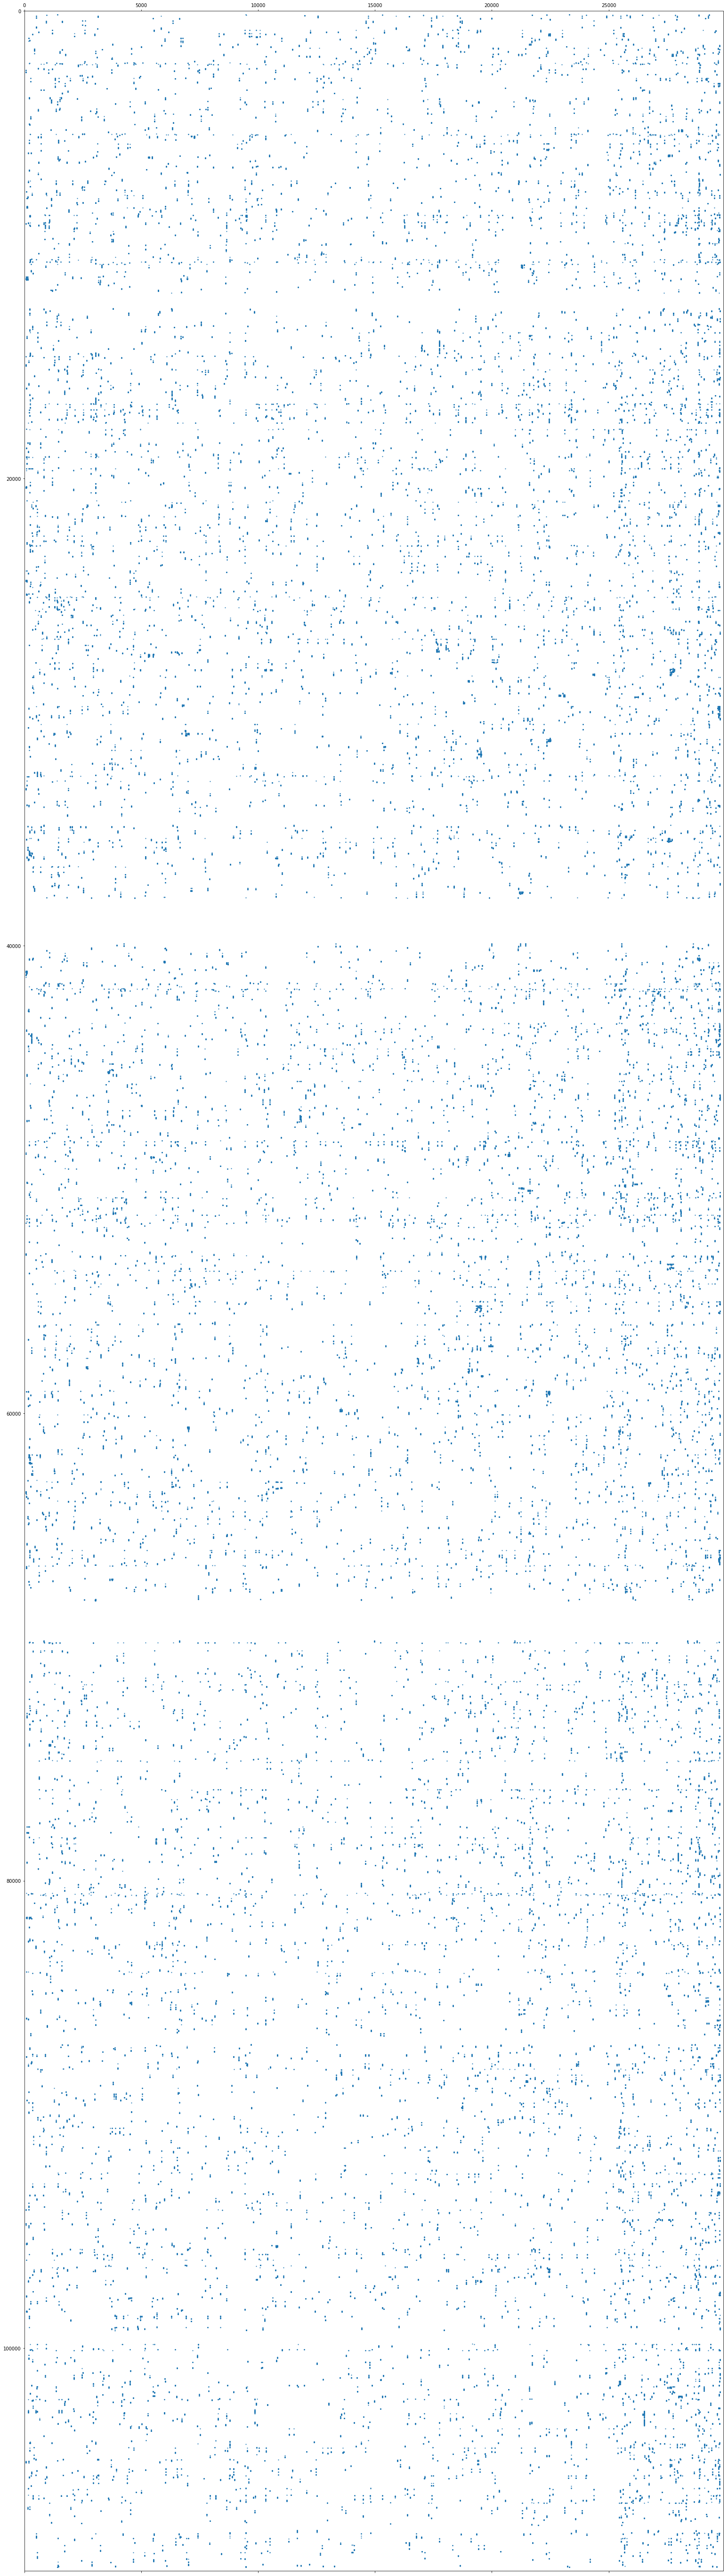

In [11]:
plt.figure( figsize=(30,100))
plt.spy(submat_coev ,  markersize = 1)

In [12]:
qseq = b''.join(aln_row[nongap_cols])
qfile = 'covid_geno.fasta'
with open(qfile , 'w') as geno_out:
    geno_out.write((b'>testgeno\n'+qseq).decode())
    #print( (b'>testgeno\n'+qseq).decode())


In [13]:
import subprocess
import shlex
import pandas as pd 
#collapse codons
#use tblastn to map to prot

def runblastx( qseq , outannot = 'outannot.txt' , outfmt = None ):
    if outfmt is None:
        outfmt = [ 'qseqid' , 'sseqid' , 'qlen' ,  'slen' , 'qstart' , 'qend' ,  'qframe' , 'evalue' ]
        outfmt =  ' "10 ' + ''.join([fmt+ ' ' for fmt in outfmt]) + ' " '
        print(outfmt)
    args = 'blastx -query '+ qfile + ' -db covid_prots -outfmt' + outfmt + ' -out ' + outannot  
    p = subprocess.run( shlex.split(args) )
    return p , outannot
out = 'outannot.txt'
p,annot = runblastx(qfile  )

annotation = pd.read_csv( out , header = None )
annotation.columns = [ 'qseqid' , 'sseqid' , 'qlen' ,  'slen' , 'qstart' , 'qend' ,  'qframe' , 'evalue' ] 
annotation = annotation[ annotation['evalue'] < 10**-3 ]
print(annotation)
print(len(annotation), ' orfs detected')

#recluster codons
#load blast results into df

 "10 qseqid sseqid qlen slen qstart qend qframe evalue  " 
      qseqid          sseqid   qlen  slen  qstart   qend  qframe  \
0   testgeno  YP_009724389.1  29903  7096     266  13468       2   
1   testgeno  YP_009724389.1  29903  7096   13462  21549       1   
3   testgeno  YP_009725299.1  29903  1945    2720   8554       2   
7   testgeno  YP_009742610.1  29903  1945    2720   8554       2   
11  testgeno  YP_009724390.1  29903  1273   21563  25381       2   
12  testgeno  YP_009725307.1  29903   932   13462  16236       1   
13  testgeno  YP_009725298.1  29903   638     806   2719       2   
14  testgeno  YP_009742609.1  29903   638     806   2719       2   
15  testgeno  YP_009725308.1  29903   601   16237  18039       1   
16  testgeno  YP_009725309.1  29903   527   18040  19620       1   
17  testgeno  YP_009725300.1  29903   500    8555  10054       2   
18  testgeno  YP_009742611.1  29903   500    8555  10054       2   
19  testgeno  YP_009725310.1  29903   346   19621  20658 

In [14]:
#select longest nice hit
from Bio import Seq
rows = []
for ID in annotation.sseqid.unique():
    #print(annotation[annotation.sseqid == ID ].iloc[0])
    sub = annotation[annotation.sseqid == ID ]
    rows.append(sub.index[0] ) 
annotation = annotation.loc[rows]
print(len(annotation))
rows = []

for ID in annotation.qstart.unique():tm
    #print(annotation[annotation.sseqid == ID ].iloc[0])
    sub = annotation[annotation.qstart == ID ]
    rows.append(sub.index[0] )
annotation = annotation.loc[rows]
print(len(annotation))

genes =  {}
prots = {}

for i,r in annotation.iterrows():
    genes[i] = qseq[r.qstart-1:r.qend-1].decode()
    #print(genes[i])
    prots[i] = str(Seq.Seq( genes[i]).translate( ) )
annotation = annotation.sort_values( ['qstart'] )
annotation['prots'] = annotation.index.map(prots)
annotation['genes'] = annotation.index.map(genes)
annotation = annotation[annotation.slen < 2000]
aln_regions = np.array(list(zip(list(annotation.qstart),list(annotation.qend))))
aln_regions= aln_regions[1:,:]
aln_len = np.array(list( annotation.qend - annotation.qstart))

annotation = pd.DataFrame.sort_values(annotation, by='qstart')
print(annotation)

IndentationError: unexpected indent (<ipython-input-14-7c95083fa0a0>, line 14)

In [ ]:
annotation.to_csv('./gisaid/'+seq.replace('/', '_').replace('|','_')+'.csv')

In [ ]:
print('summing up events on codons')
codonmat = np.zeros( (submat_coev.shape[0] , int(submat_coev.shape[1]/3) +1  ))
count = 0
print(codonmat.shape)
print(submat_coev.shape)
'''try:
    submat_coev = submat_coev.todense()
except AttributeError:
    print( 'already dense')
'''
codon_dict = {}
for i,r in annotation.iterrows():
    for j,codon in enumerate(range(r.qstart-1, r.qend-1 , 3 )):
        
        
        codon_dict[codon] = count
        cols = np.sum( submat_coev[:, codon:codon+2] , axis = 1 )
        codonmat[:,count] = cols.ravel()
        count+=1
        if count%500 == 0:
            print(count/codonmat.shape[1])
codonthresh = codonmat[codonmat>0] = 1

In [ ]:
codon_dict_rev = dict(zip ( codon_dict.values() , codon_dict.keys( ) ) )

(109535, 9968)
(1, 9968)
565.0
0.0
10.439606741573034
48.26623376623377
31.227469636162493


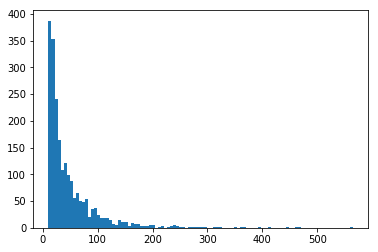

In [30]:
sumv = np.sum(codonmat , axis = 0)
print(codonmat.shape)
print(sumv.ravel().shape)
print(np.amax(sumv))
print(np.amin(sumv))
print(np.mean(sumv))
print(np.mean(sumv[sumv>0]))
print(np.std(sumv))


counts,bins = np.histogram(sumv[sumv>0].ravel() , bins = 100)
centroids = (bins[1:] + bins[:-1]) / 2
counts_, bins_, _ = plt.hist(centroids, bins=len(counts),
                             weights=counts, range=(min(bins), max(bins)))

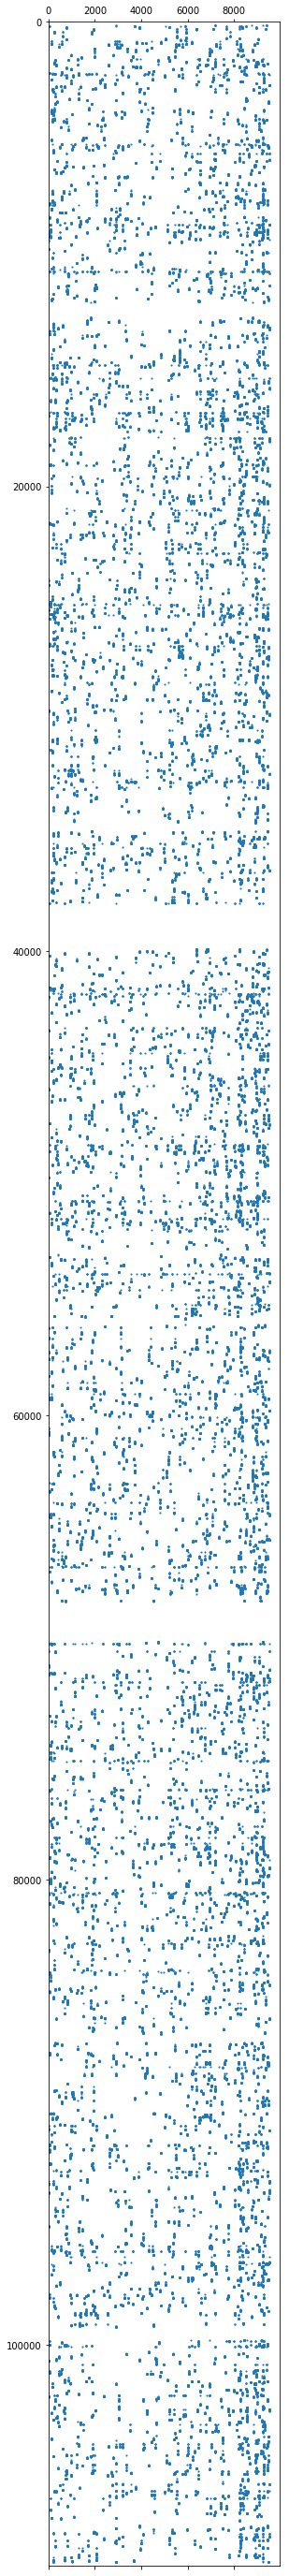

In [23]:
plt.figure( figsize=(30,50) )
plt.spy(codonmat , markersize = 1)

In [25]:
import pickle
with open( alnfile+'blurmat_codonsr3.pkl' , 'wb') as blurout:
    blurout.write(pickle.dumps(lil_matrix(codonmat) ))

In [19]:
import pickle
with open( alnfile+'blurmat_codonsr3.pkl' , 'rb') as blurout:
    codonmat = pickle.loads(blurout.read())

In [18]:
sparsedf = pd.DataFrame.sparse.from_spmatrix(codonmat)
nzx,nzy = codonmat.nonzero()
print(nzx.shape)
print(nzy.shape)

NameError: name 'pd' is not defined

In [ ]:
datablock = np.vstack([nzx,nzy]).T
print(datablock.shape)

In [ ]:
#save each cl
import colour
import numpy as np
red = colour.Color('red')
blue = colour.Color('blue')
crange = [ c.get_hex_l() for c in red.range_to(blue, np.amax(cluster_labelsb)) ]
print(crange)

with open( 'crange.pkl' , 'wb') as crangeout:
    crangeout.write(pickle.dumps(crange))

In [35]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1000 , algorithm='randomized', n_iter=100, random_state=0 , tol=0.0)
codon_reduce = svd.fit_transform( codonmat.T )

In [36]:
from sklearn.cluster import MiniBatchKMeans , DBSCAN
import sklearn

print(sklearn.neighbors.VALID_METRICS_SPARSE['brute'])
#apb = MiniBatchKMeans(n_clusters=100, init='k-means++', max_iter=100, batch_size=200, verbose=1, compute_labels=True , random_state= 0   )
apb = DBSCAN( eps = .5 , metric='cosine', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=-1)
cluster_labels_codon = apb.fit_predict(codonmat.T )
cluster_labels_raw = apb.fit_predict(submat_coev.T )
cluster_labels_reduced = apb.fit_predict(codon_reduce )


{'cityblock', 'l1', 'precomputed', 'l2', 'euclidean', 'cosine', 'manhattan'}


In [32]:
from sklearn.decomposition import TruncatedSVD , MiniBatchSparsePCA

svd = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=100, random_state=0 , tol=0.10)
#svd = MiniBatchSparsePCA(n_components=None, alpha=1, ridge_alpha=0.01, n_iter=100, callback=None, batch_size=3, verbose=False, shuffle=True, n_jobs=-1)

codon_reduce2 = svd.fit_transform( codonmat.T )

#cluster_labels = apb.fit_predict( codon_reduce2 )

In [37]:
    
for cluster_labels in [ cluster_labels_codon , cluster_labels_reduced ]:
    l,c = np.unique(cluster_labels, return_counts= True)
    print(len(l))
    print(c)
    print(np.sum(c))
    
    
    

9
[9922    5    5    6    7    5    5    5    8]
9968
77
[9402    5    6    7    8    6    8    5    7    9    5    5    6    5
    9   11    6   10    5   58    7    9    6    5    5   10    5    7
    7    5    7   10   14    9    9   11   10    7    5    9    5   16
    5    7    9    9   10    5    5    5    7    8    5    6    6    7
    7    5    5    5    7    5    5   10    5    5    5    5    5    5
    4    5    5    5    5    5    5]
9968


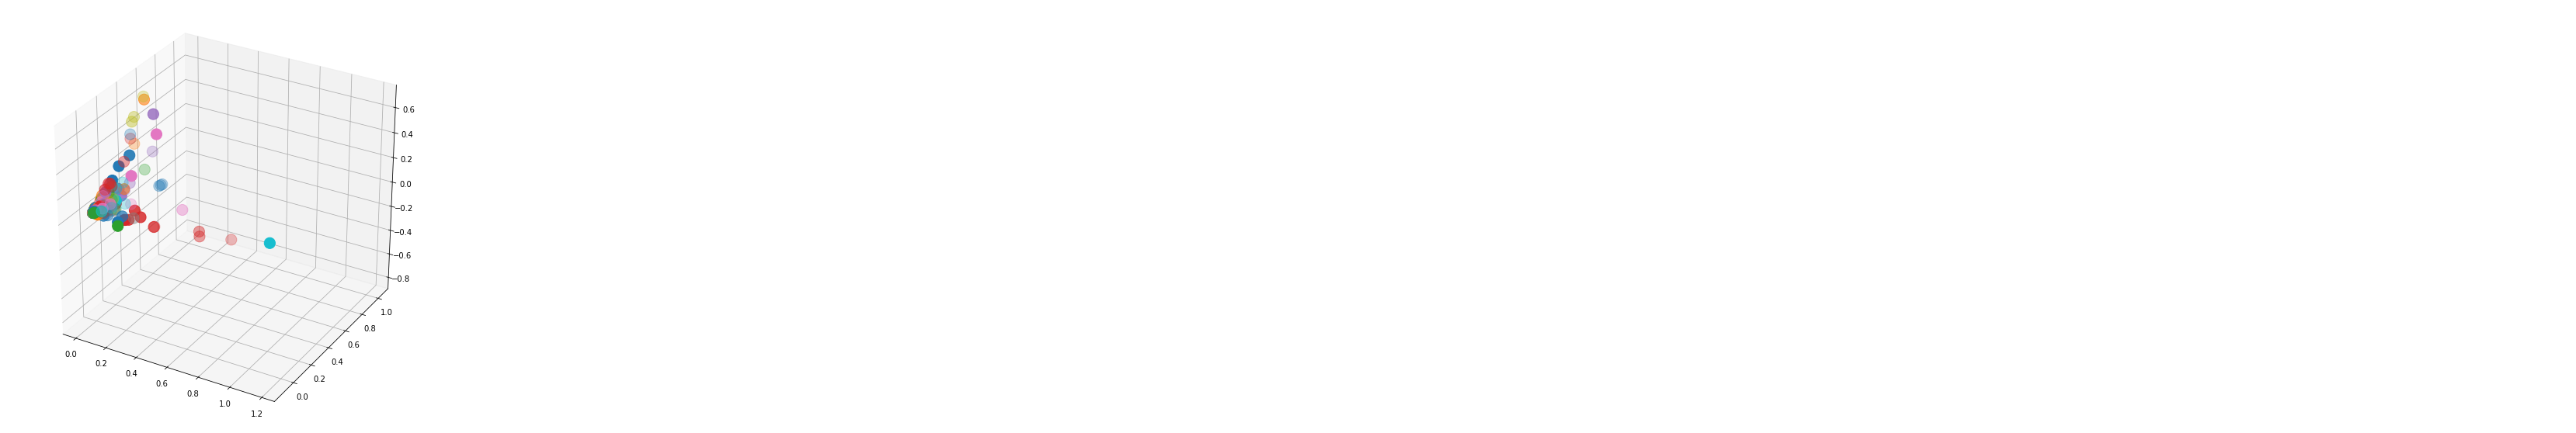

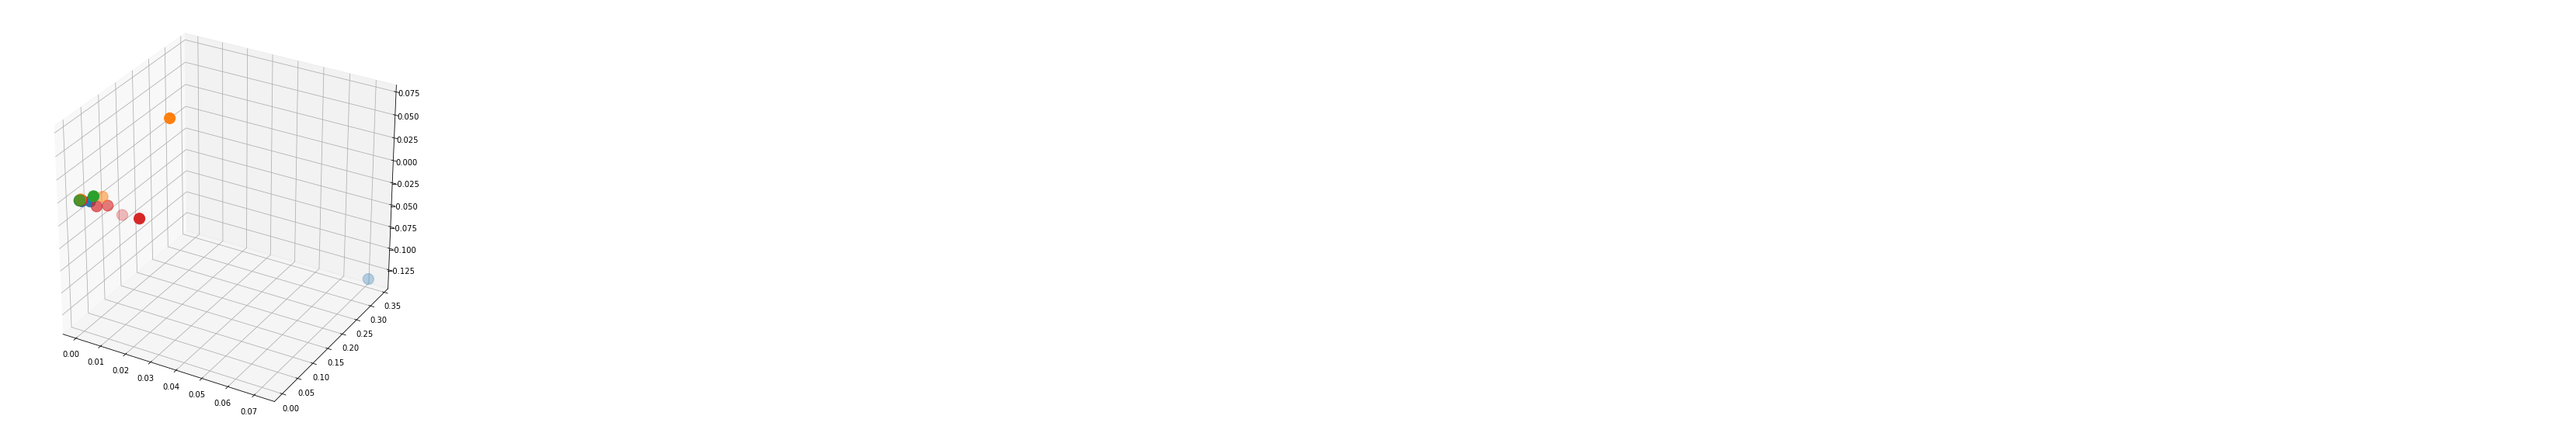

In [28]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

for cluster_labels in [ cluster_labels_codon , cluster_labels_reduced ]:
    l,c = np.unique(cluster_labels, return_counts= True)
    fig = plt.figure(figsize= (10,10))
    ax = fig.add_subplot(111, projection='3d')

    for i,label in enumerate(l):
        if c[i]>1 and c[i]< 1000:
            select = np.where(cluster_labels == label)
            #clusteravg = np.sum( codonmat[:,select] ) / len(select)
            ax.scatter( codon_reduce2[select,0] , codon_reduce2[select,1] , codon_reduce2[select,2] , label = label , s = 200
                      )
    #plt.legend()
    plt.show()

21
[  73 1331    2 8528    1    1    1   14    1    1    2    1    1    2
    1    1    2    2    1    1    1]
9968
cluster: 0
cluster size: 73
cluster: 15
cluster size: 14


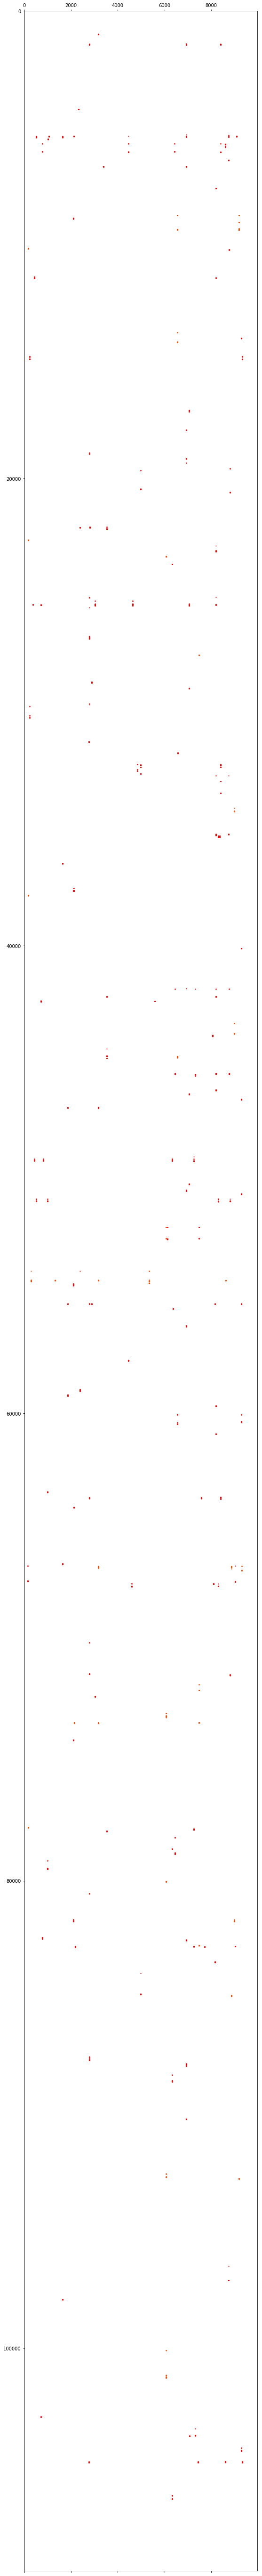

36
[  27 1105   16   11    8   56    2  190  185   22   93 7367    2    2
  102    1    1   84  124  106    4   74   52    1    3   11    1  162
    1   27    4    4    1  102   12    5]
9968
cluster: 0
cluster size: 27


KeyboardInterrupt: 

<Figure size 2160x7200 with 0 Axes>

In [43]:
#blurmat = blurmat.todense()
import copy
for cluster_labels in [ cluster_labels_codon , cluster_labels_reduced ]:
    l,c = np.unique(cluster_labels, return_counts= True)
    
    print(len(l))
    print(c)
    print(np.sum(c))
    plt.figure( figsize=(30,100))

    for i,label in enumerate(np.unique(cluster_labels)):
        if len(cluster_labels[ cluster_labels==label ] ) < 200 and len(cluster_labels[ cluster_labels==label ] ) > 6:
            print('cluster:',label)
            print( 'cluster size:' ,len(cluster_labels[ cluster_labels==label ] ) )
            mask =  copy.deepcopy(codonmat)
            mask[:,  cluster_labels!=label ] = 0
            plt.spy( mask, markersize = 1 , mfc = crange[i]  , mec = crange[i] )
    plt.show()
    
    

####################################
-1
0
(1, 5)
max events: 42.0
min events: 28.0
mean events 33.6
stdev events 5.4258639865002145


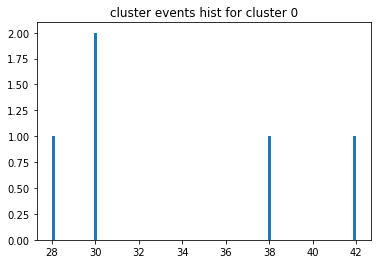

1
(1, 5)
max events: 106.0
min events: 54.0
mean events 85.6
stdev events 19.03260360539251


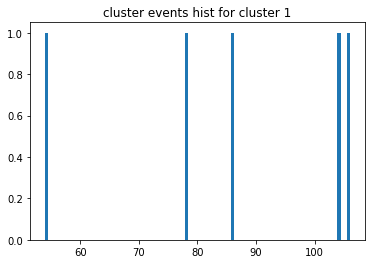

2
(1, 6)
max events: 46.0
min events: 18.0
mean events 22.666666666666668
stdev events 10.43498389499902


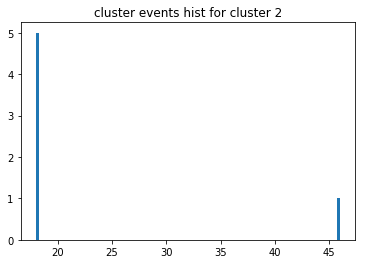

3
(1, 7)
max events: 32.0
min events: 14.0
mean events 22.857142857142858
stdev events 6.663945022680344


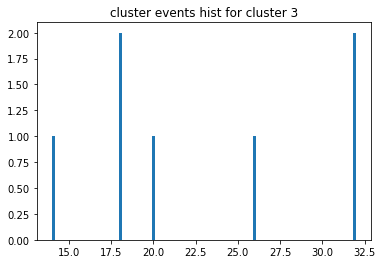

4
(1, 5)
max events: 42.0
min events: 14.0
mean events 29.6
stdev events 9.830564581955606


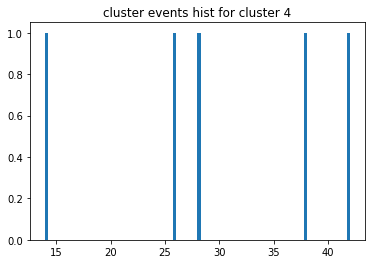

5
(1, 5)
max events: 58.0
min events: 16.0
mean events 37.2
stdev events 16.32666530556684


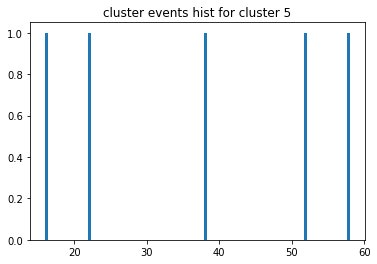

6
(1, 5)
max events: 52.0
min events: 16.0
mean events 34.0
stdev events 12.457929201917949


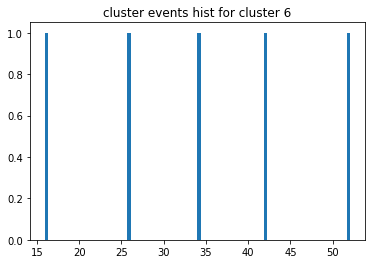

7
(1, 8)
max events: 110.0
min events: 16.0
mean events 47.5
stdev events 31.96482441684922


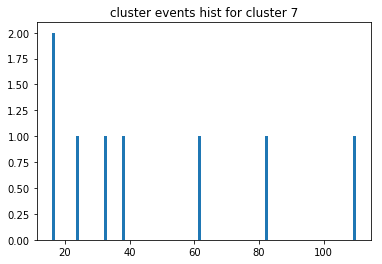

####################################
-1
0
(1, 11)
max events: 160.0
min events: 12.0
mean events 54.0
stdev events 51.90200556643435


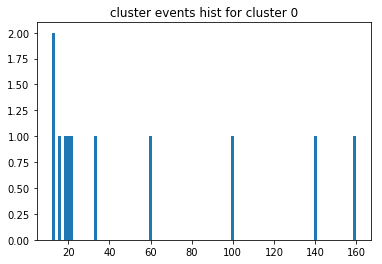

1
(1, 9)
max events: 144.0
min events: 10.0
mean events 42.0
stdev events 38.51695153507811


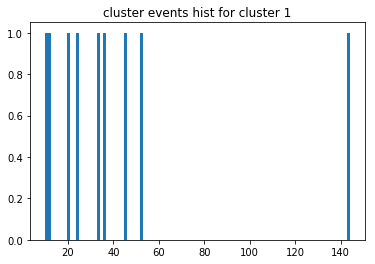

2
(1, 33)
max events: 152.0
min events: 10.0
mean events 41.93939393939394
stdev events 33.47539973639566


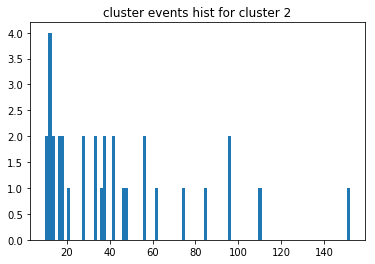

3
(1, 24)
max events: 282.0
min events: 12.0
mean events 47.166666666666664
stdev events 55.853727618565344


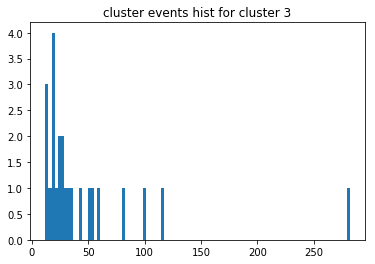

4
(1, 59)
max events: 240.0
min events: 10.0
mean events 48.54237288135593
stdev events 51.306761715774506


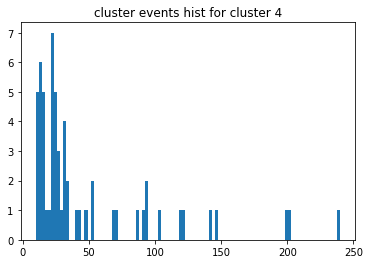

5
(1, 12)
max events: 74.0
min events: 12.0
mean events 34.833333333333336
stdev events 19.016805433323675


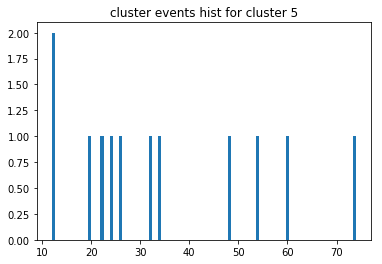

6
(1, 6)
max events: 110.0
min events: 12.0
mean events 40.333333333333336
stdev events 34.32038590821625


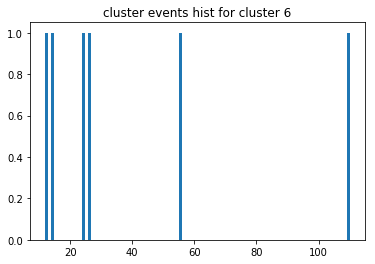

7
(1, 7)
max events: 412.0
min events: 14.0
mean events 81.71428571428571
stdev events 135.78314042799937


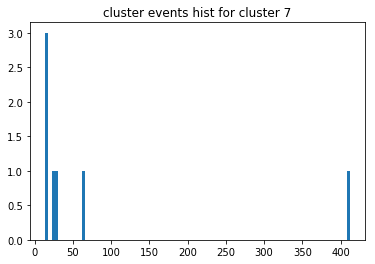

8
(1, 13)
max events: 164.0
min events: 12.0
mean events 40.46153846153846
stdev events 42.092600088952935


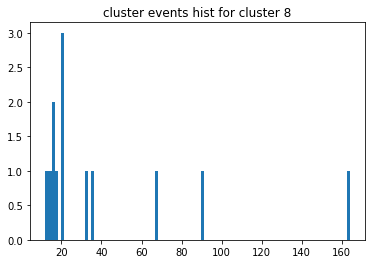

9
(1, 6)
max events: 112.0
min events: 14.0
mean events 37.333333333333336
stdev events 34.189017079888224


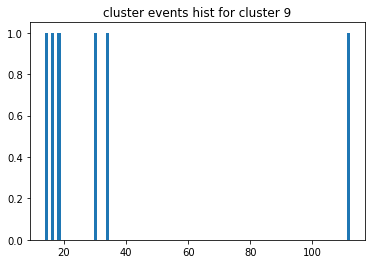

10
(1, 14)
max events: 120.0
min events: 10.0
mean events 28.857142857142858
stdev events 27.09469411120177


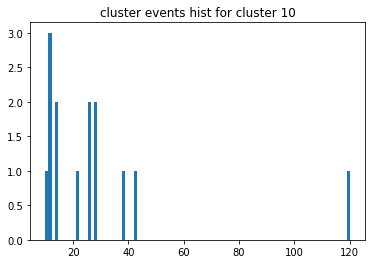

11
(1, 48)
max events: 150.0
min events: 10.0
mean events 36.875
stdev events 32.94163082888682


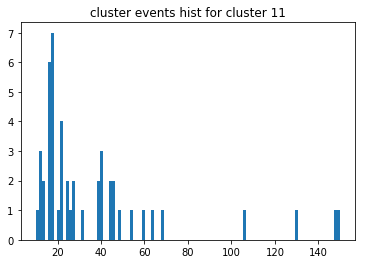

12
(1, 11)
max events: 154.0
min events: 12.0
mean events 47.09090909090909
stdev events 40.75080488988596


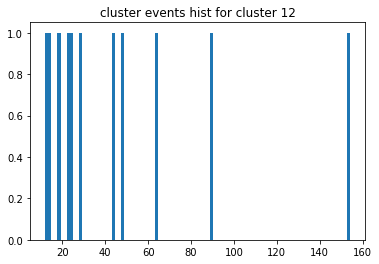

13
(1, 6)
max events: 92.0
min events: 12.0
mean events 28.333333333333332
stdev events 28.52873794770615


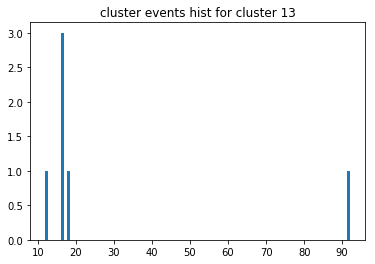

14
(1, 7)
max events: 120.0
min events: 12.0
mean events 36.857142857142854
stdev events 35.22754024675488


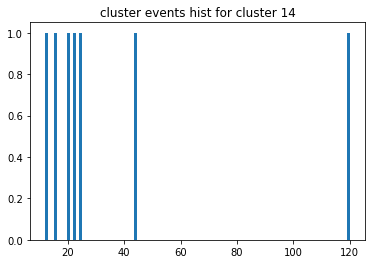

15
(1, 25)
max events: 182.0
min events: 10.0
mean events 42.4
stdev events 44.703467427035235


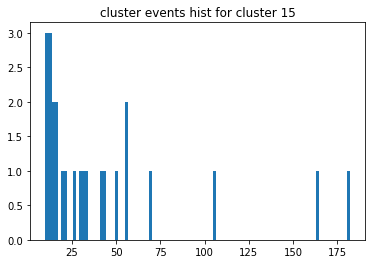

16
(1, 7)
max events: 74.0
min events: 14.0
mean events 39.714285714285715
stdev events 21.52549508781413


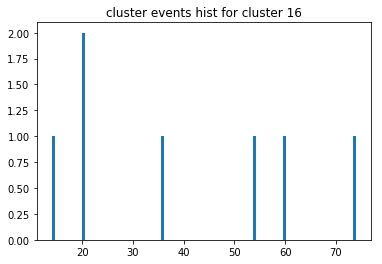

17
(1, 7)
max events: 102.0
min events: 10.0
mean events 37.142857142857146
stdev events 34.803237006382744


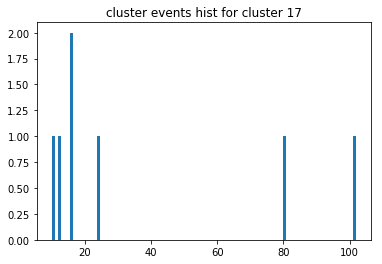

18
(1, 9)
max events: 132.0
min events: 14.0
mean events 46.22222222222222
stdev events 40.96008294744688


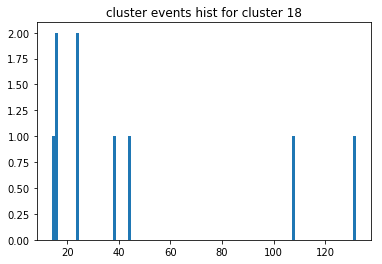

19
(1, 10)
max events: 98.0
min events: 12.0
mean events 40.8
stdev events 29.775157430314287


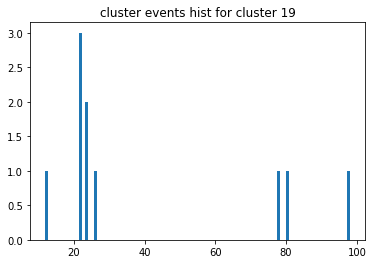

20
(1, 21)
max events: 92.0
min events: 10.0
mean events 33.23809523809524
stdev events 20.353786969282393


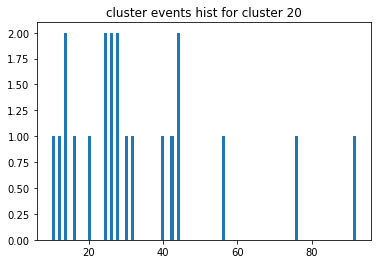

21
(1, 12)
max events: 110.0
min events: 12.0
mean events 44.0
stdev events 31.906112267087632


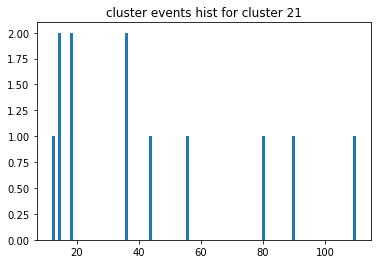

22
(1, 23)
max events: 106.0
min events: 10.0
mean events 40.608695652173914
stdev events 30.8738515089117


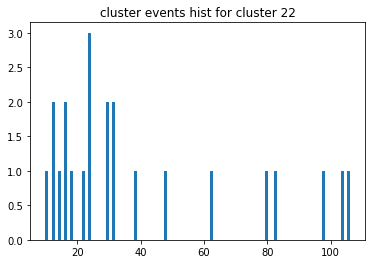

23
(1, 11)
max events: 156.0
min events: 14.0
mean events 55.81818181818182
stdev events 52.038129694953106


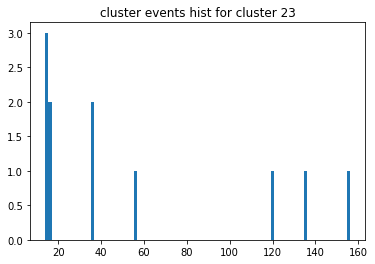

24
(1, 10)
max events: 272.0
min events: 12.0
mean events 52.0
stdev events 75.08928019364681


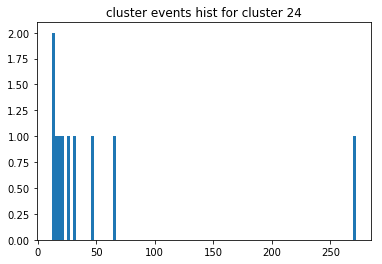

25
(1, 5)
max events: 54.0
min events: 12.0
mean events 28.8
stdev events 13.89100428334827


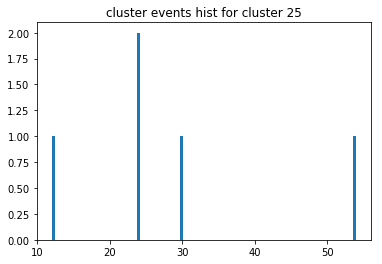

26
(1, 33)
max events: 240.0
min events: 12.0
mean events 49.21212121212121
stdev events 51.229582821905936


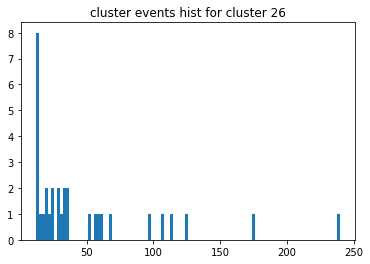

27
(1, 26)
max events: 190.0
min events: 10.0
mean events 46.46153846153846
stdev events 39.56808228982894


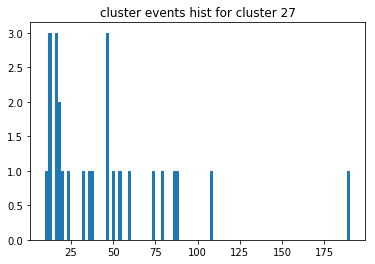

28
(1, 6)
max events: 90.0
min events: 16.0
mean events 35.333333333333336
stdev events 25.525586292102197


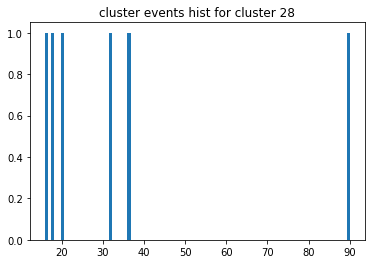

29
(1, 56)
max events: 463.0
min events: 10.0
mean events 47.910714285714285
stdev events 71.54426122181646


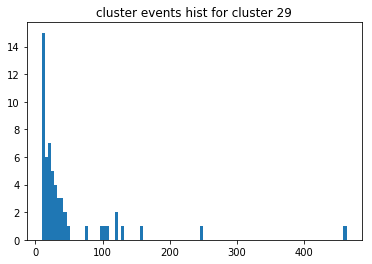

30
(1, 6)
max events: 84.0
min events: 12.0
mean events 34.0
stdev events 24.166091947189145


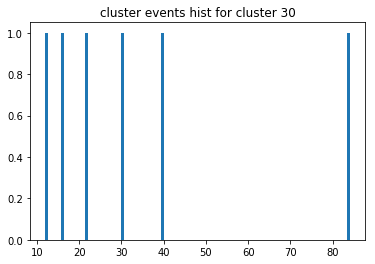

31
(1, 6)
max events: 42.0
min events: 14.0
mean events 30.333333333333332
stdev events 8.825468196582483


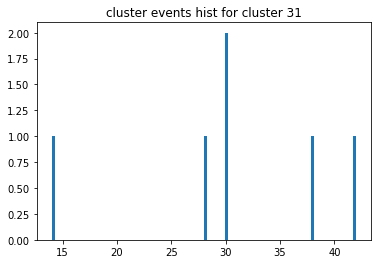

32
(1, 8)
max events: 96.0
min events: 12.0
mean events 38.0
stdev events 30.066592756745816


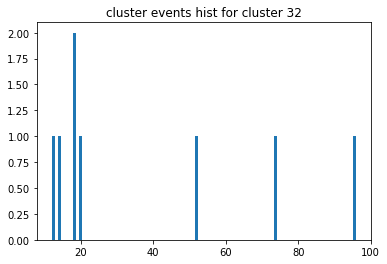

33
(1, 9)
max events: 68.0
min events: 12.0
mean events 33.333333333333336
stdev events 21.123972690339812


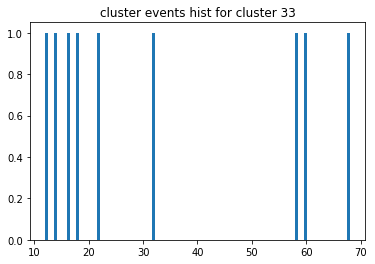

34
(1, 23)
max events: 366.0
min events: 12.0
mean events 47.34782608695652
stdev events 77.89491734027334


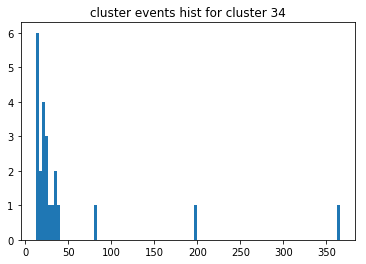

35
(1, 6)
max events: 194.0
min events: 12.0
mean events 56.666666666666664
stdev events 63.32631540064701


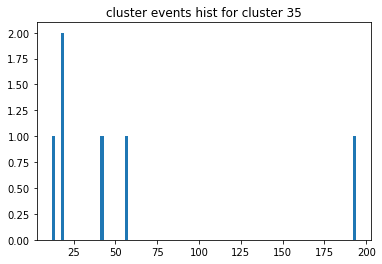

36
(1, 7)
max events: 106.0
min events: 14.0
mean events 38.285714285714285
stdev events 29.53793824758877


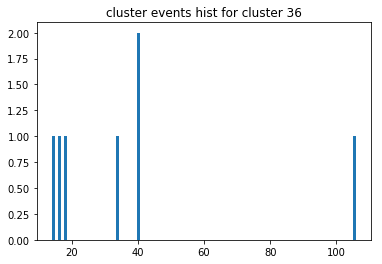

37
(1, 24)
max events: 140.0
min events: 12.0
mean events 35.0
stdev events 30.692018506445613


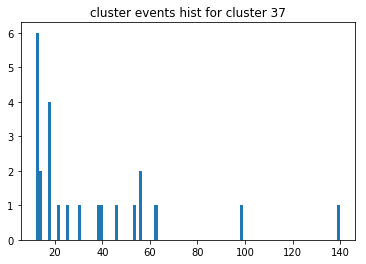

38
(1, 7)
max events: 174.0
min events: 10.0
mean events 52.0
stdev events 53.32380867331751


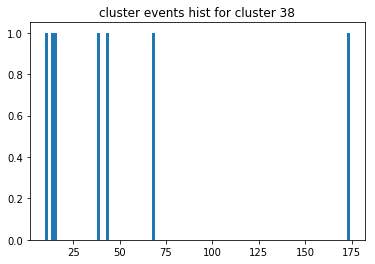

39
(1, 6)
max events: 94.0
min events: 12.0
mean events 43.333333333333336
stdev events 31.25522178594945


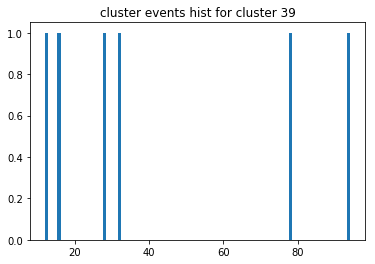

40
(1, 5)
max events: 258.0
min events: 12.0
mean events 94.0
stdev events 100.14389646903099


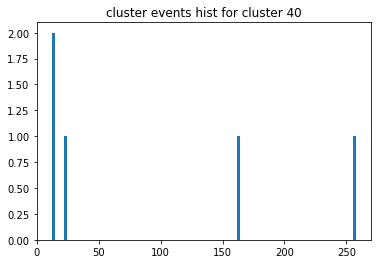

41
(1, 7)
max events: 144.0
min events: 12.0
mean events 44.57142857142857
stdev events 44.65377009473522


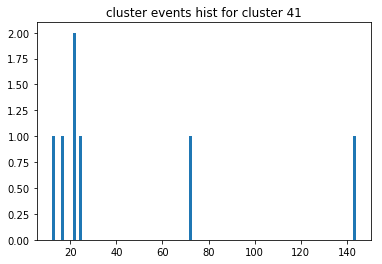

42
(1, 14)
max events: 20.0
min events: 0.0
mean events 13.5
stdev events 7.045044574821688


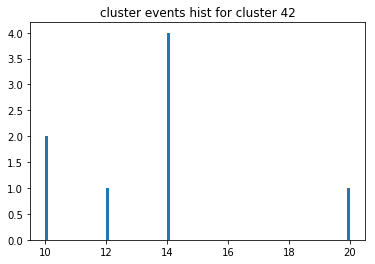

43
(1, 10)
max events: 80.0
min events: 10.0
mean events 28.8
stdev events 22.22071105972984


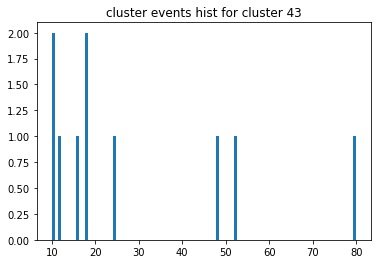

44
(1, 22)
max events: 565.0
min events: 12.0
mean events 76.63636363636364
stdev events 139.63346351155016


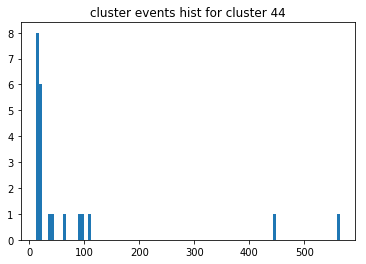

45
(1, 17)
max events: 116.0
min events: 12.0
mean events 40.23529411764706
stdev events 26.460913264584196


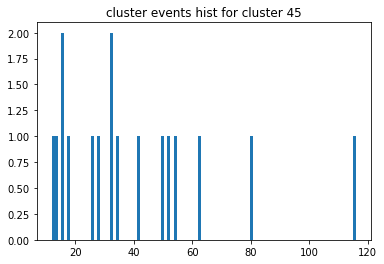

46
(1, 5)
max events: 58.0
min events: 10.0
mean events 22.8
stdev events 18.093092604637828


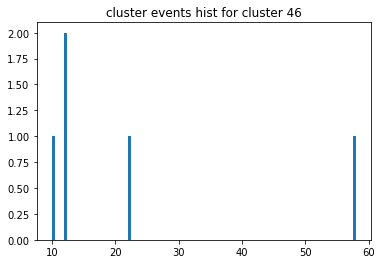

47
(1, 8)
max events: 70.0
min events: 12.0
mean events 31.5
stdev events 20.291623887703025


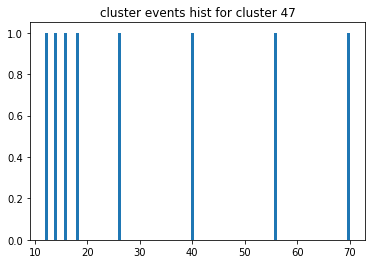

48
(1, 5)
max events: 64.0
min events: 10.0
mean events 29.6
stdev events 22.85257097133712


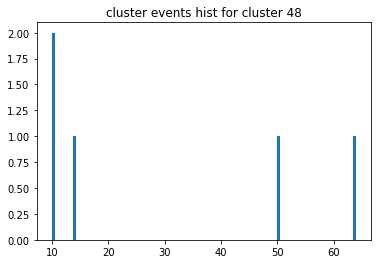

49
(1, 9)
max events: 70.0
min events: 12.0
mean events 31.11111111111111
stdev events 17.155785836105583


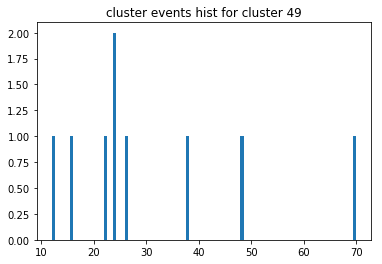

50
(1, 16)
max events: 246.0
min events: 10.0
mean events 46.75
stdev events 54.487957385095655


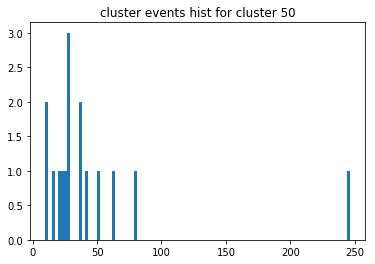

51
(1, 19)
max events: 316.0
min events: 10.0
mean events 45.68421052631579
stdev events 67.84273814575569


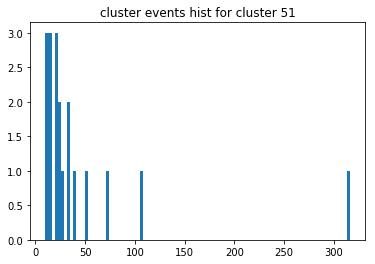

52
(1, 11)
max events: 238.0
min events: 10.0
mean events 56.90909090909091
stdev events 72.26901076779293


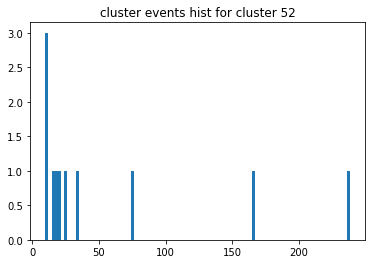

53
(1, 5)
max events: 40.0
min events: 14.0
mean events 27.6
stdev events 9.414881836751855


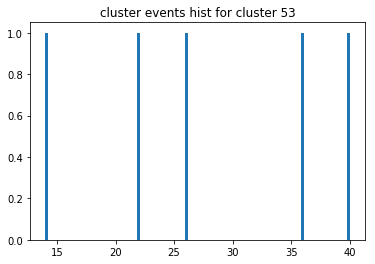

54
(1, 4)
max events: 46.0
min events: 16.0
mean events 36.5
stdev events 11.947803145348521


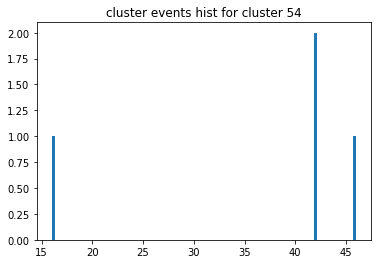

55
(1, 13)
max events: 68.0
min events: 12.0
mean events 28.307692307692307
stdev events 14.35476128668231


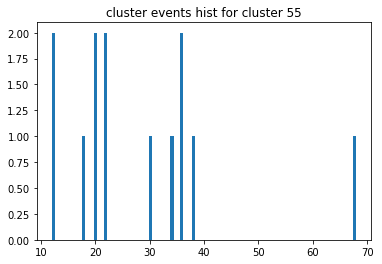

56
(1, 5)
max events: 116.0
min events: 16.0
mean events 47.2
stdev events 38.66988492354225


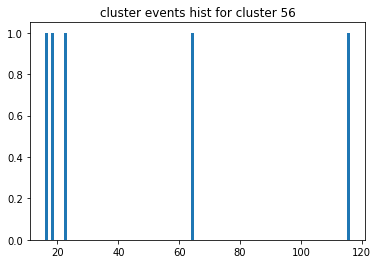

57
(1, 6)
max events: 82.0
min events: 10.0
mean events 34.666666666666664
stdev events 25.991451586157236


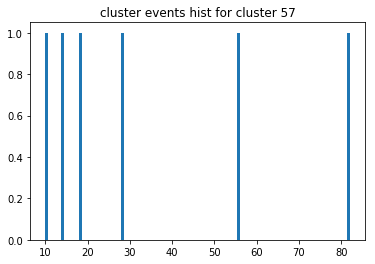

58
(1, 6)
max events: 140.0
min events: 16.0
mean events 43.333333333333336
stdev events 43.8583578757294


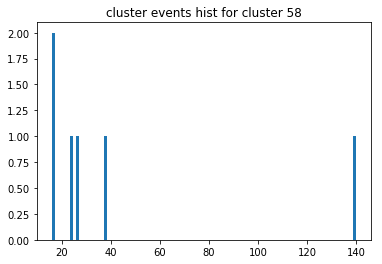

59
(1, 7)
max events: 100.0
min events: 12.0
mean events 40.0
stdev events 27.73342490827372


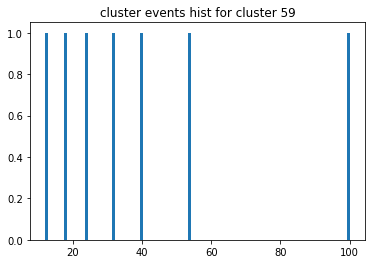

60
(1, 15)
max events: 52.0
min events: 14.0
mean events 33.46666666666667
stdev events 12.95050406569395


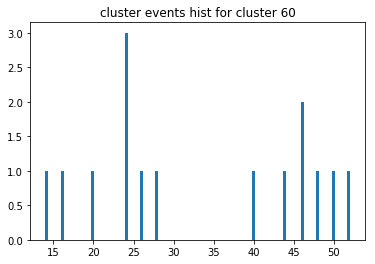

61
(1, 13)
max events: 80.0
min events: 14.0
mean events 34.0
stdev events 16.566880770426835


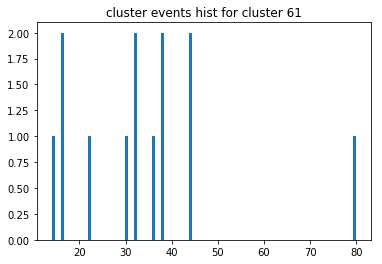

62
(1, 6)
max events: 204.0
min events: 12.0
mean events 56.0
stdev events 67.21111019268565


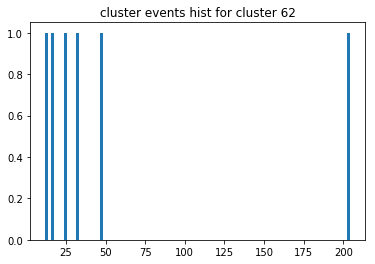

63
(1, 6)
max events: 112.0
min events: 12.0
mean events 34.666666666666664
stdev events 35.47142825179475


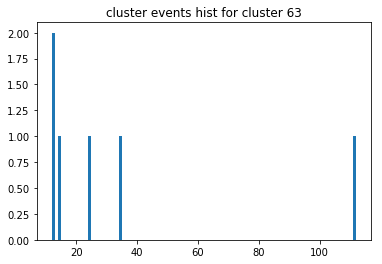

64
(1, 5)
max events: 124.0
min events: 12.0
mean events 53.2
stdev events 45.6


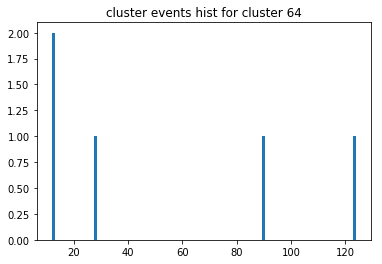

65
(1, 12)
max events: 86.0
min events: 16.0
mean events 42.0
stdev events 22.166040091395065


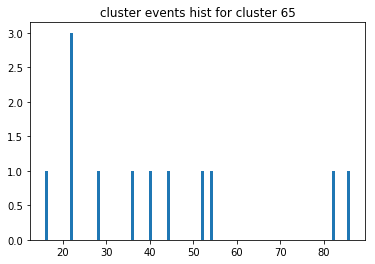

66
(1, 5)
max events: 34.0
min events: 14.0
mean events 25.2
stdev events 8.44748483277715


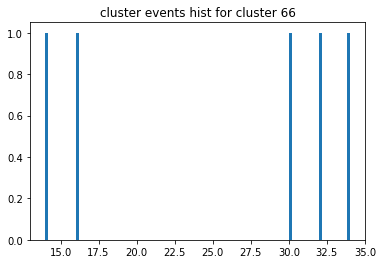

67
(1, 7)
max events: 110.0
min events: 16.0
mean events 54.0
stdev events 35.90463559406859


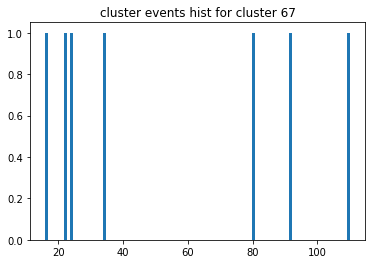

68
(1, 12)
max events: 106.0
min events: 14.0
mean events 56.333333333333336
stdev events 30.48314652758508


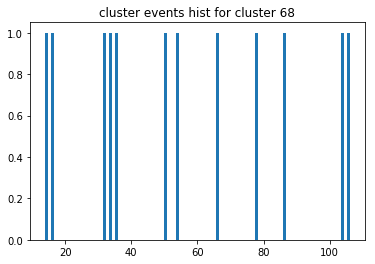

69
(1, 8)
max events: 74.0
min events: 14.0
mean events 37.5
stdev events 18.26882590644511


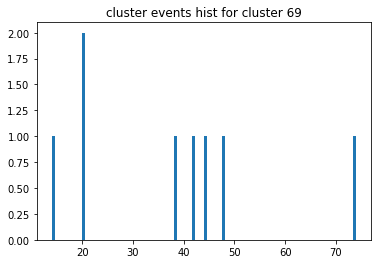

70
(1, 6)
max events: 68.0
min events: 12.0
mean events 34.0
stdev events 19.86621923433512


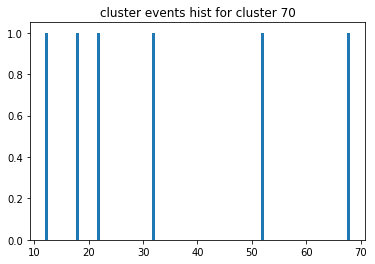

71
(1, 6)
max events: 82.0
min events: 12.0
mean events 39.333333333333336
stdev events 24.239545283597124


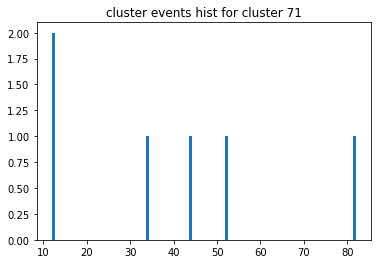

72
(1, 5)
max events: 122.0
min events: 18.0
mean events 46.4
stdev events 38.20785259603057


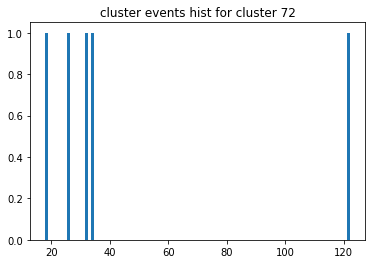

73
(1, 5)
max events: 100.0
min events: 14.0
mean events 42.0
stdev events 29.90652102802999


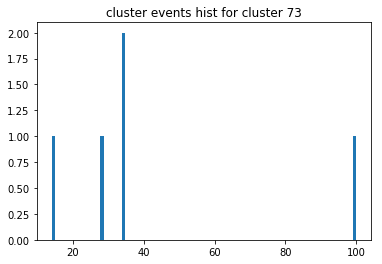

74
(1, 7)
max events: 56.0
min events: 16.0
mean events 36.285714285714285
stdev events 16.54184551557729


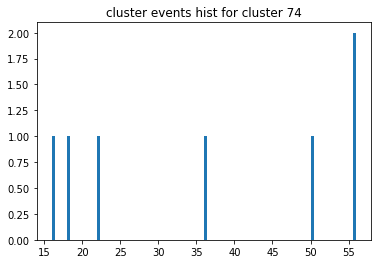

75
(1, 4)
max events: 68.0
min events: 22.0
mean events 36.0
stdev events 18.708286933869708


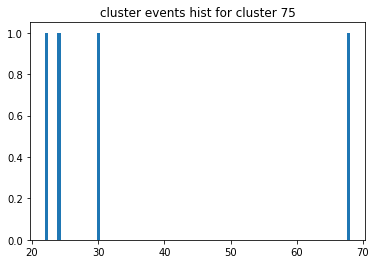

76
(1, 7)
max events: 60.0
min events: 12.0
mean events 34.285714285714285
stdev events 14.43917573542089


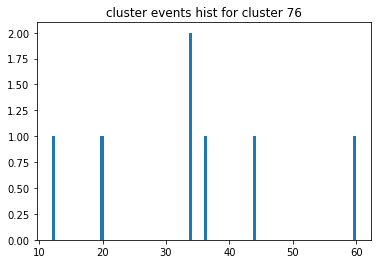

77
(1, 5)
max events: 48.0
min events: 10.0
mean events 26.8
stdev events 13.658696863171098


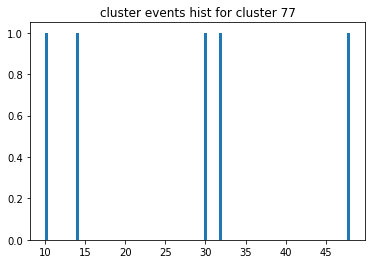

78
(1, 5)
max events: 118.0
min events: 14.0
mean events 54.0
stdev events 40.29888335921977


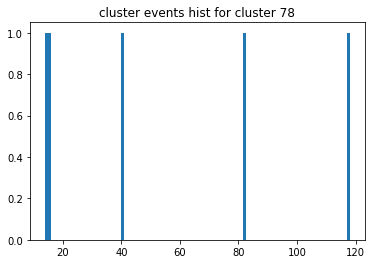

79
(1, 7)
max events: 54.0
min events: 12.0
mean events 31.142857142857142
stdev events 15.037368419360877


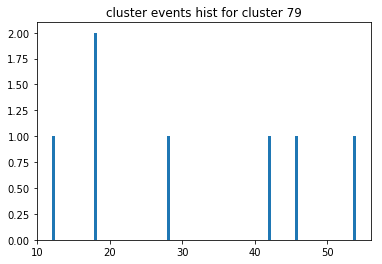

80
(1, 5)
max events: 142.0
min events: 18.0
mean events 50.4
stdev events 47.30158559710234


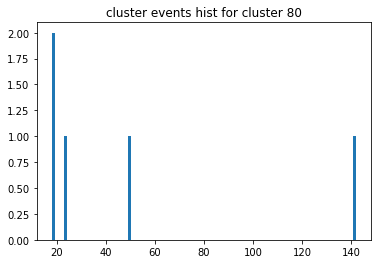

81
(1, 6)
max events: 72.0
min events: 10.0
mean events 37.666666666666664
stdev events 24.61481035654934


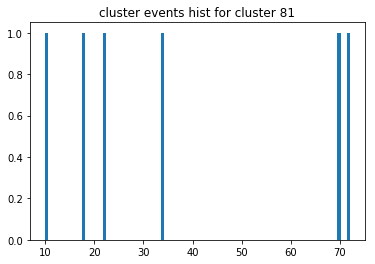

82
(1, 12)
max events: 106.0
min events: 10.0
mean events 36.5
stdev events 25.36565920031779


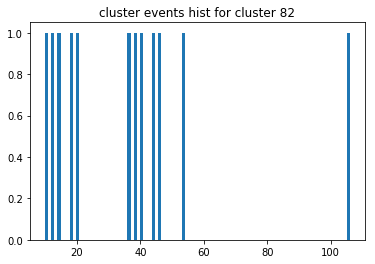

83
(1, 7)
max events: 138.0
min events: 18.0
mean events 59.42857142857143
stdev events 49.114609821917384


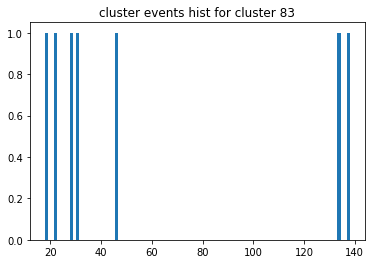

84
(1, 18)
max events: 88.0
min events: 10.0
mean events 32.0
stdev events 21.018510360579263


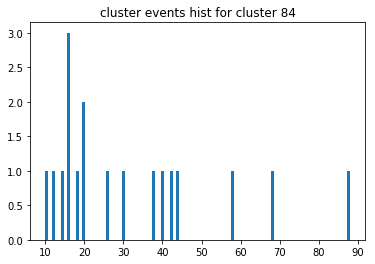

85
(1, 9)
max events: 201.0
min events: 10.0
mean events 54.77777777777778
stdev events 61.07514092907338


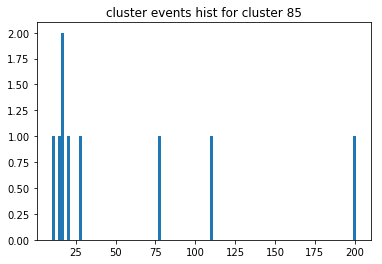

86
(1, 21)
max events: 130.0
min events: 10.0
mean events 42.476190476190474
stdev events 33.647499089996835


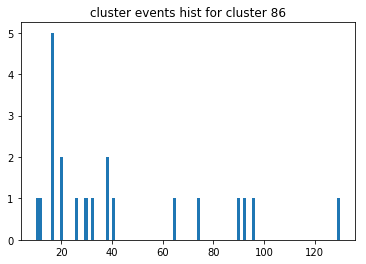

87
(1, 6)
max events: 168.0
min events: 10.0
mean events 51.666666666666664
stdev events 53.95574318107594


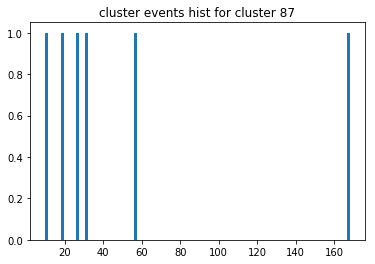

88
(1, 5)
max events: 174.0
min events: 10.0
mean events 49.6
stdev events 62.42307265747178


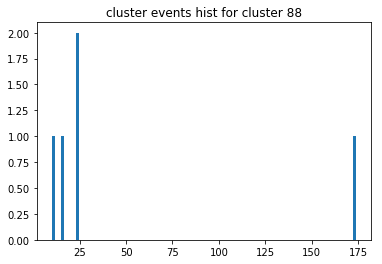

89
(1, 6)
max events: 60.0
min events: 14.0
mean events 45.0
stdev events 14.730919862656235


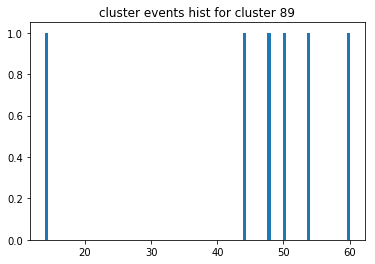

90
(1, 3)
max events: 66.0
min events: 14.0
mean events 45.333333333333336
stdev events 22.528993664954402


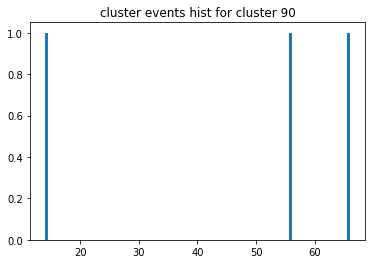

91
(1, 6)
max events: 78.0
min events: 16.0
mean events 39.666666666666664
stdev events 20.442330808615953


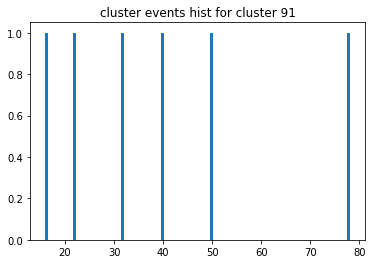

92
(1, 4)
max events: 154.0
min events: 14.0
mean events 51.0
stdev events 59.55669567731239


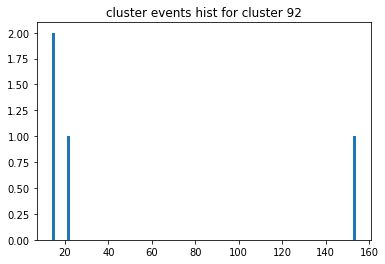

93
(1, 7)
max events: 96.0
min events: 12.0
mean events 41.142857142857146
stdev events 32.440840976542304


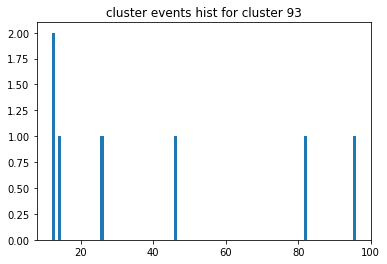

94
(1, 6)
max events: 150.0
min events: 12.0
mean events 59.333333333333336
stdev events 49.1754229490934


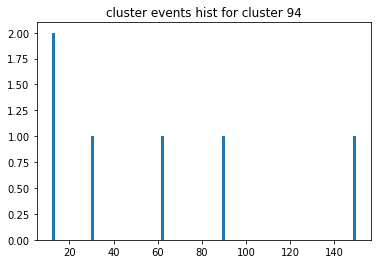

95
(1, 4)
max events: 96.0
min events: 10.0
mean events 35.0
stdev events 35.510561809129406


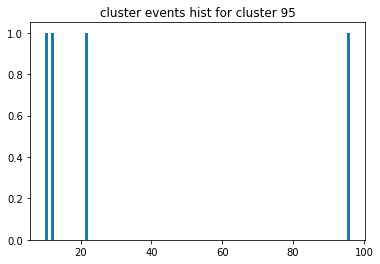

96
(1, 6)
max events: 74.0
min events: 32.0
mean events 50.666666666666664
stdev events 15.81841402360623


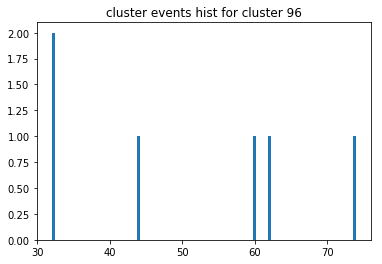

97
(1, 7)
max events: 58.0
min events: 12.0
mean events 38.285714285714285
stdev events 16.015298808276018


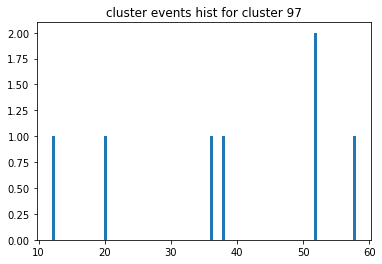

98
(1, 14)
max events: 360.0
min events: 10.0
mean events 57.857142857142854
stdev events 91.78379653360635


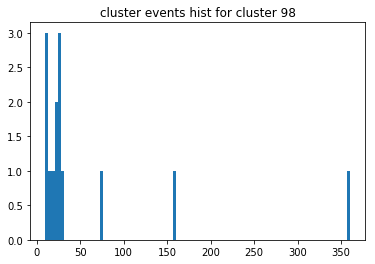

99
(1, 7)
max events: 52.0
min events: 16.0
mean events 37.42857142857143
stdev events 11.986386836230304


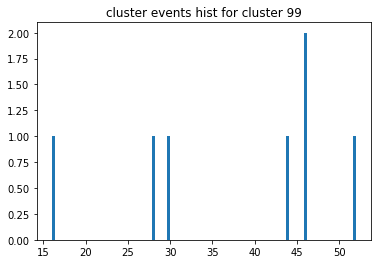

100
(1, 5)
max events: 62.0
min events: 20.0
mean events 39.2
stdev events 14.119490075778232


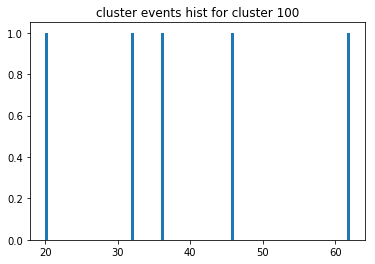

101
(1, 7)
max events: 162.0
min events: 16.0
mean events 50.857142857142854
stdev events 47.060534182593166


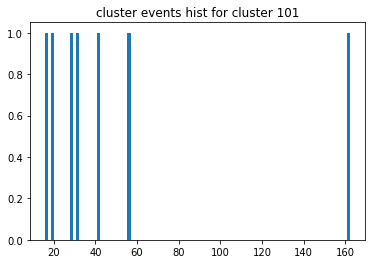

102
(1, 5)
max events: 64.0
min events: 14.0
mean events 34.0
stdev events 18.286607121059937


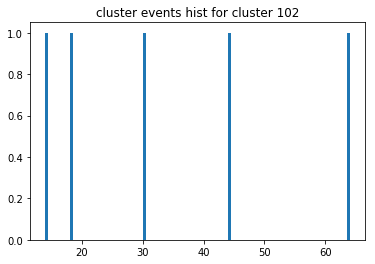

103
(1, 9)
max events: 80.0
min events: 14.0
mean events 32.0
stdev events 19.595917942265423


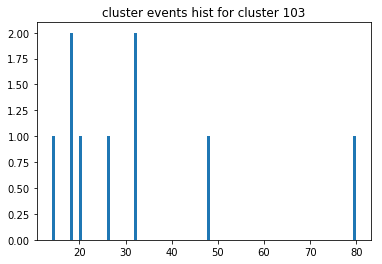

104
(1, 7)
max events: 92.0
min events: 14.0
mean events 27.714285714285715
stdev events 26.64965443739661


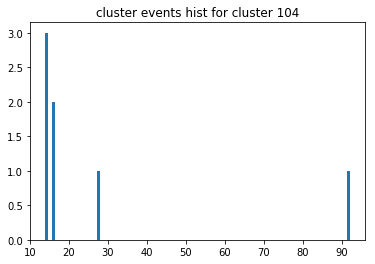

105
(1, 6)
max events: 76.0
min events: 16.0
mean events 31.0
stdev events 21.031722072463143


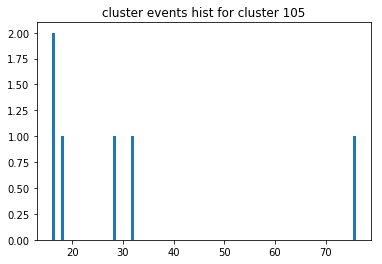

106
(1, 5)
max events: 82.0
min events: 10.0
mean events 36.2
stdev events 29.054431675735806


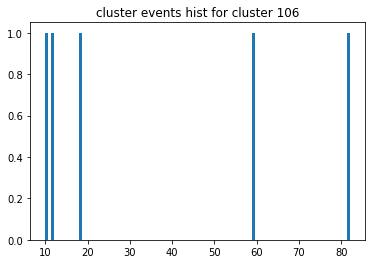

107
(1, 5)
max events: 180.0
min events: 12.0
mean events 51.2
stdev events 65.01199889251214


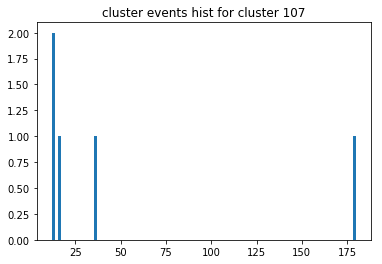

108
(1, 7)
max events: 146.0
min events: 12.0
mean events 49.42857142857143
stdev events 43.24963135386125


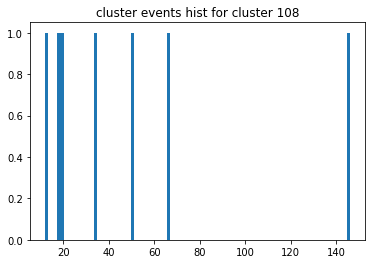

109
(1, 6)
max events: 86.0
min events: 24.0
mean events 43.666666666666664
stdev events 27.213150415847768


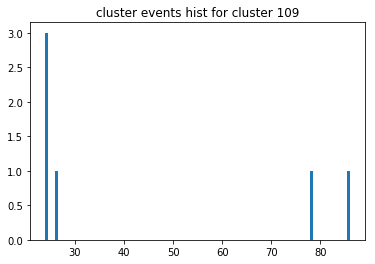

110
(1, 9)
max events: 84.0
min events: 14.0
mean events 37.77777777777778
stdev events 22.179959812496293


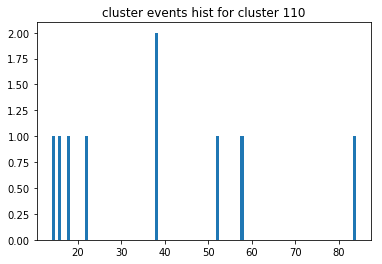

111
(1, 7)
max events: 126.0
min events: 14.0
mean events 55.42857142857143
stdev events 42.11161069232618


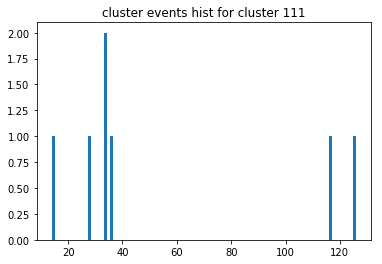

112
(1, 6)
max events: 98.0
min events: 20.0
mean events 43.666666666666664
stdev events 25.25646231935282


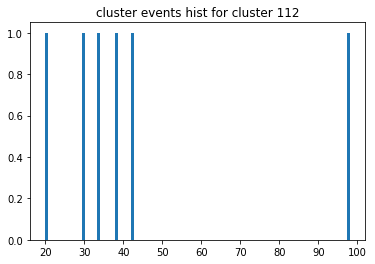

113
(1, 6)
max events: 46.0
min events: 18.0
mean events 22.666666666666668
stdev events 10.43498389499902


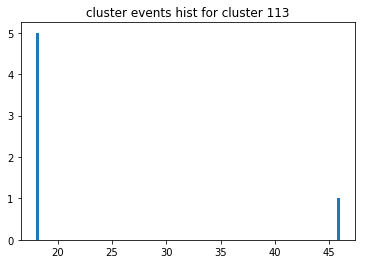

114
(1, 5)
max events: 50.0
min events: 12.0
mean events 28.8
stdev events 15.522886329545804


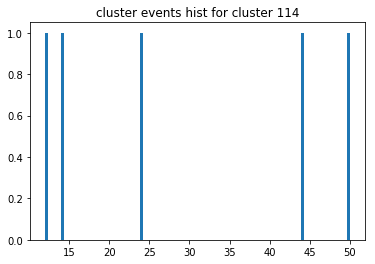

115
(1, 8)
max events: 52.0
min events: 18.0
mean events 33.75
stdev events 12.346558224865746


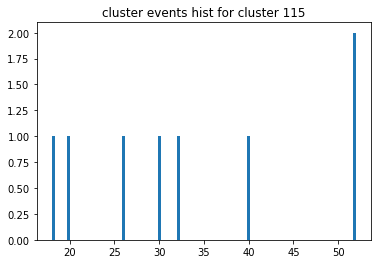

116
(1, 5)
max events: 40.0
min events: 18.0
mean events 31.2
stdev events 7.858753081755401


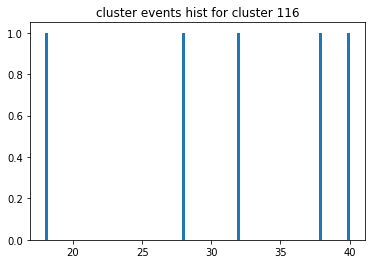

117
(1, 5)
max events: 138.0
min events: 14.0
mean events 62.4
stdev events 48.471022271043545


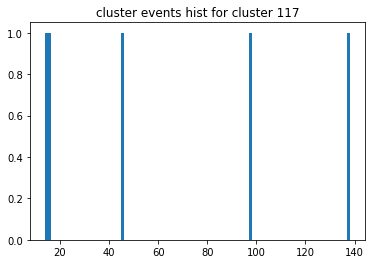

118
(1, 4)
max events: 46.0
min events: 14.0
mean events 25.5
stdev events 12.196310917650468


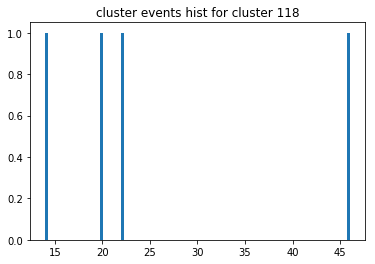

119
(1, 8)
max events: 50.0
min events: 12.0
mean events 31.0
stdev events 13.711309200802088


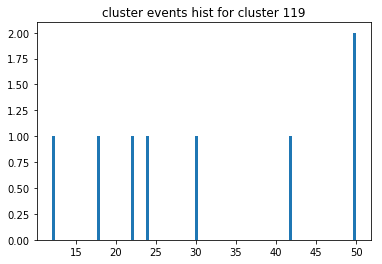

120
(1, 7)
max events: 241.0
min events: 10.0
mean events 81.28571428571429
stdev events 99.0565701083611


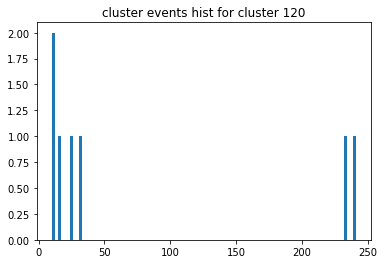

121
(1, 5)
max events: 18.0
min events: 0.0
mean events 13.5
stdev events 5.878775382679628


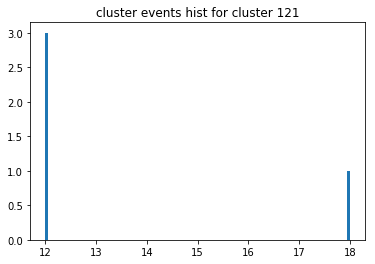

122
(1, 6)
max events: 84.0
min events: 14.0
mean events 37.333333333333336
stdev events 24.70267641819854


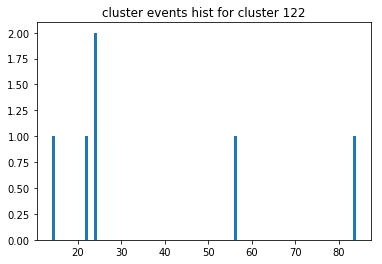

123
(1, 5)
max events: 82.0
min events: 42.0
mean events 54.4
stdev events 14.221111067704943


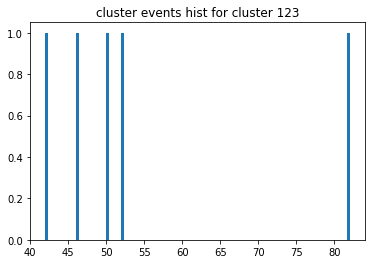

124
(1, 5)
max events: 66.0
min events: 12.0
mean events 38.8
stdev events 21.784398086704165


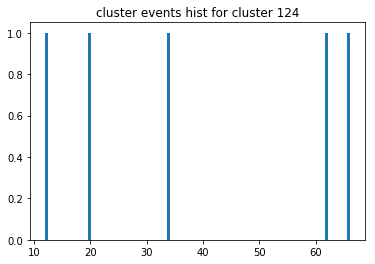

125
(1, 5)
max events: 72.0
min events: 14.0
mean events 30.0
stdev events 21.279097725232617


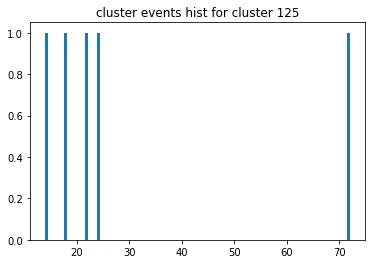

126
(1, 9)
max events: 172.0
min events: 12.0
mean events 45.333333333333336
stdev events 51.92301994298868


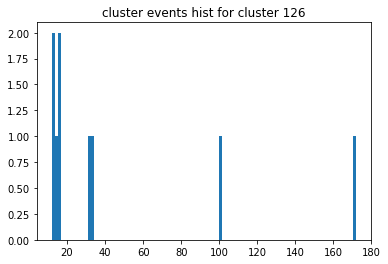

127
(1, 5)
max events: 76.0
min events: 16.0
mean events 32.8
stdev events 22.148589119851405


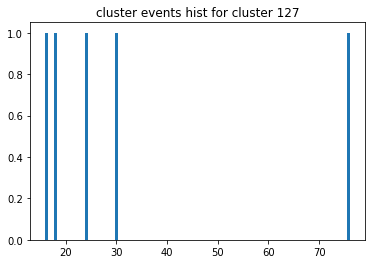

128
(1, 5)
max events: 78.0
min events: 14.0
mean events 36.4
stdev events 26.605262637305422


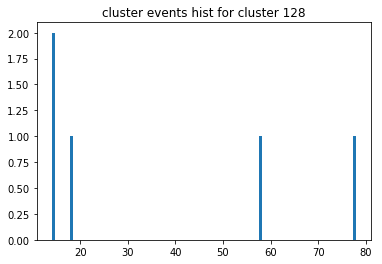

129
(1, 5)
max events: 86.0
min events: 12.0
mean events 34.8
stdev events 28.47033543883879


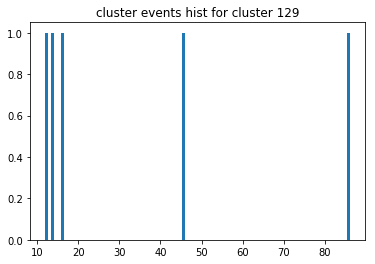

130
(1, 5)
max events: 62.0
min events: 12.0
mean events 28.8
stdev events 18.18130908378162


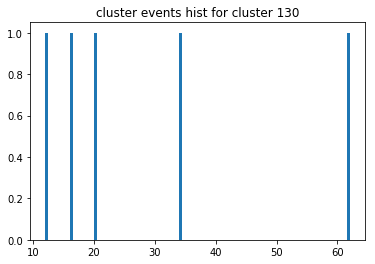

131
(1, 5)
max events: 98.0
min events: 22.0
mean events 46.4
stdev events 27.111621124528867


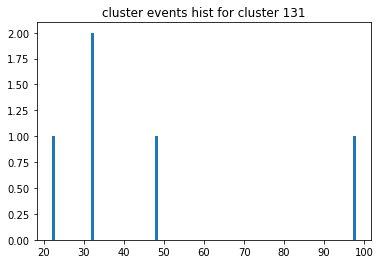

132
(1, 5)
max events: 96.0
min events: 12.0
mean events 33.6
stdev events 31.68343415730056


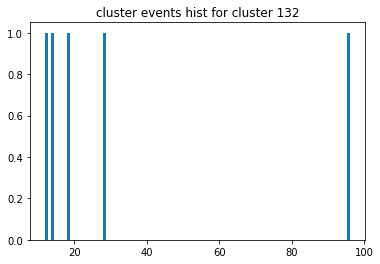

133
(1, 5)
max events: 196.0
min events: 18.0
mean events 66.4
stdev events 67.0450594749531


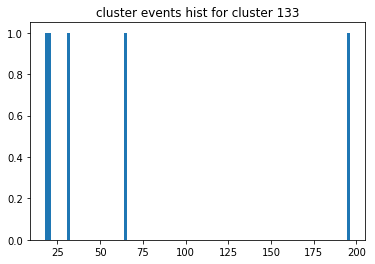

134
(1, 5)
max events: 96.0
min events: 14.0
mean events 36.8
stdev events 30.583655765784442


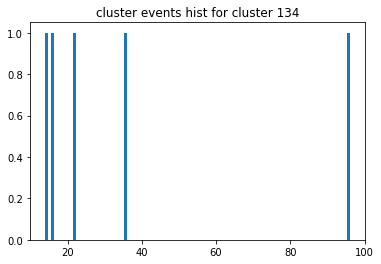

135
(1, 4)
max events: 30.0
min events: 10.0
mean events 21.5
stdev events 7.533259586659682


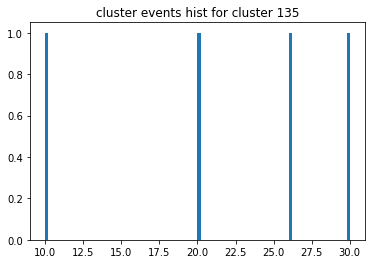

136
(1, 5)
max events: 66.0
min events: 18.0
mean events 34.4
stdev events 17.453939383417143


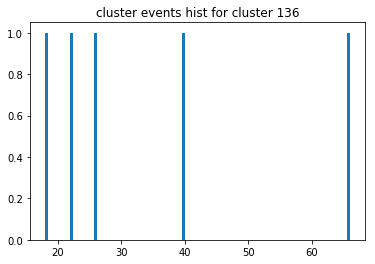

137
(1, 3)
max events: 62.0
min events: 24.0
mean events 39.333333333333336
stdev events 16.35712552851373


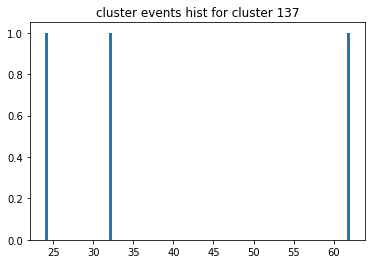

138
(1, 4)
max events: 64.0
min events: 18.0
mean events 44.0
stdev events 18.275666882497067


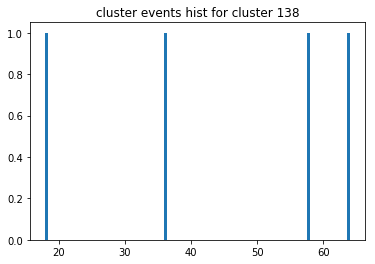

139
(1, 5)
max events: 132.0
min events: 12.0
mean events 64.0
stdev events 46.767510089804865


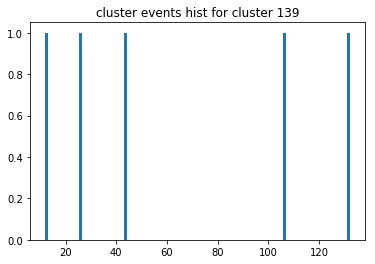

In [34]:
for cluster_labels in [ cluster_labels_codon , cluster_labels_reduced ]:
    l,c = np.unique(cluster_labels, return_counts= True)
    
    print('####################################')
    for i,label in enumerate(np.unique(cluster_labels)):
        print(label)
        if label != -1:
            sumv = np.sum(codonmat[:, np.where( cluster_labels==label)[0] ] , axis = 0)
            print(sumv.ravel().shape)
            print('max events:',np.amax(sumv))
            print('min events:',np.amin(sumv))
            print('mean events',np.mean(sumv[sumv>0]))
            print('stdev events',np.std(sumv))
            counts,bins = np.histogram(sumv[sumv>0].ravel() , bins = 100)
            centroids = (bins[1:] + bins[:-1]) / 2
            counts_, bins_, _ = plt.hist(centroids, bins=len(counts),
                                         weights=counts, range=(min(bins), max(bins)))

            plt.title('cluster events hist for cluster ' +str(label))
            plt.show()

ImportError: cannot import name 'define_pseudo_potts_helper_functions' from 'coniii.utils' (/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/coniii/utils.py)

In [ ]:
# sample from given Potts model
sampler = mc.Potts3(n, np.concatenate([h,J]), calc_e=calc_e)
sampler.generate_samples_parallel(1000, n_iters=500, burn_in=1000)
X = sampler.samples

# solve the inverse problem
solver = Pseudo(X,
                calc_observables_r=calc_observables_r,
                get_multipliers_r=get_multipliers_r,
                model=Potts3([h,J]),
                calc_observables=calc_observables,
                k=k)
solver.solve();

# Create model to hold results and generate MC sample
model = Potts3(solver.multipliers)
model.setup_sampler()
model.generate_samples(500, 1_000)

In [ ]:
l,c = np.unique(cluster_labels_raw, return_counts= True)
print(len(l))
print(c)
print(np.sum(c))
for i,label in enumerate(np.unique(cluster_labels_raw)):
    if len(cluster_labels[ cluster_labels==label ] ) < 200 and len(cluster_labels[ cluster_labels==label ] ) > 6:
        print('cluster:',label)
        print( 'cluster size:' ,len(cluster_labels[ cluster_labels==label ] ) )
        mask =  copy.deepcopy(submat_coev)
        mask[:,  cluster_labelsb_raw!=label ] = 0
        plt.spy( mask, markersize = 1 , mfc = crange[i]  , mec = crange[i] )
plt.show()


In [ ]:
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
#over the whole genome
titles = ' codon clusters, svd codon clusters,  nucleotide blurred clustered '.split(',')
for k,cluster_labels in enumerate([ cluster_labels_codon , cluster_labels_reduced , cluster_labels_raw ]):
    bonferroni = []
    plots = []
    plotlabels=[]
    plt.figure( figsize=(20,20))
    cdf_uniform = np.cumsum(np.ones(len(cluster_labels)) ) / np.sum(np.ones(len(cluster_labels)) )
    for i,label in enumerate(np.unique(cluster_labels_raw)):
        cluster_ones = np.zeros(len(cluster_labels))        
        cluster_ones[ cluster_labels==label ] = 1
        if np.sum(cluster_ones) > 4 and np.sum(cluster_ones) < 1000 :
            cdf_empirical= np.cumsum(cluster_ones) / np.sum(cluster_ones)
            res = stats.kstest(np.where(cluster_labels == label) , 'uniform')
            fig = plt.plot( cdf_empirical )
            plots.append(fig)
            plotlabels.append( str(label) +  ' npts: '+ str(int( np.sum(cluster_ones)) ) )  
            bonferroni.append(res[1])
    plt.plot(cdf_uniform, lw = 2 , ls = 'dashed' , c = 'black' )
    
    plotlabels = [ str(p) + ' corrected pval:' + str(bonferroni[ i ]) for i,p in enumerate( plotlabels ) ]+['uniform']
    plt.legend( plotlabels )
    plt.title( titles[k])
    plt.show()
    bf_correction = multipletests(bonferroni, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
    print(bf_correction)

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


242.0
86
Ks_2sampResult(statistic=0.10242776886035312, pvalue=6.391360860260951e-46)
269.0
86
Ks_2sampResult(statistic=0.33487158908507225, pvalue=0.0)
274.0
86
Ks_2sampResult(statistic=0.20545746388443017, pvalue=1.8257224486381982e-184)
271.0
86
Ks_2sampResult(statistic=0.31831861958266455, pvalue=1e-323)
266.0
86
Ks_2sampResult(statistic=0.17786918138041732, pvalue=4.1355600352250924e-138)
276.0
86
Ks_2sampResult(statistic=0.5510634028892456, pvalue=0.0)
276.0
86
Ks_2sampResult(statistic=0.37369582664526485, pvalue=0.0)
274.0
86
Ks_2sampResult(statistic=0.3637640449438202, pvalue=0.0)
274.0
86
Ks_2sampResult(statistic=0.3967696629213483, pvalue=0.0)
271.0
86
Ks_2sampResult(statistic=0.5489566613162119, pvalue=0.0)
277.0
86
Ks_2sampResult(statistic=0.46679373996789725, pvalue=0.0)
277.0
86
Ks_2sampResult(statistic=0.39997993579454255, pvalue=0.0)
272.0
86
Ks_2sampResult(statistic=0.37279293739967895, pvalue=0.0)
276.0
86
Ks_2sampResult(statistic=0.33747993579454255, pvalue=0.0)
273.0

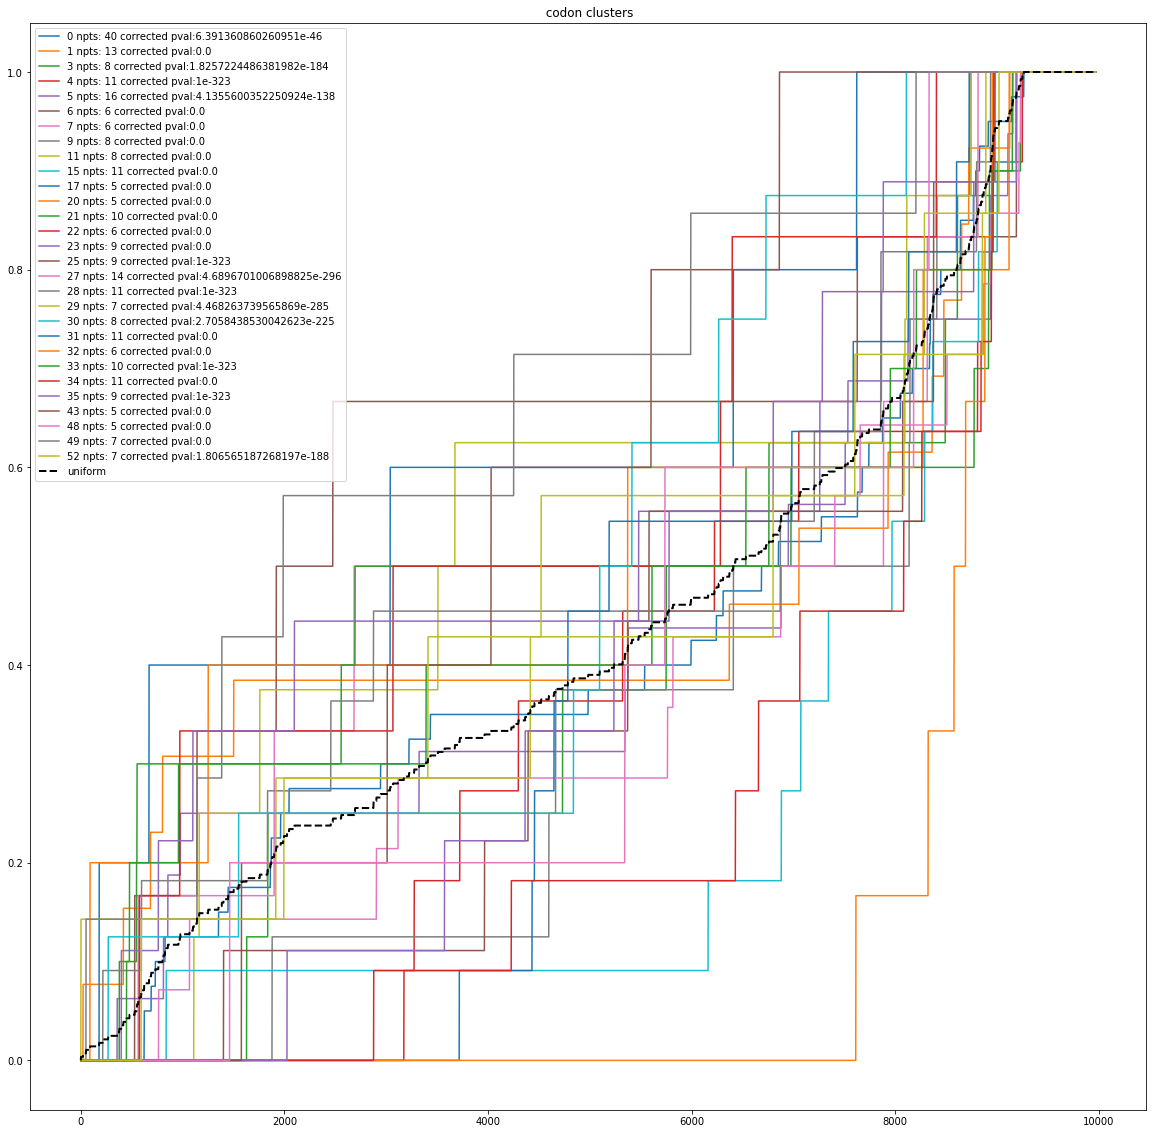

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True]), array([1.85349465e-044, 0.00000000e+000, 5.29459510e-183, 2.86558075e-322,
       1.19931241e-136, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 2.86558075e-322,
       1.36000433e-294, 2.86558075e-322, 1.29579648e-283, 7.84694717e-224,
       0.00000000e+000, 0.00000000e+000, 2.86558075e-322, 0.00000000e+000,
       2.86558075e-322, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       5.23903904e-187]), 0.0017671710005495722, 0.001724137931034483)
706.0
77
Ks_2sampResult(statistic=0.7453852327447833, pvalue=0.0)
821.0
77
Ks_2sampResult(statistic=0.7290329052969502, pvalue=0.0)
825.0
77
Ks_2sampResult(statistic=0.74

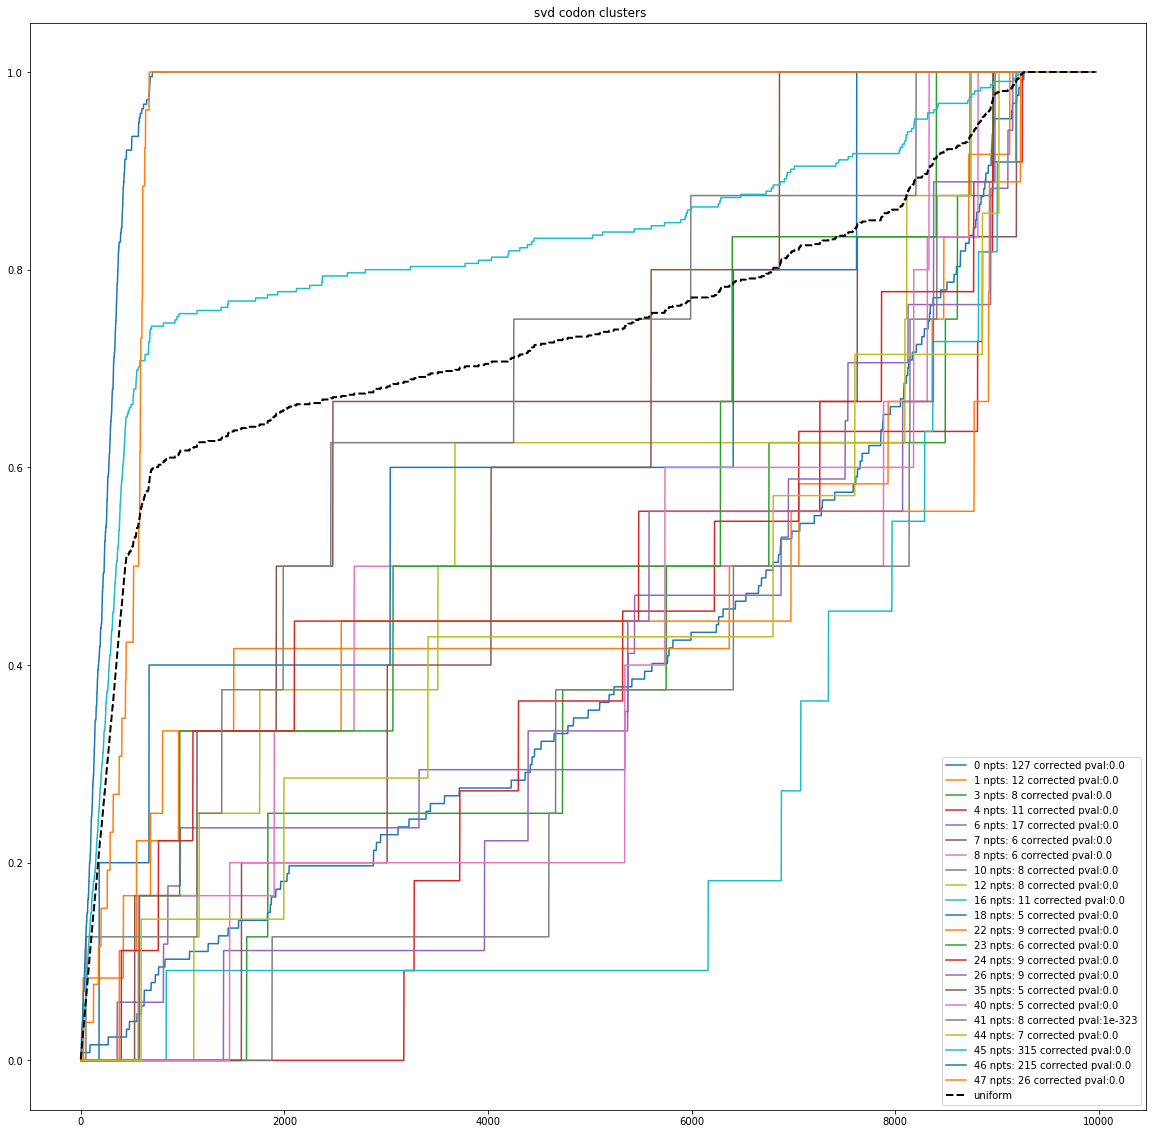

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True]), array([0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000,
       0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000,
       0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000, 2.17e-322,
       0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000]), 0.0023287975150316775, 0.002272727272727273)
408.0
99
Ks_2sampResult(statistic=0.15770992876968867, pvalue=2e-323)
416.0
99
Ks_2sampResult(statistic=0.17443065913119085, pvalue=0.0)
422.0
99
Ks_2sampResult(statistic=0.5611142694712905, pvalue=0.0)
423.0
99
Ks_2sampResult(statistic=0.3455506136508043, pvalue=0.0)
421.0
99
Ks_2sampResult(statistic=0.5874995819817409, pvalue=0.0)
420.0
99
Ks_2sampResult(statistic=0.24134702203792263, pvalue=0.0)
422.0
99
Ks_2sampResult(statistic=0.20569842490719992, pvalue=0.0)
422.0
99
Ks_2sampResult(statistic=0.

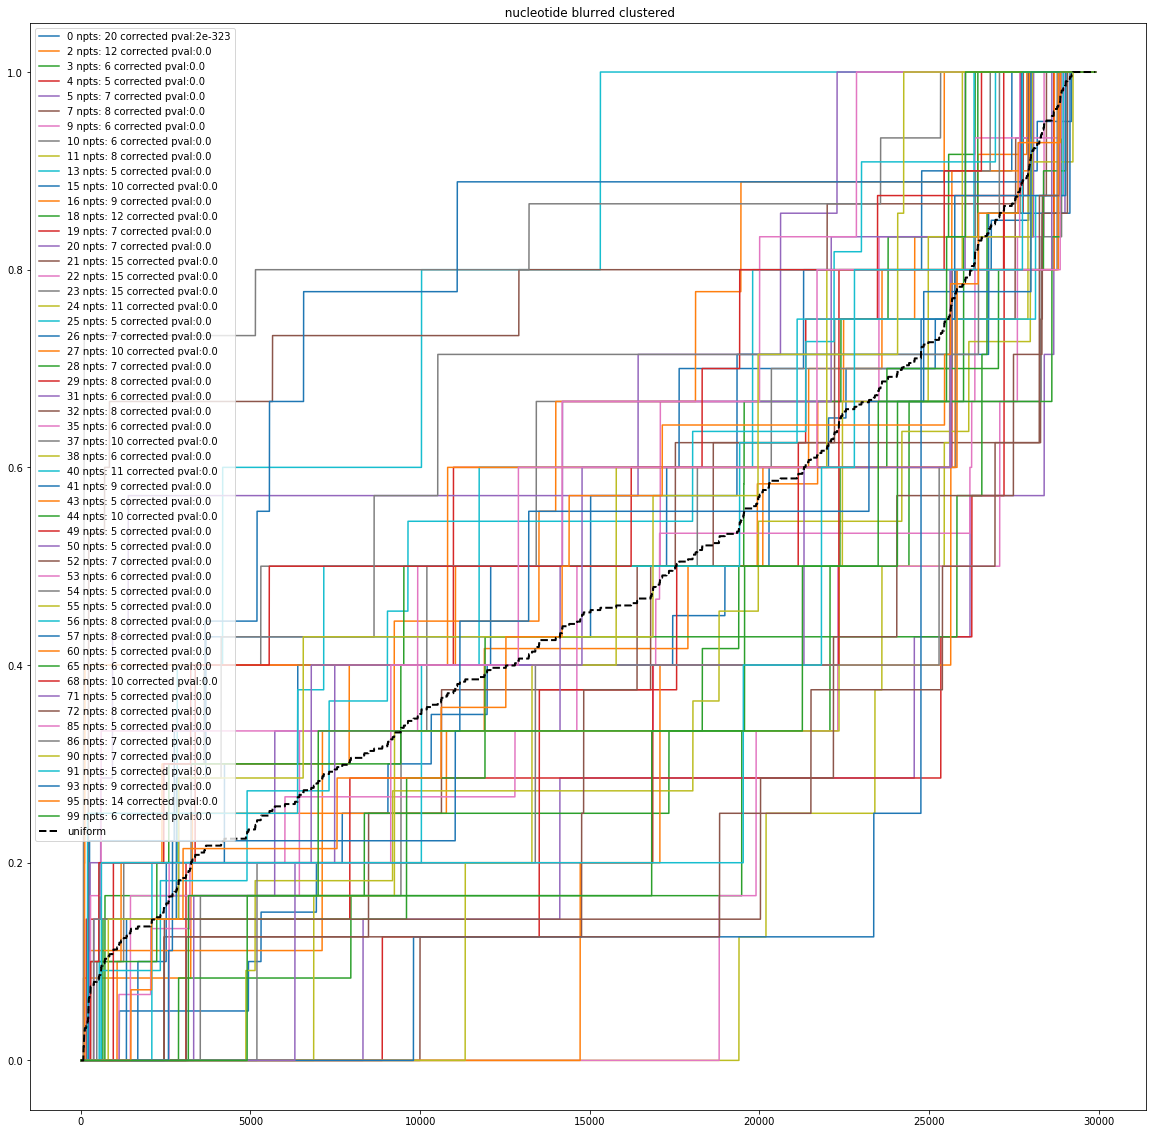

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True]), array([1.047e-321, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000

In [42]:
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
#over the whole genome 
titles = ' codon clusters, svd codon clusters,  nucleotide blurred clustered '.split(',')
for j,cluster_labels in enumerate([ cluster_labels_codon , cluster_labels_reduced , cluster_labels_raw ]):
    clusters, counts = np.unique( cluster_labels , return_counts= True )
    bonferroni = []
    plots = []
    plotlabels=[]
    
    plt.figure( figsize=(20,20))
    
    for i,label in enumerate(clusters):    
        cluster_ones = np.zeros(len(cluster_labels))        
        cluster_ones[ cluster_labels==label ] = 1 
        if counts[i] > 4 and counts[i] < 1000 :
            cdf_BG = np.zeros(len(cluster_labels))
            for k,c in enumerate(clusters):
                if c != label and counts[k] > 4 and counts[k] < 1000 :
                    cdf_BG[cluster_labels==c] = 1
                    
            print( np.sum(cdf_BG) )
            cdf_BG = np.cumsum(cdf_BG) / np.sum(cdf_BG)
            cdf_empirical= np.cumsum(cluster_ones) / np.sum(cluster_ones)
            #compare to bg distribution without
            
            
            res = stats.ks_2samp(cdf_empirical, cdf_BG)
            print(c)
            print(res)
            fig = plt.plot( cdf_empirical )
            plots.append(fig)        
            plotlabels.append( str(label) +  ' npts: '+ str(int( np.sum(cluster_ones)) ) )  
            bonferroni.append(res[1])
    
    cdf_BG = np.zeros(len(cluster_labels))
    for k,c in enumerate(clusters):
        if counts[k] > 4 and counts[k] < 1000 :
            cdf_BG[cluster_labels==c] = 1
    cdf_BG = np.cumsum(cdf_BG) / np.sum(cdf_BG)

    plt.plot(cdf_BG, lw = 2 , ls = 'dashed' , c = 'black' )
    plotlabels = [ str(p) + ' corrected pval:' + str(bonferroni[ i ]) for i,p in enumerate( plotlabels ) ]+['uniform']
    
    plt.legend( plotlabels )
    plt.title( titles[j])
    plt.show()
    bf_correction = multipletests(bonferroni, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
    print(bf_correction)

In [48]:
titles = ' codon clusters, svd codon clusters'.split(',')
titles = [ t.replace(' ' , '_') for t in titles]
for k,cluster_labelsb in enumerate([ cluster_labels_codon , cluster_labels_reduced ]):
    l,c = np.unique(cluster_labelsb, return_counts= True)
    clusterdf = { label : [ codon_dict_rev[p] for p in list( np.where(cluster_labelsb == label )[0]  ) if p in codon_dict_rev ] for i,label in enumerate(list(l)) if c[i]> 1 } 
    clusterdf = pd.DataFrame.from_dict( clusterdf , orient = 'index' , dtype=pd.Int64Dtype() )
    print( clusterdf )
    print(clusterdf.index)
    clusterdf.to_csv( alnfile + titles[k] + 'clusterpositions_columns.csv')

     0      1      2      3      4      5      6      7      8      9     ...  \
0    2671   2674   2878   3001   3286   4864   5146   6391   6418   6694  ...   
1     871   2059   2860   3214   5311  20283  22348  24976  26313  26708  ...   
2   22480  22603  25791   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>  ...   
3    5692   6316  15024  18078  21450  26753  27110  28327   <NA>   <NA>  ...   
4   10327  10630  11974  13722  16794  19845  22342  27726  28007  28324  ...   
5    1876   3241   3370   3739  10774  16863  16956  21823  22036  23710  ...   
6    2392   4228   6565   8233  24067  29026   <NA>   <NA>   <NA>   <NA>  ...   
7    2497   6505   8860  24841  26142  27738   <NA>   <NA>   <NA>   <NA>  ...   
9    6442  14619  14820  20403  25608  25632  26451  27501   <NA>   <NA>  ...   
10   1411  13264  27020  27914   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>  ...   
11   4135   4294   6079  11329  11830  25482  25536  27537   <NA>   <NA>  ...   
12  21655  23755   <NA>   <N

In [ ]:
protstart = {}
protend = {}
position = 0
for i,r in annotation.iterrows():
    protstart[i] = position 
    position += len( r.prots )
    protend[i] = position
annotation['codon_start'] = annotation.index.map( protstart )
annotation['codon_end'] = annotation.index.map( protend )
print(annotation)

In [176]:
import json
titles = ' codon clusters, svd codon clusters'.split(',')

for k,cluster_labels in enumerate([ cluster_labels_codon , cluster_labels_reduced ]):
    clusters = {}
    for l in np.unique(cluster_labels):
        if len(cluster_labels[ cluster_labels==l ] ) < 200 and len(cluster_labels[ cluster_labels==l ] ) > 4:
            #index of positions
            cluster_postions = np.where( cluster_labels==l )
            for i,r in annotation.iterrows():
                for p in list(cluster_postions[0]):
                    if r.prot_start < p+1 and r.prot_end > p+1:
                        if i not in clusters:
                            clusters[i] = {}
                        if l not in clusters[i]:
                            clusters[i][l] = []
                        clusters[i][l].append(p+1-r.prot_start)
    annotation[titles[k]]= annotation.index.map( clusters )

#annotation['clusters'] = annotation.clusters.map( lambda x : json.dumps( x ) )
print(annotation)

annotation.to_csv('./gisaid/hCoV-19_USA_MA-MGH-00701_2020_EPI ISL 460358_2020-04-06_wclusters.csv')

with open( 'annothack.pkl' , 'wb') as annotout:
    annotout.write(pickle.dumps(annotation))

      qseqid          sseqid   qlen  slen  qstart   qend  qframe  \
13  testgeno  YP_009725298.1  29903   638     806   2719       2   
3   testgeno  YP_009725299.1  29903  1945    2720   8554       2   
17  testgeno  YP_009725300.1  29903   500    8555  10054       2   
21  testgeno  YP_009725301.1  29903   306   10055  10972       2   
25  testgeno  YP_009725302.1  29903   290   10973  11842       2   
41  testgeno  YP_009725303.1  29903    83   11843  12091       2   
32  testgeno  YP_009725304.1  29903   198   12092  12685       2   
37  testgeno  YP_009725305.1  29903   113   12686  13024       2   
34  testgeno  YP_009725306.1  29903   139   13025  13441       2   
12  testgeno  YP_009725307.1  29903   932   13462  16236       1   
15  testgeno  YP_009725308.1  29903   601   16237  18039       1   
16  testgeno  YP_009725309.1  29903   527   18040  19620       1   
19  testgeno  YP_009725310.1  29903   346   19621  20658       1   
23  testgeno  YP_009725311.1  29903   298   2065

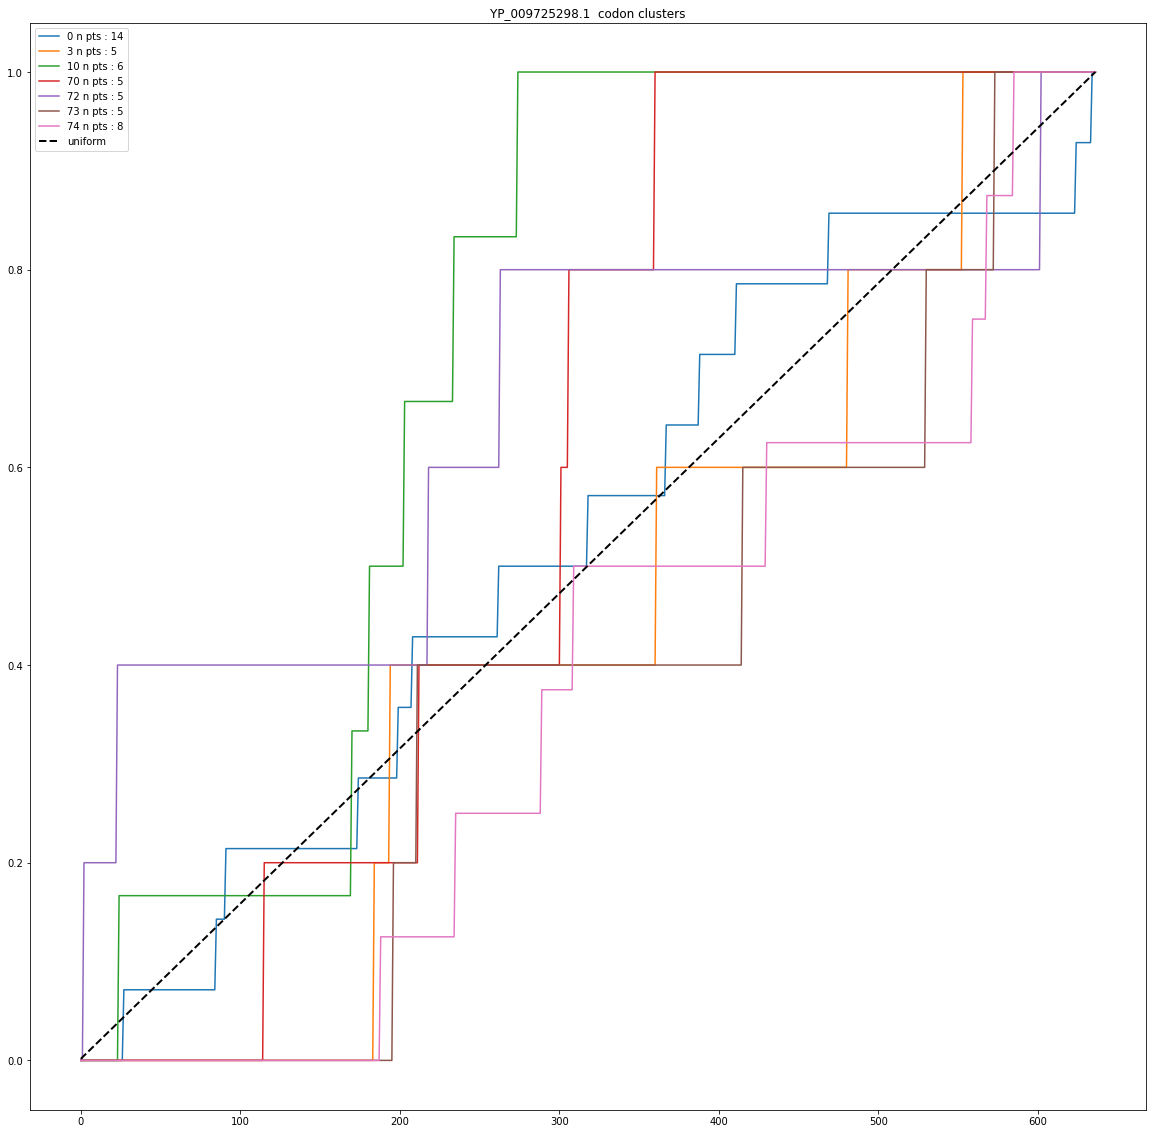

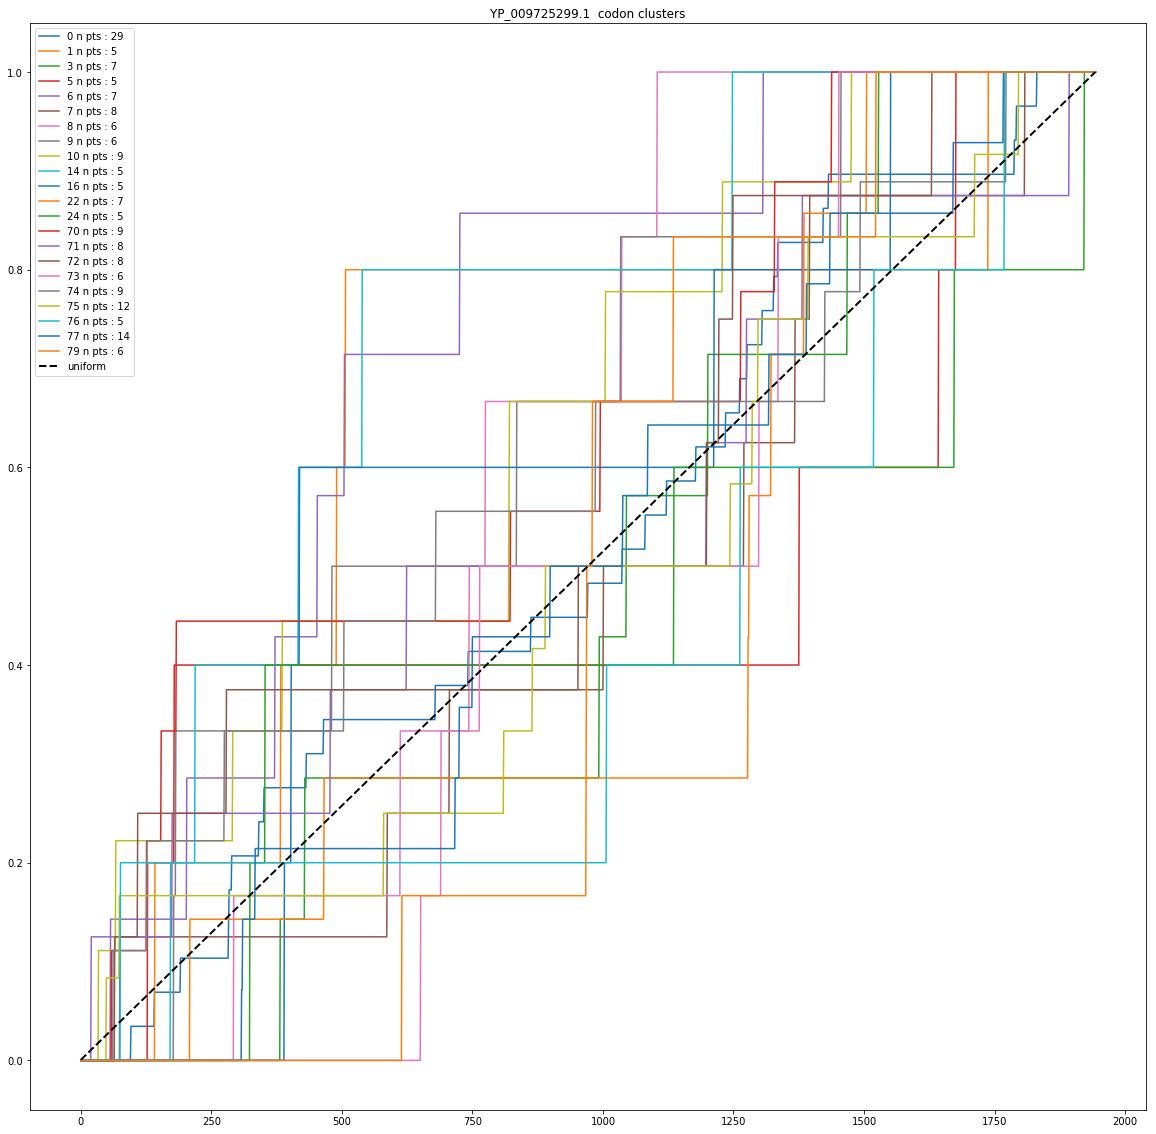

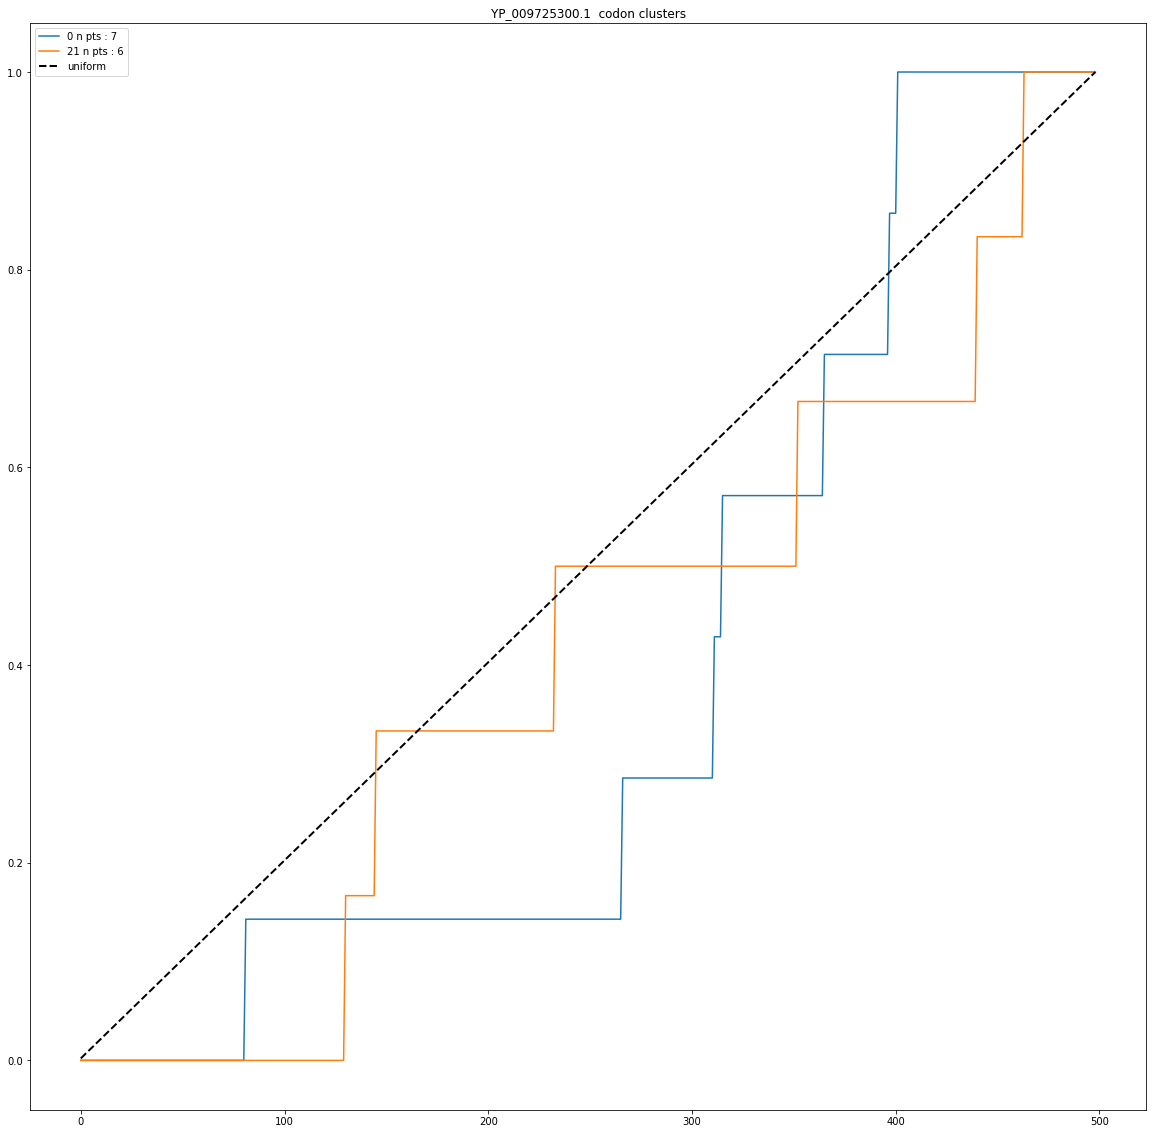

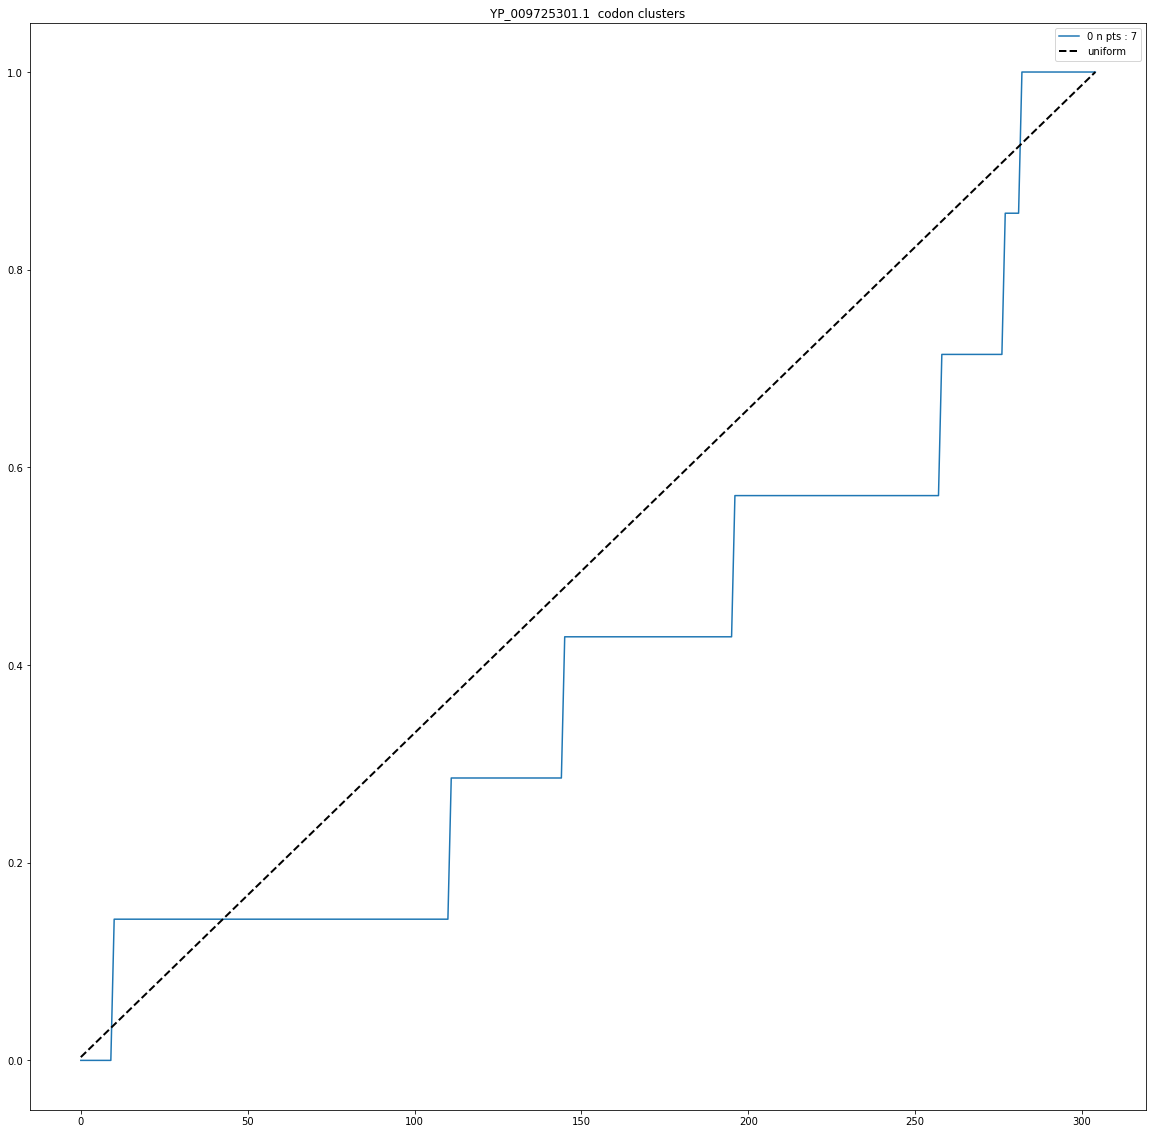

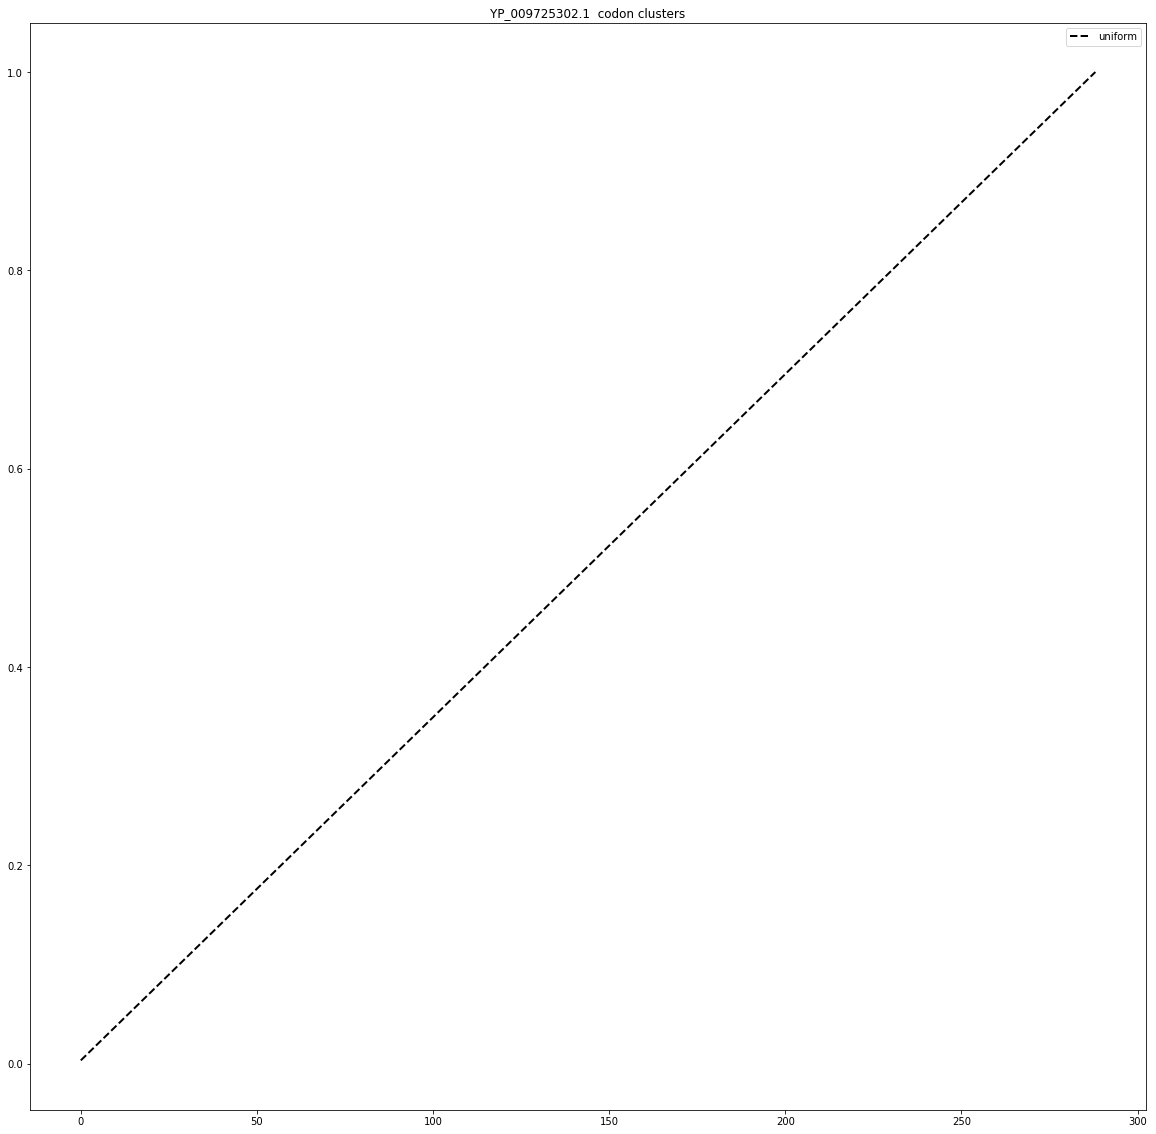

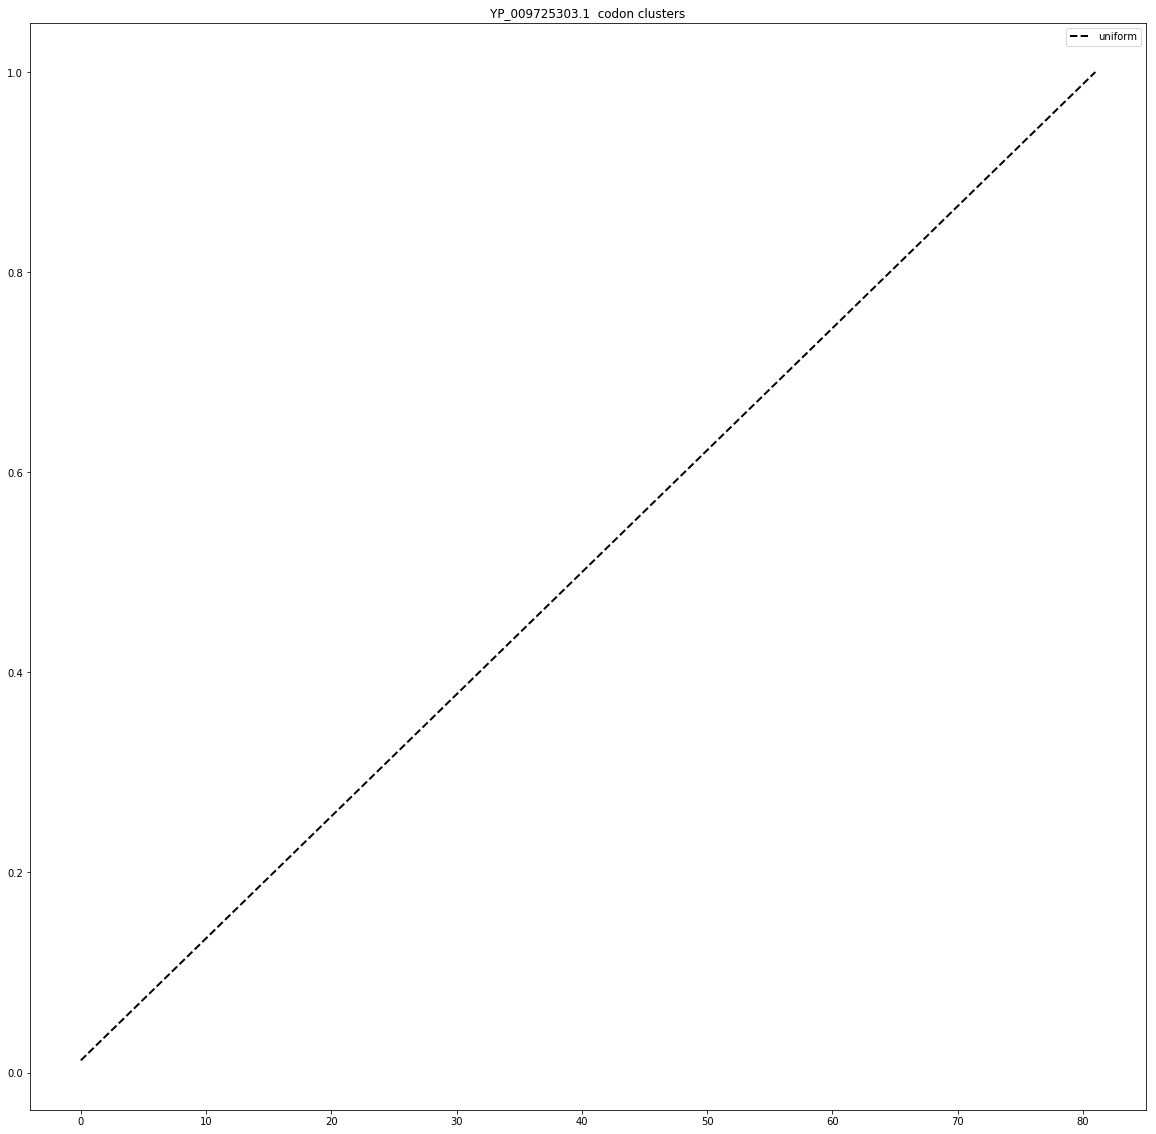

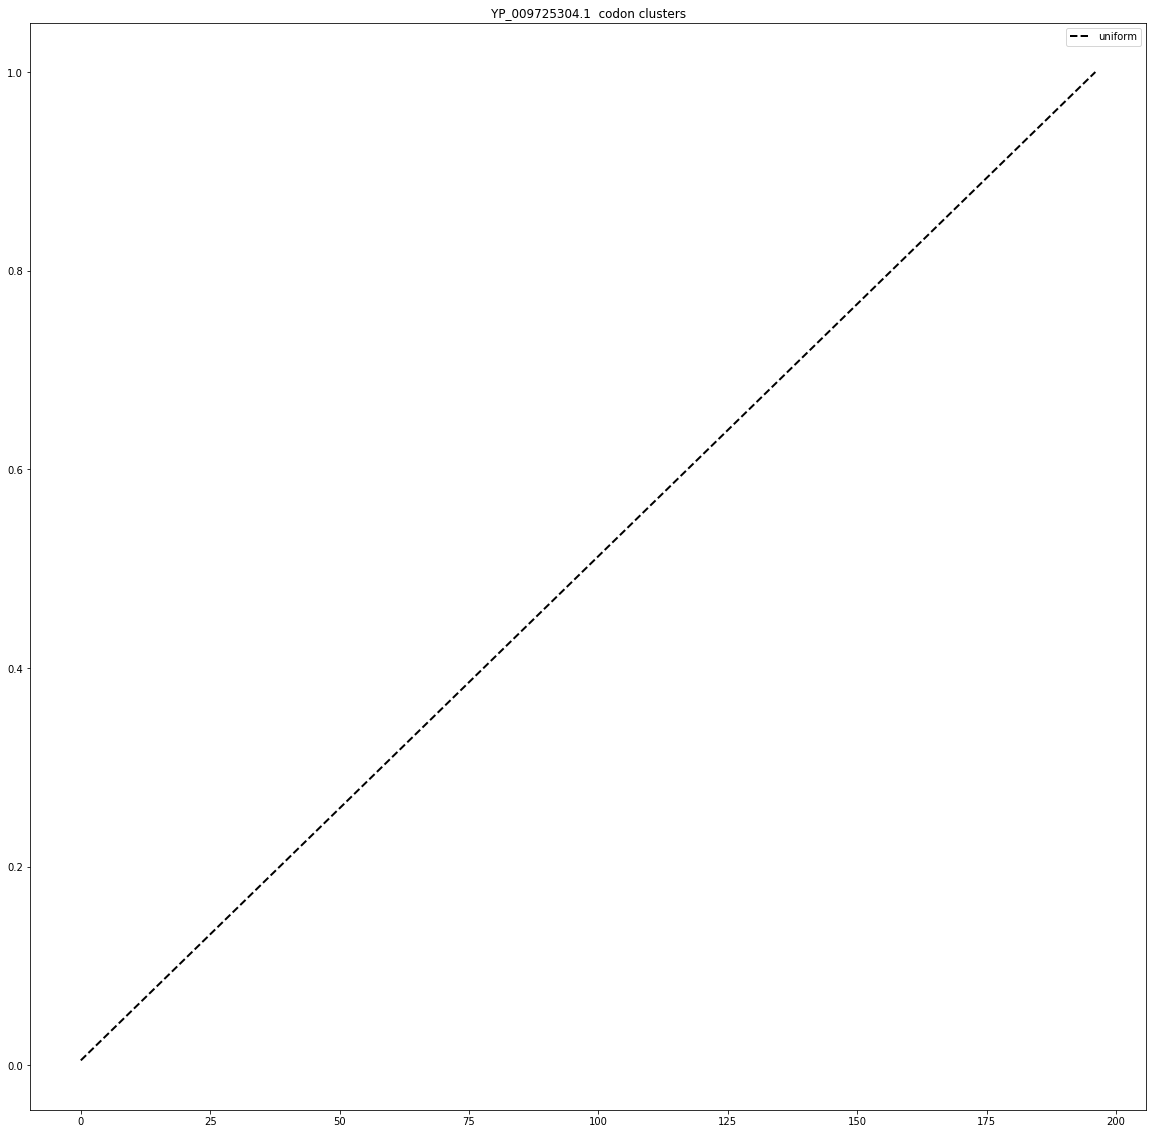

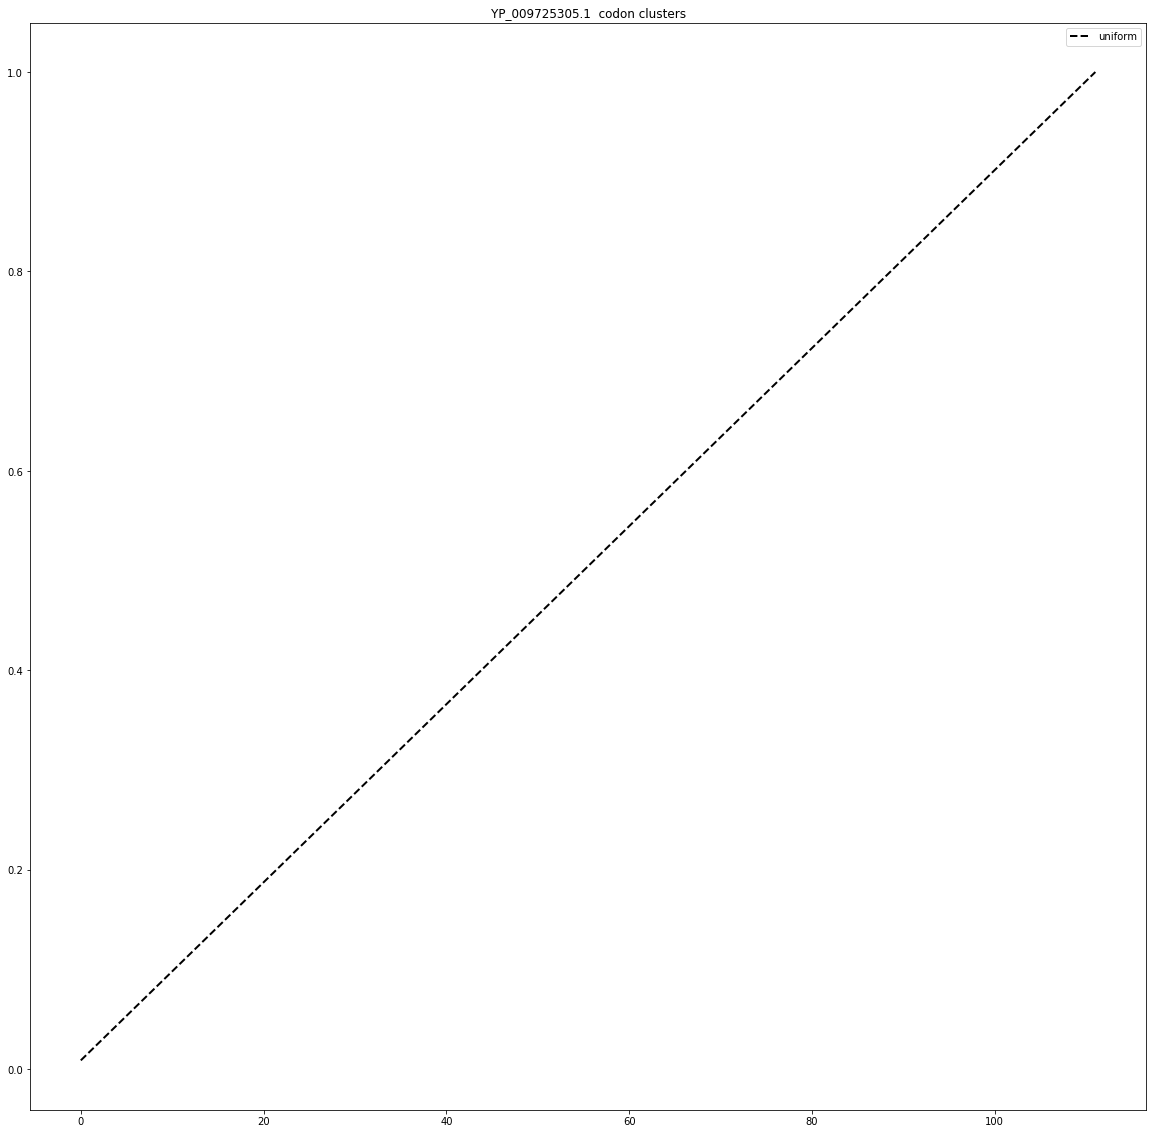

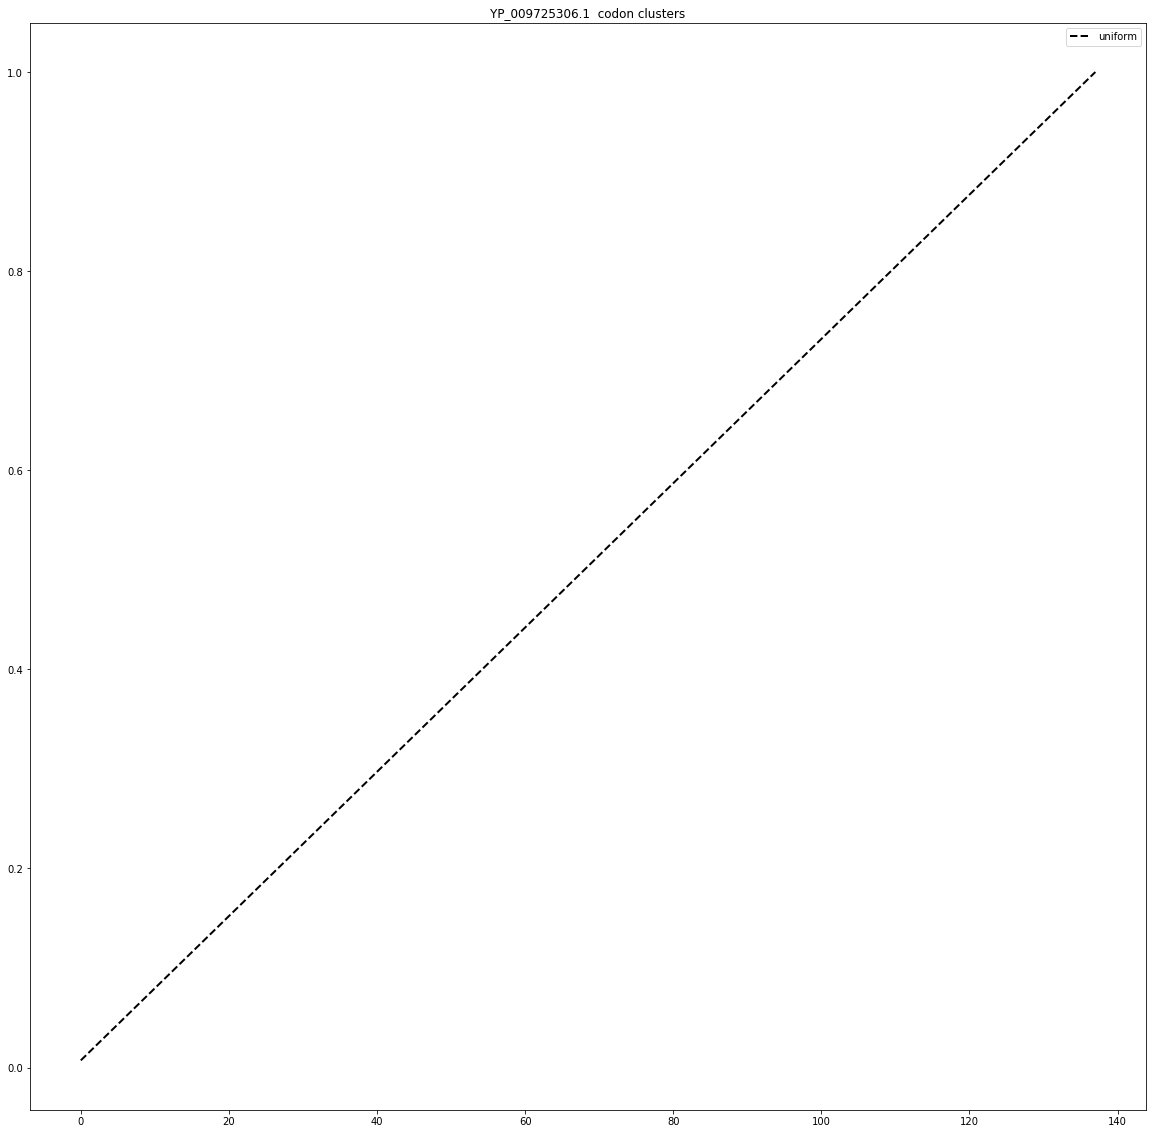

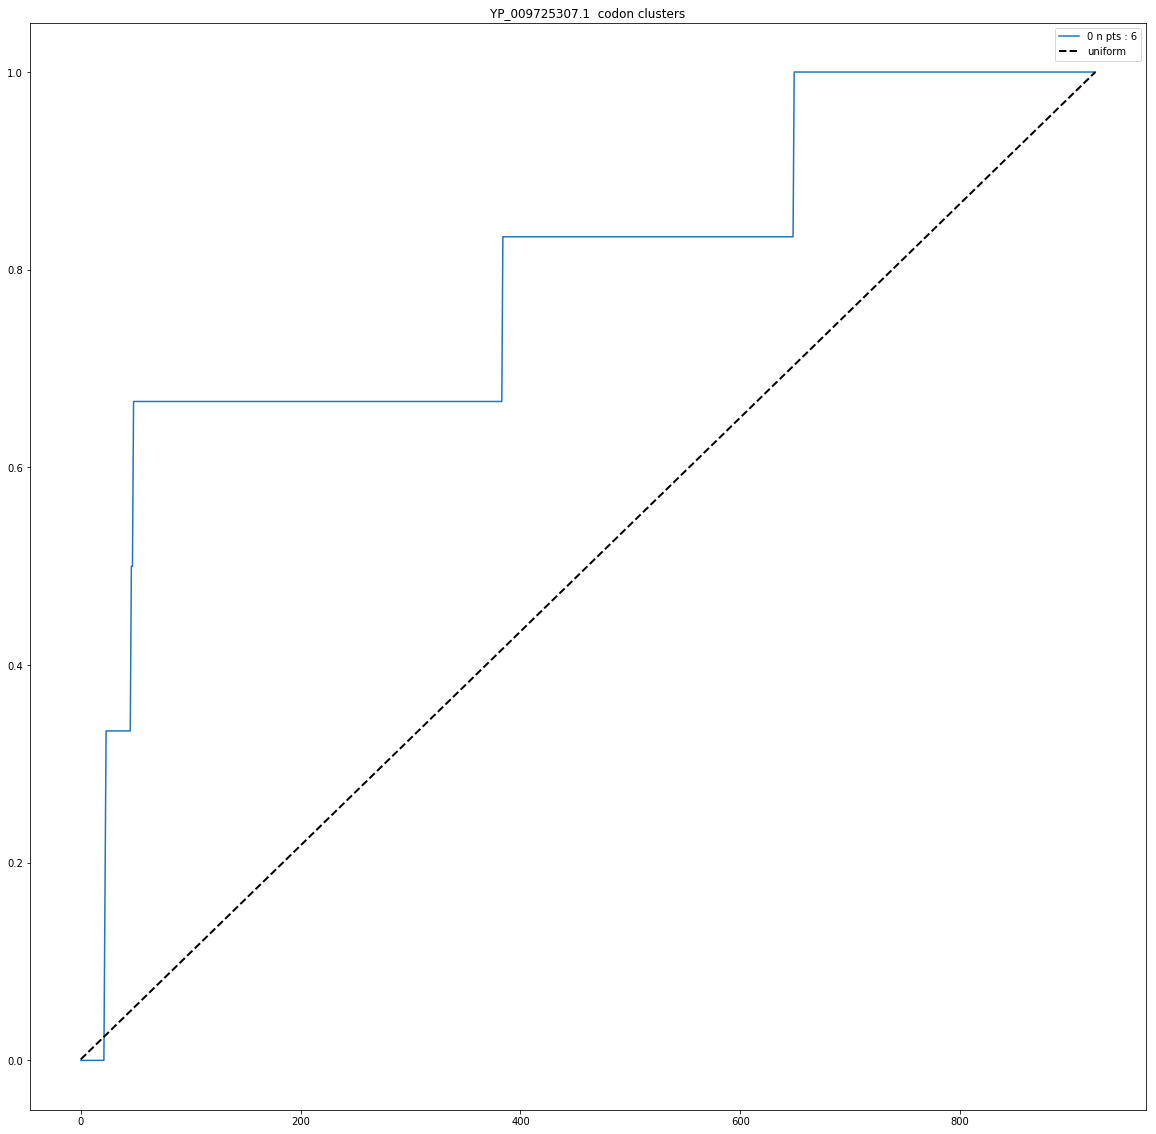

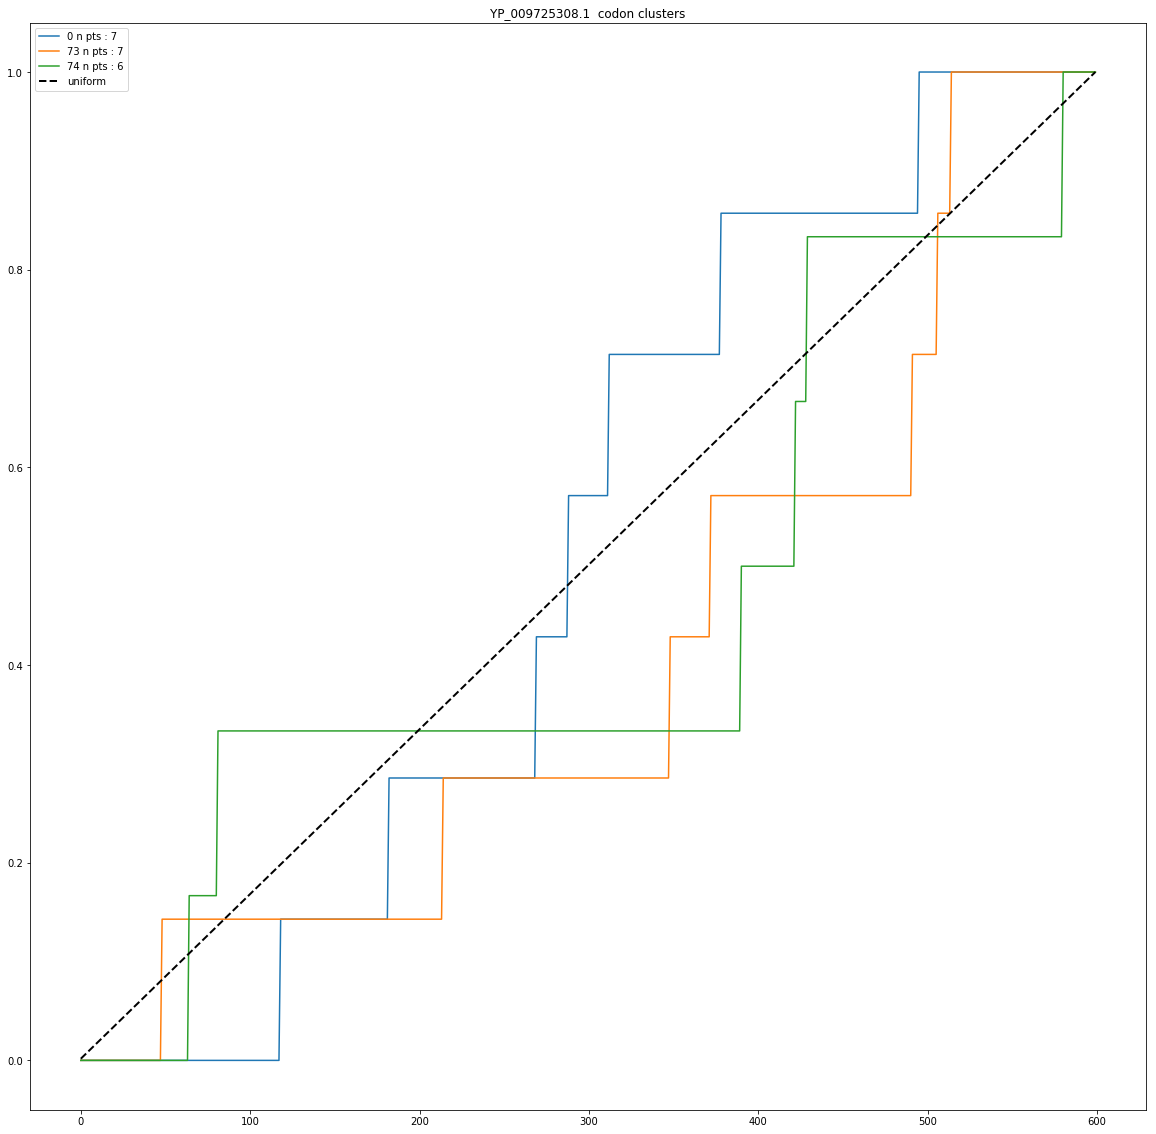

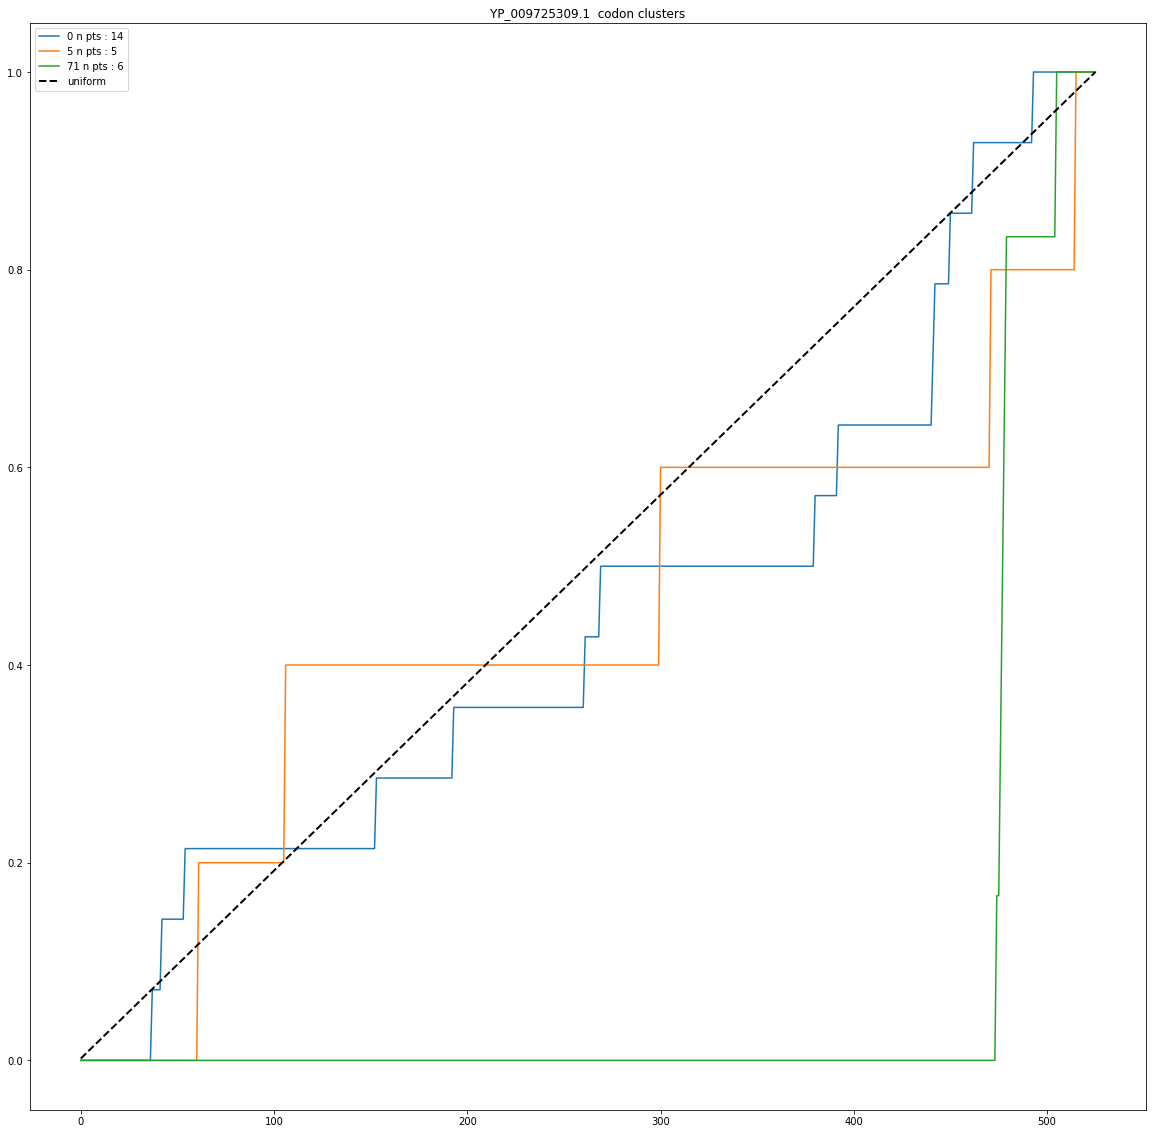

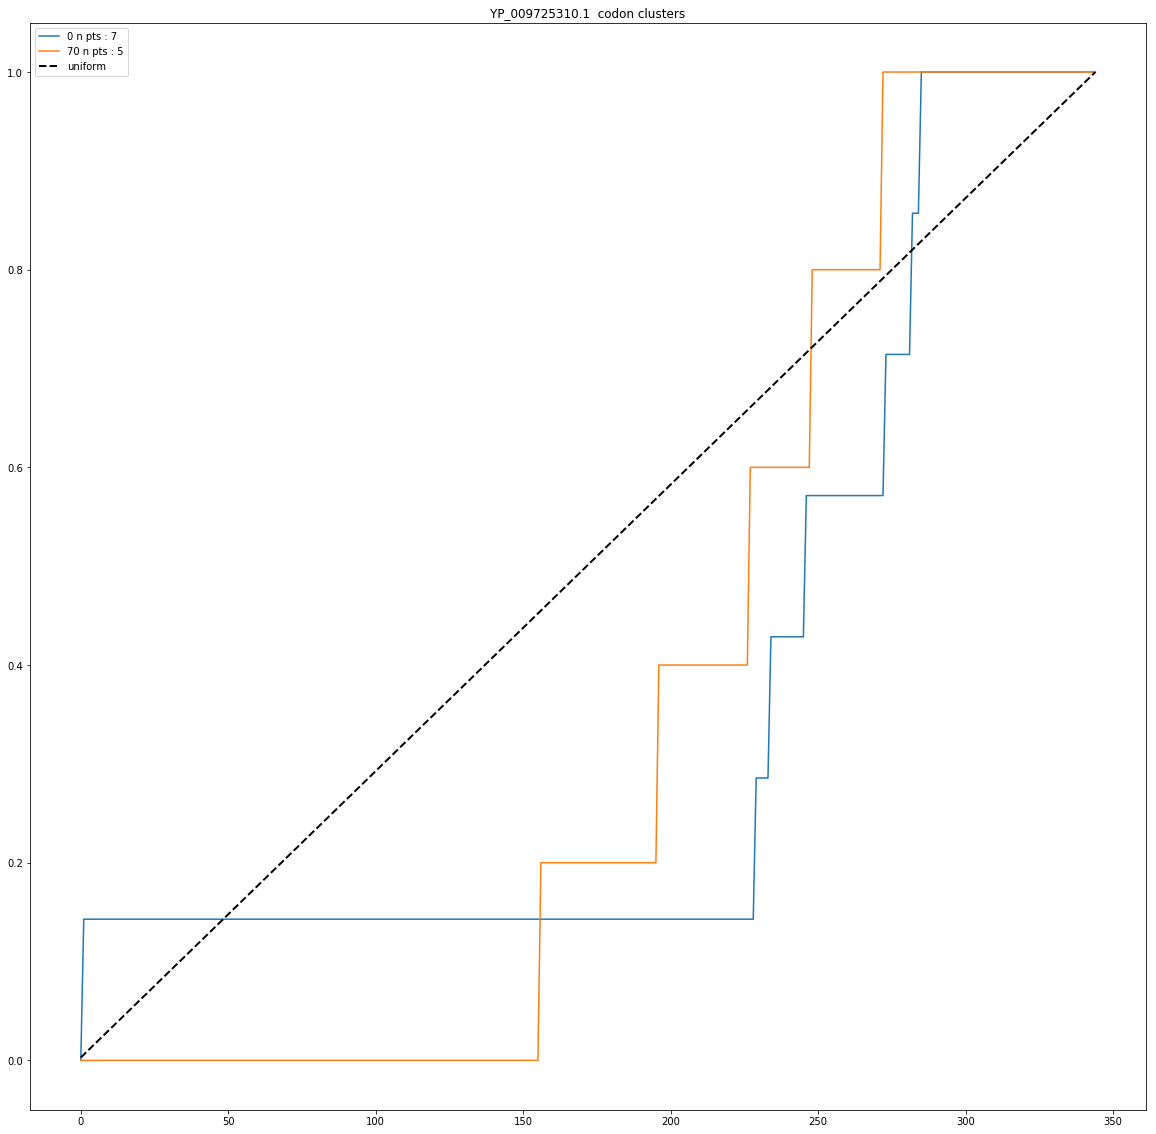

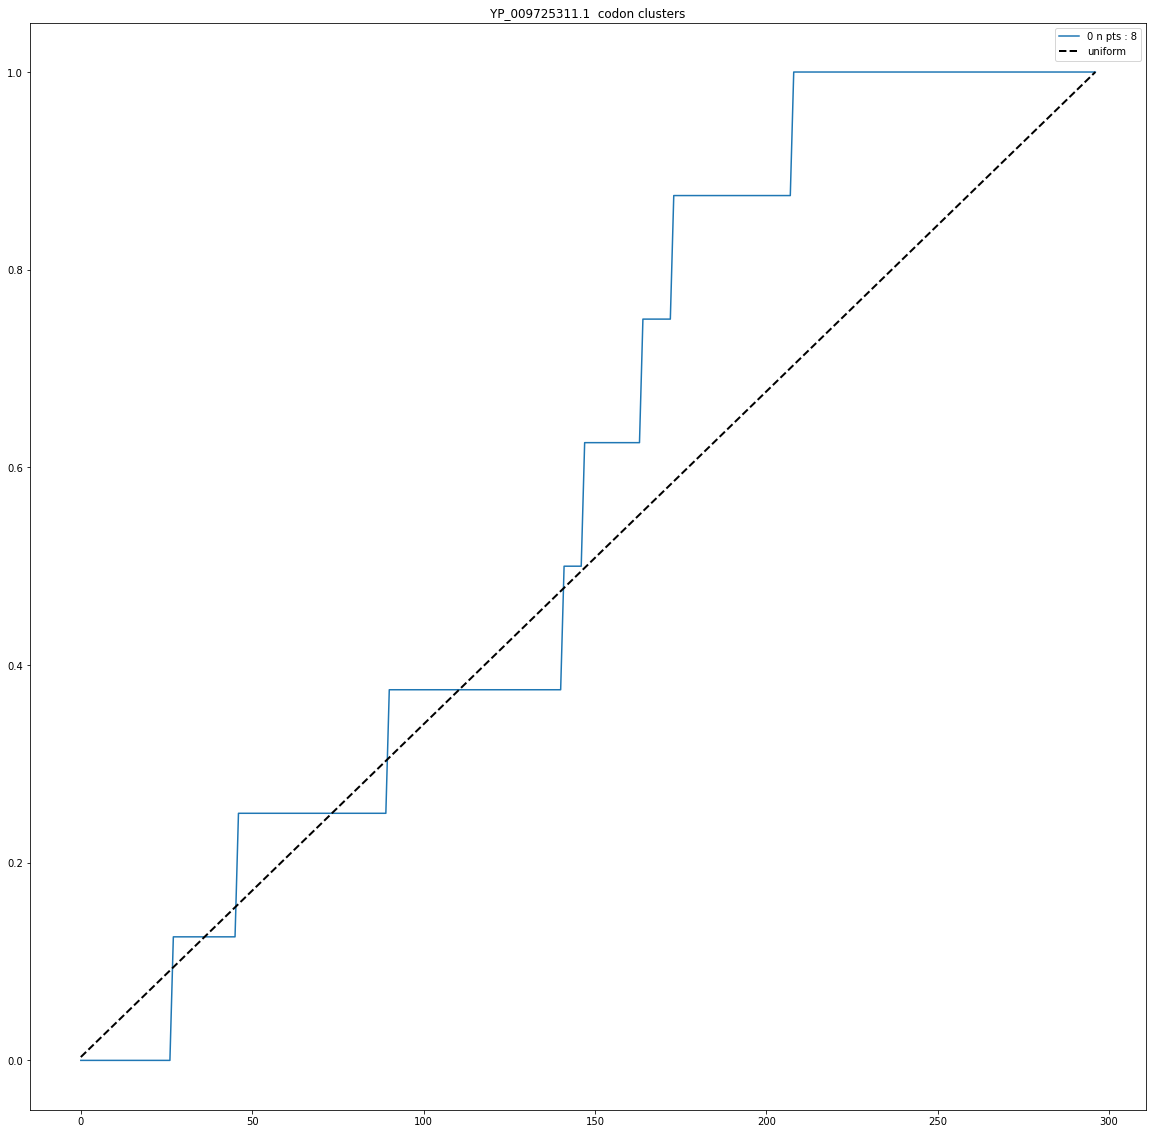

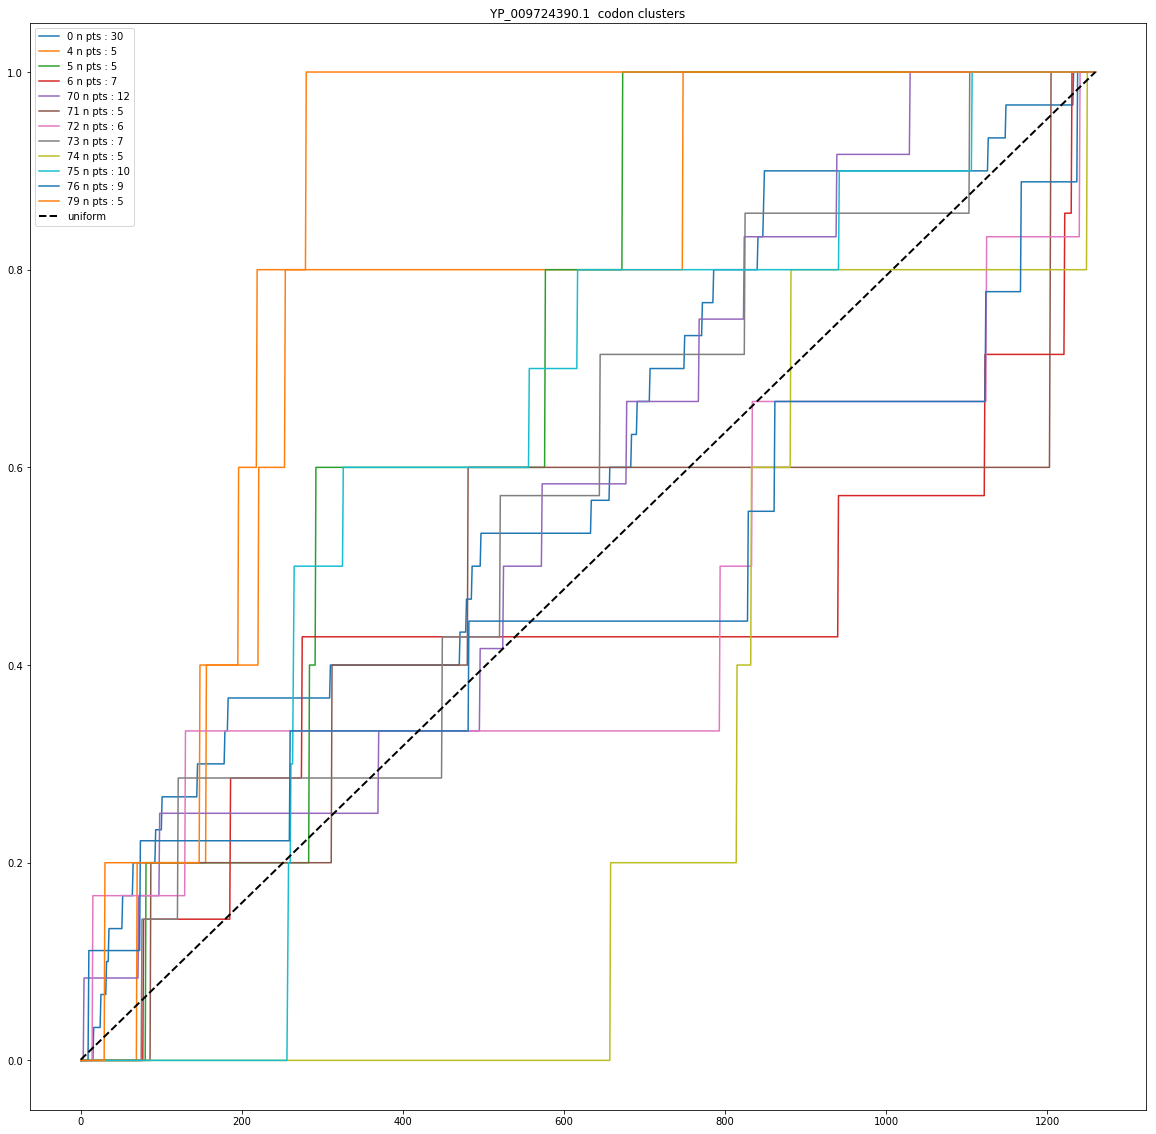

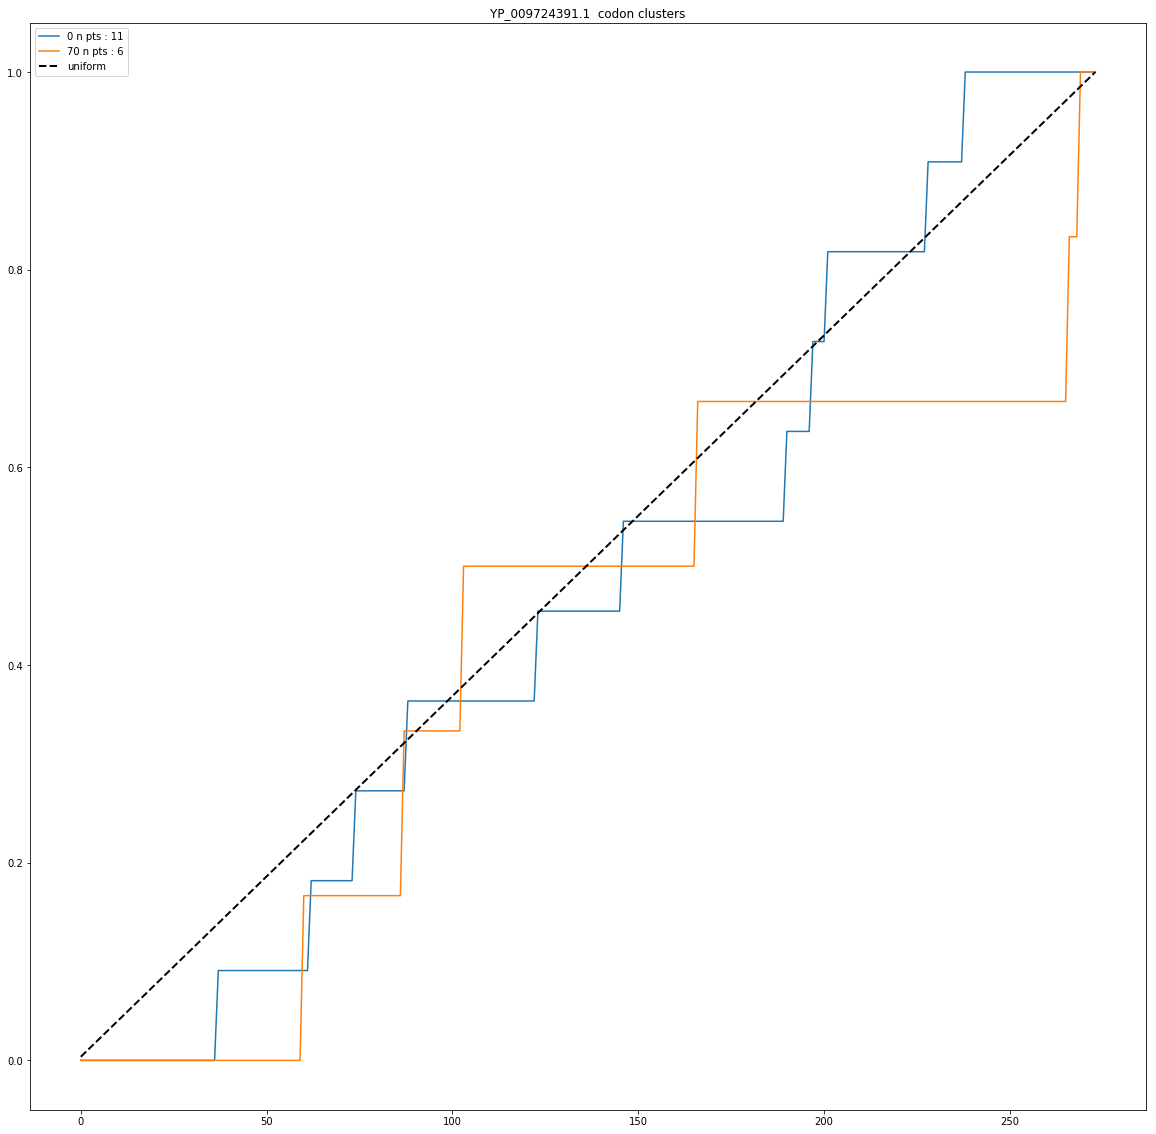

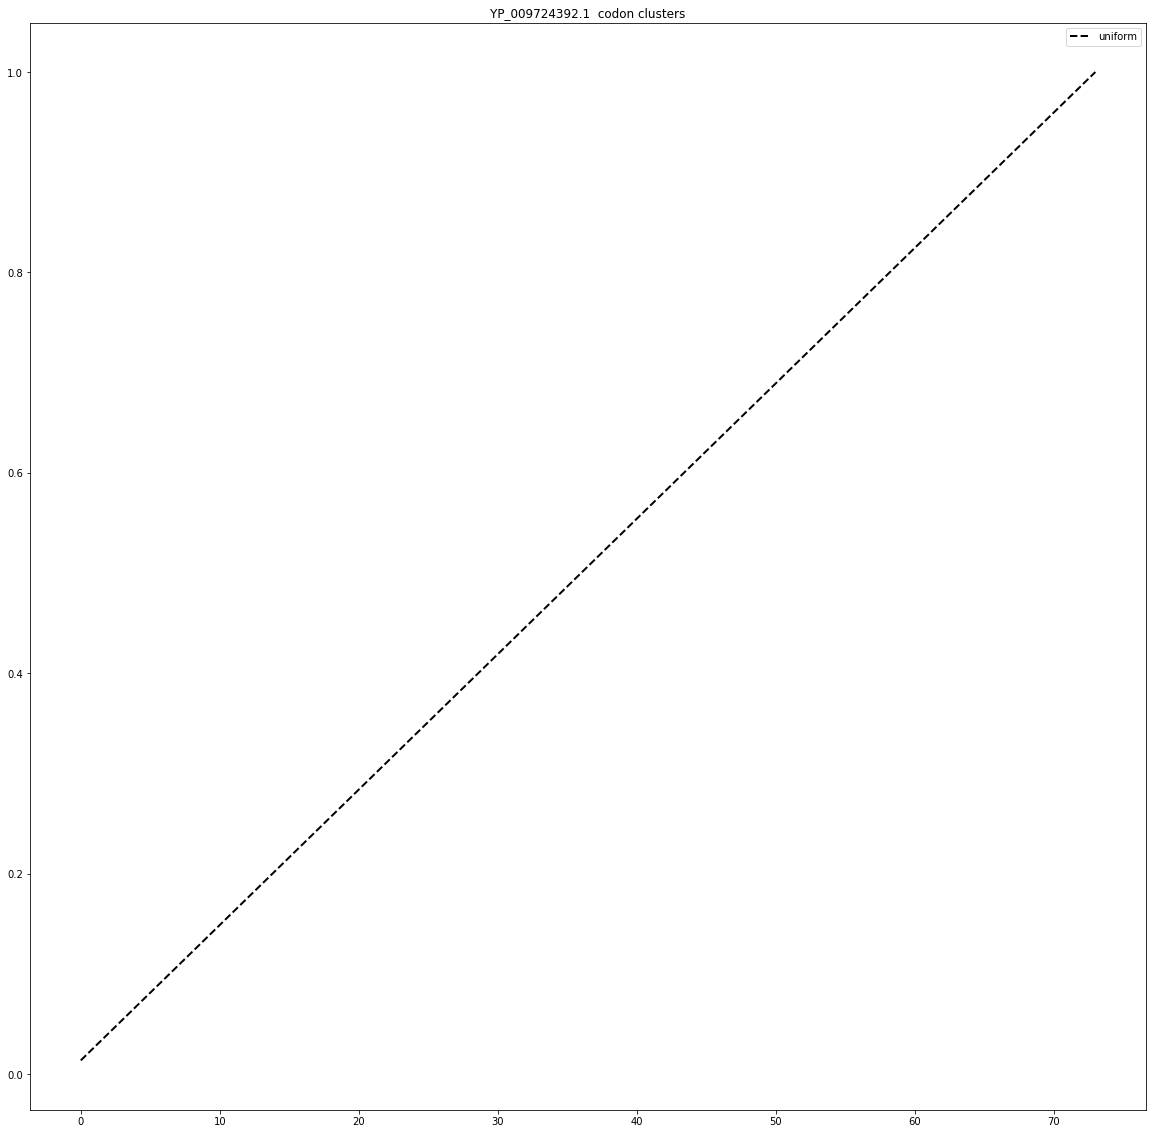

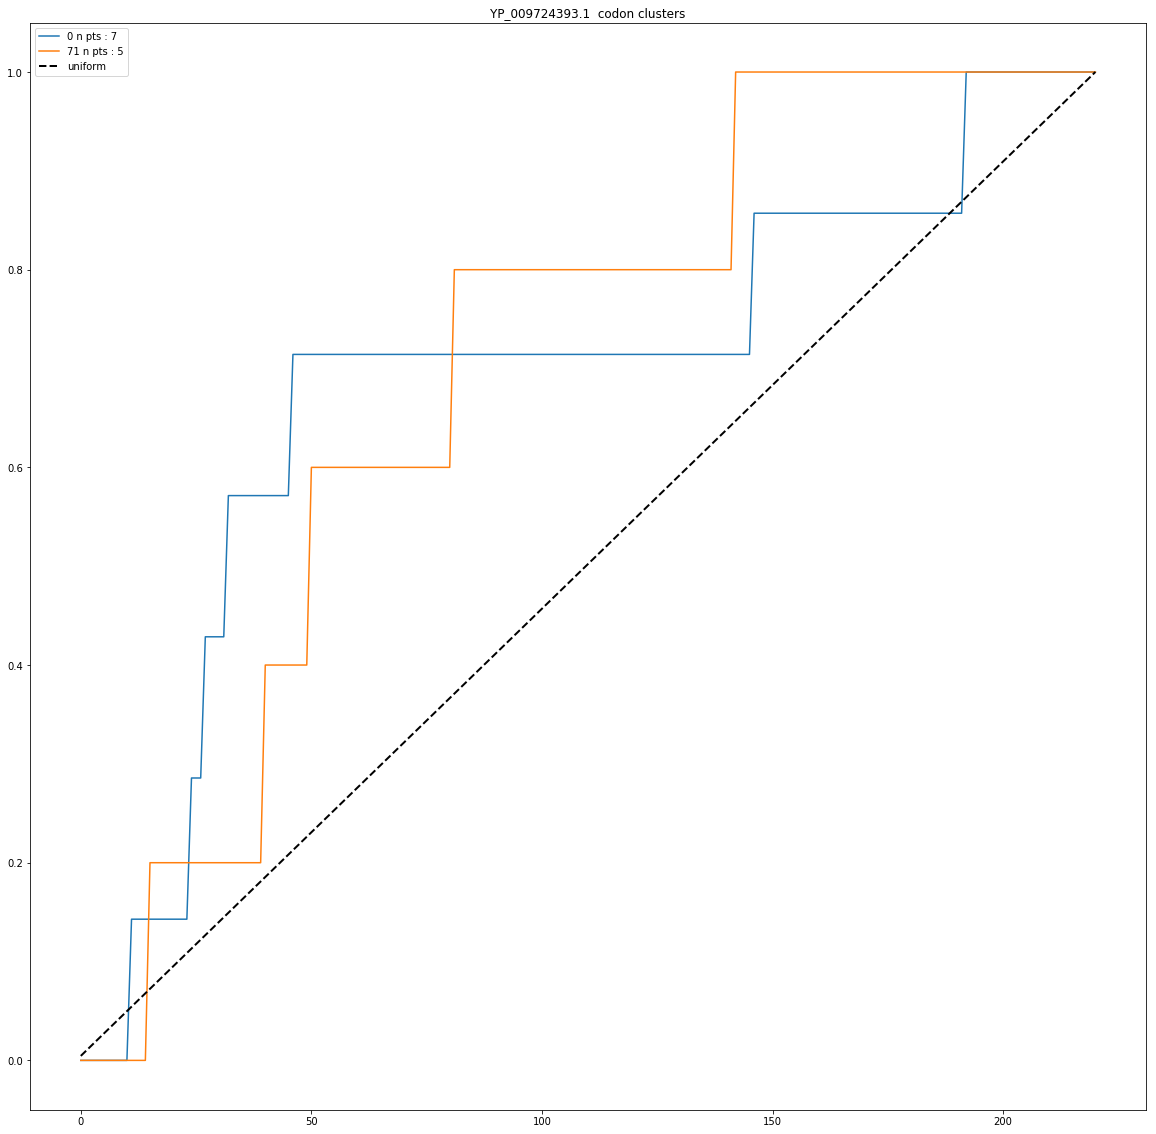

0
(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True]), array([2.35634820e-10, 7.99825678e-43, 7.29200426e-68, 1.01846378e-19,
       0.00000000e+00, 1.31293657e-26, 2.91433274e-22, 1.51034600e-86,
       4.55093803e-23, 2.28985226e-56, 1.27170390e-04, 6.84425222e-52]), 0.004265318777560645, 0.004166666666666667)
3
(array([ True,  True]), array([2.96461368e-47, 1.01520052e-86]), 0.025320565519103666, 0.025)
10
(array([ True,  True]), array([8.16587081e-196, 7.68569485e-117]), 0.025320565519103666, 0.025)
70
(array([ True,  True,  True,  True,  True]), array([2.36299231e-109, 4.50336386e-213, 3.13502833e-064, 8.28545364e-037,
       2.74006640e-022]), 0.010206218313011495, 0.01)
72
(array([ True,  True,  True]), array([5.79965785e-86, 2.02715777e-92, 3.64050791e-98]), 0.016952427508441503, 0.016666666666666666)
73
(array([ True,  True,  True,  True]), array([1.93366693e-053, 1.23369132e-109, 6.13482094e-046, 2.17979114e-045]), 0.01274145509

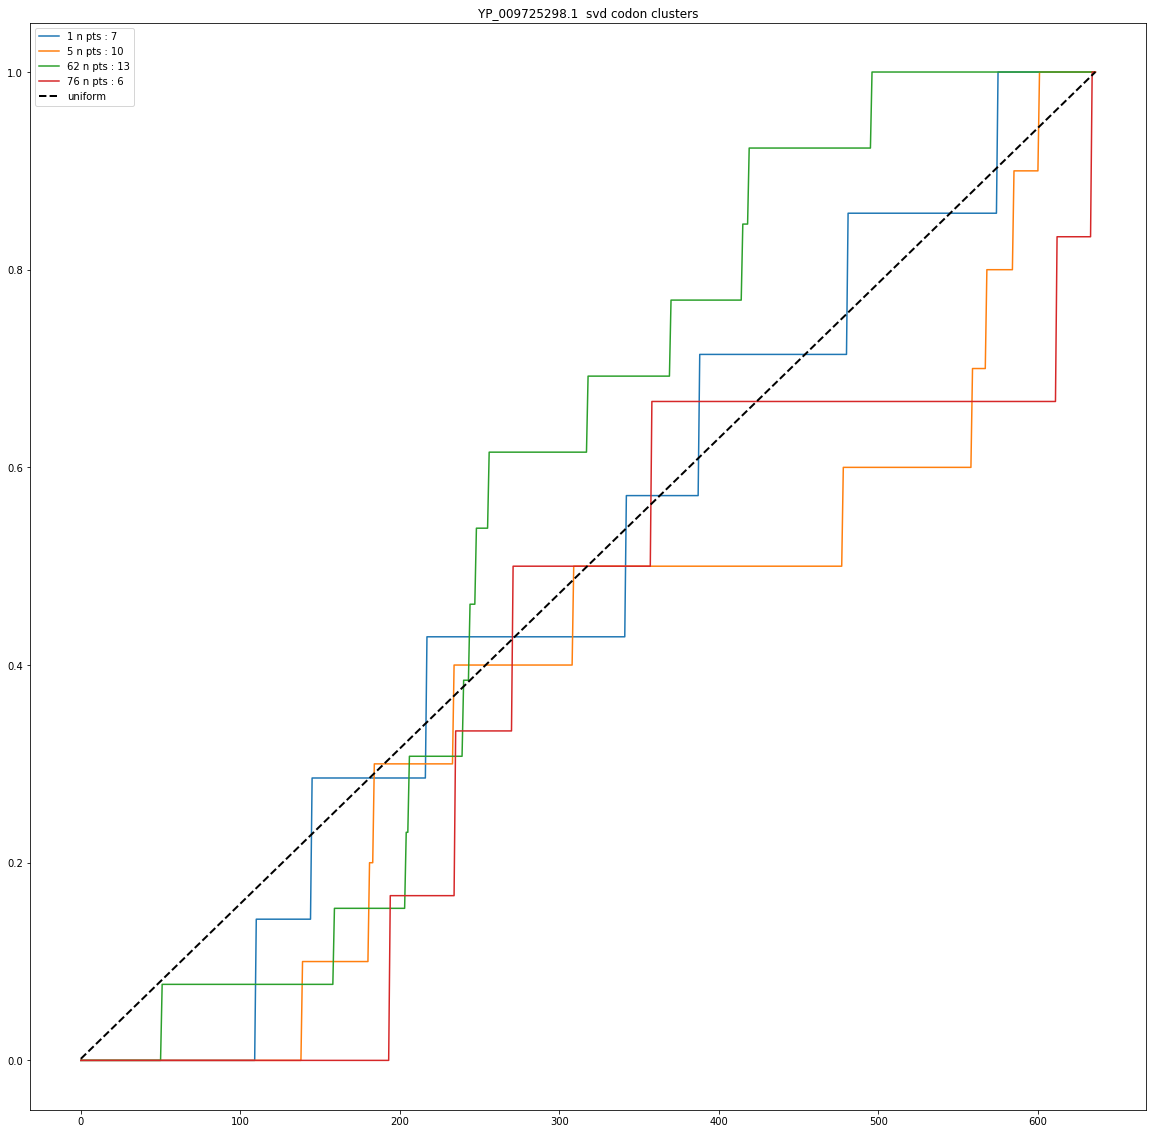

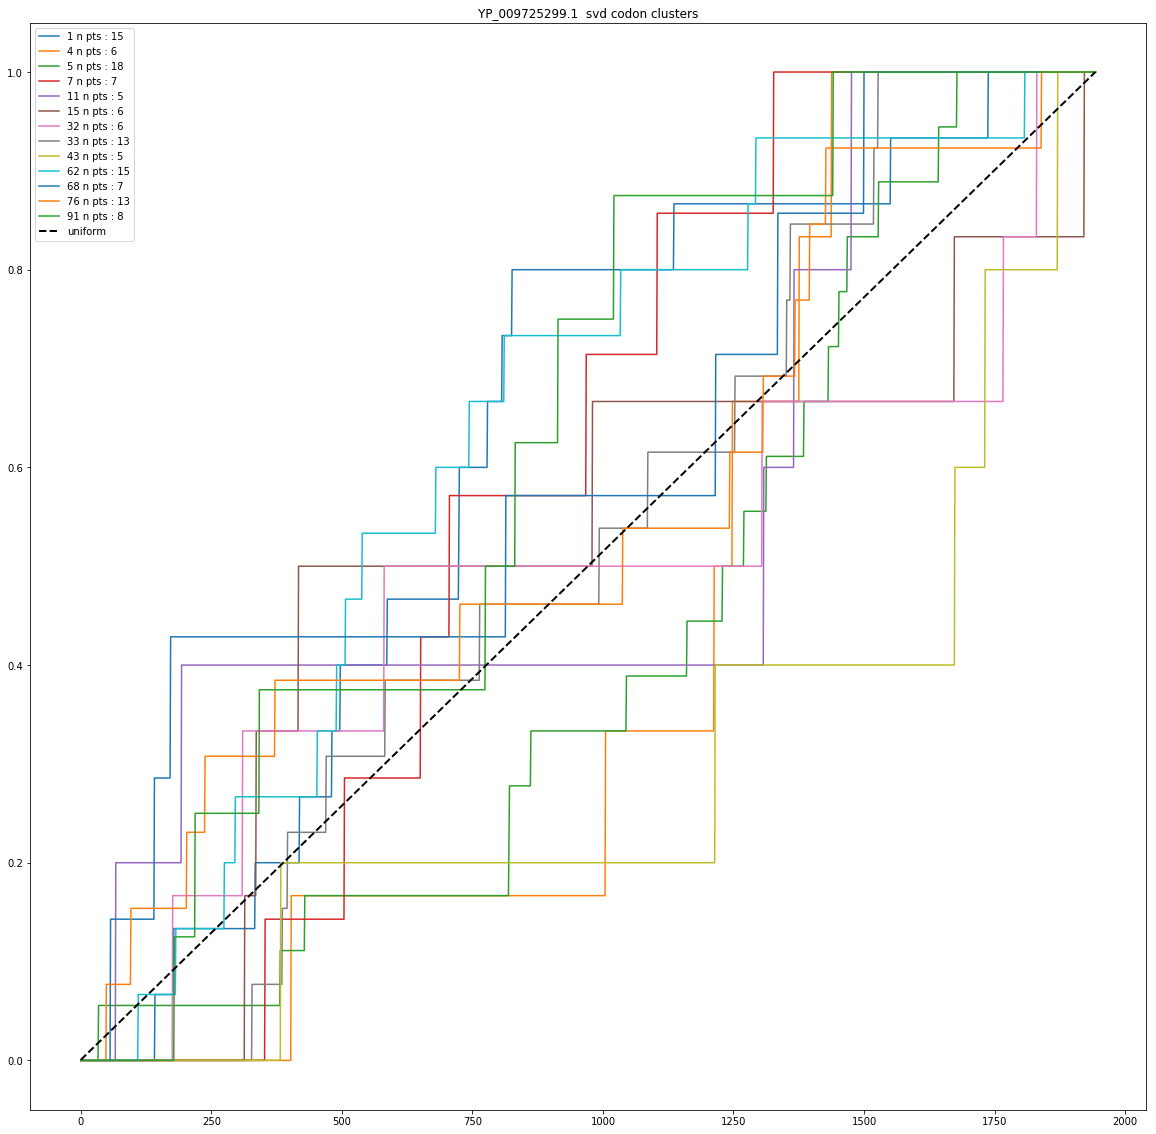

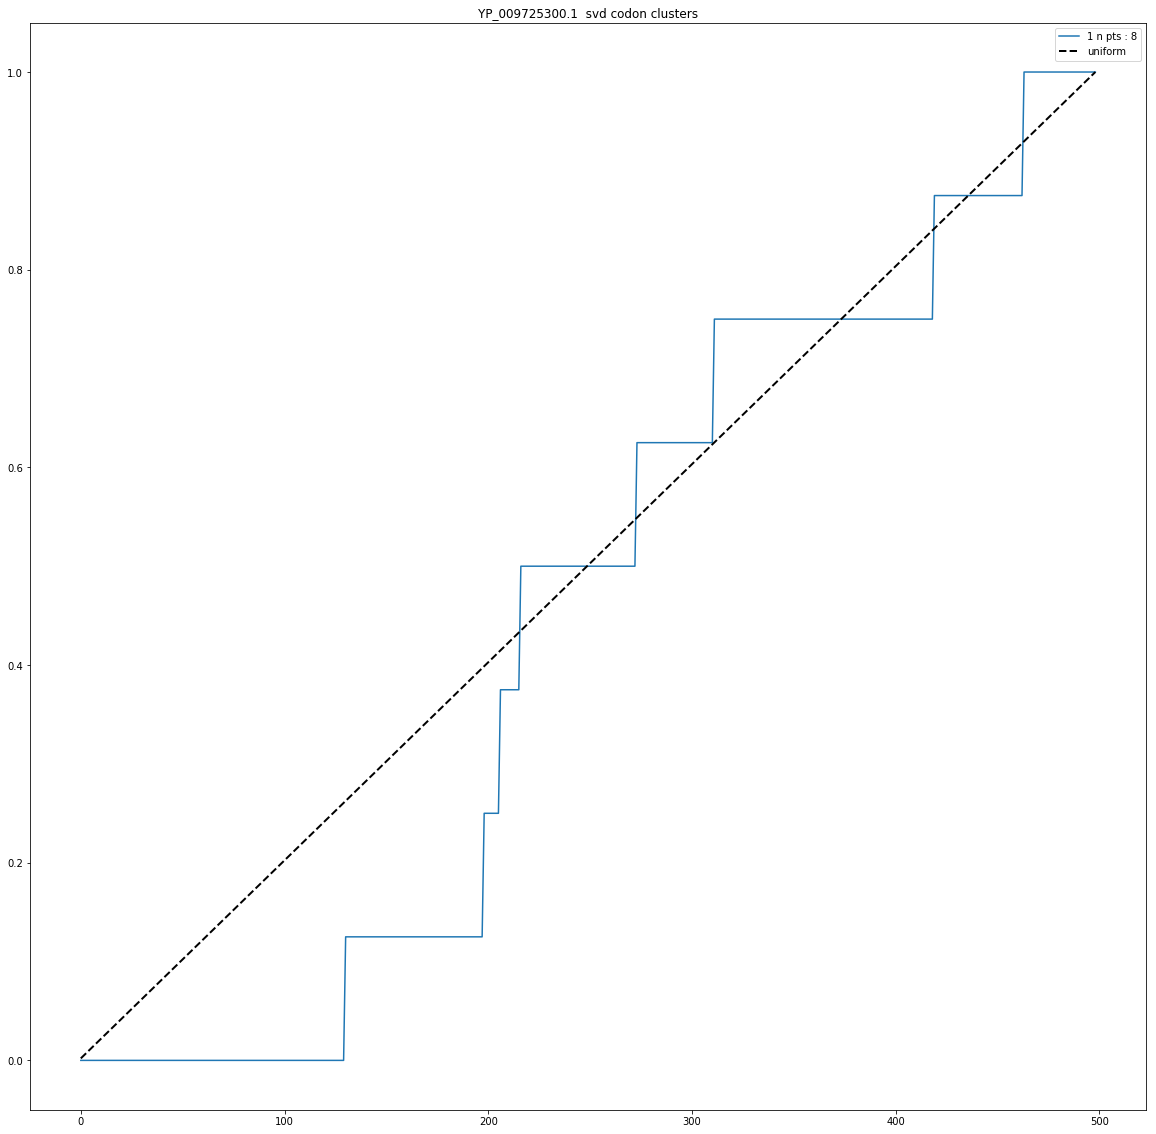

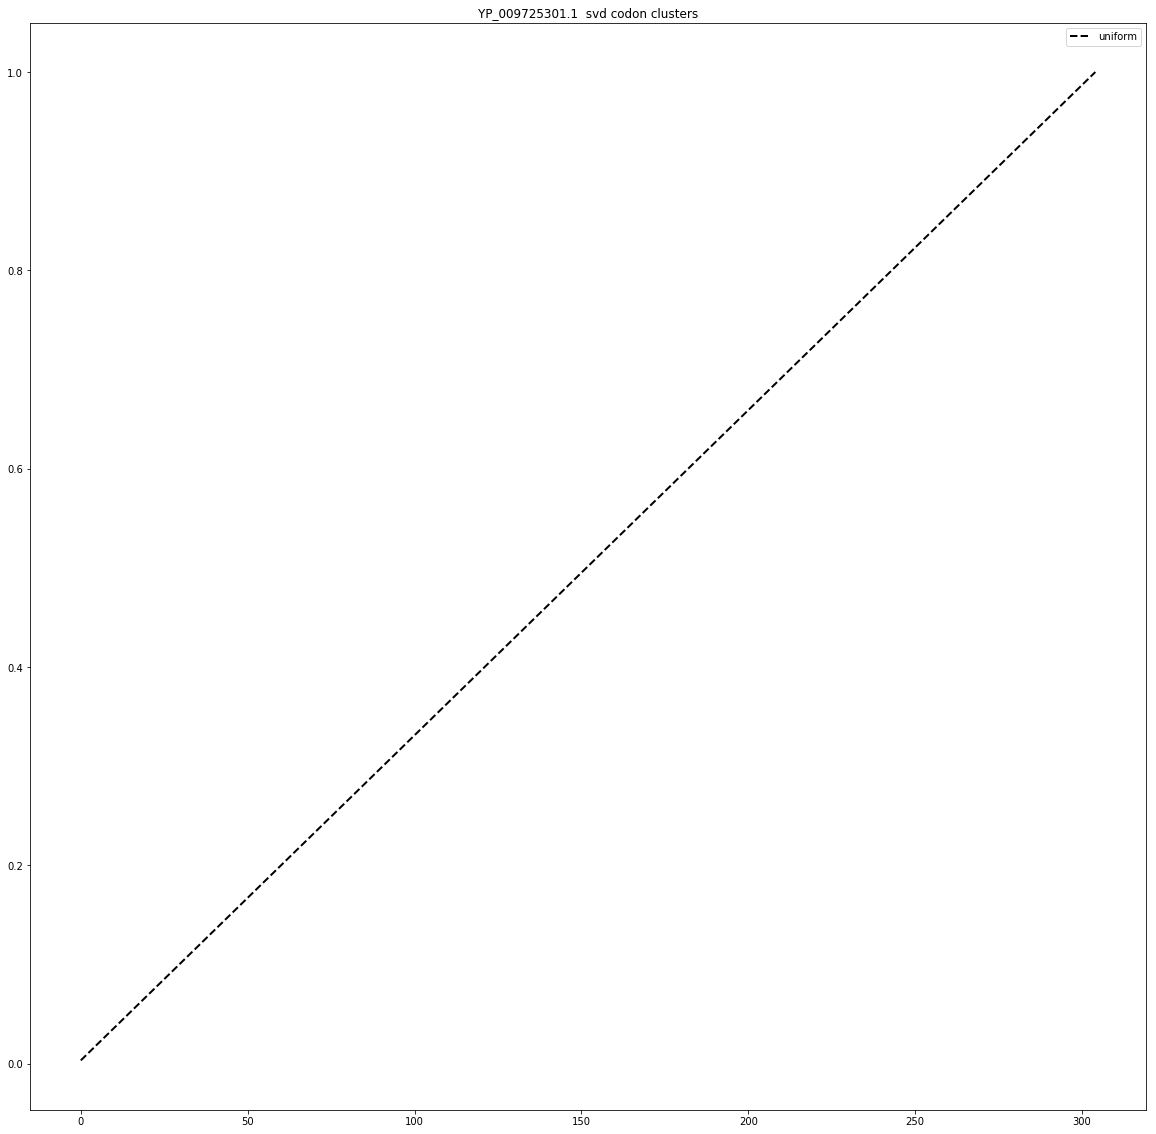

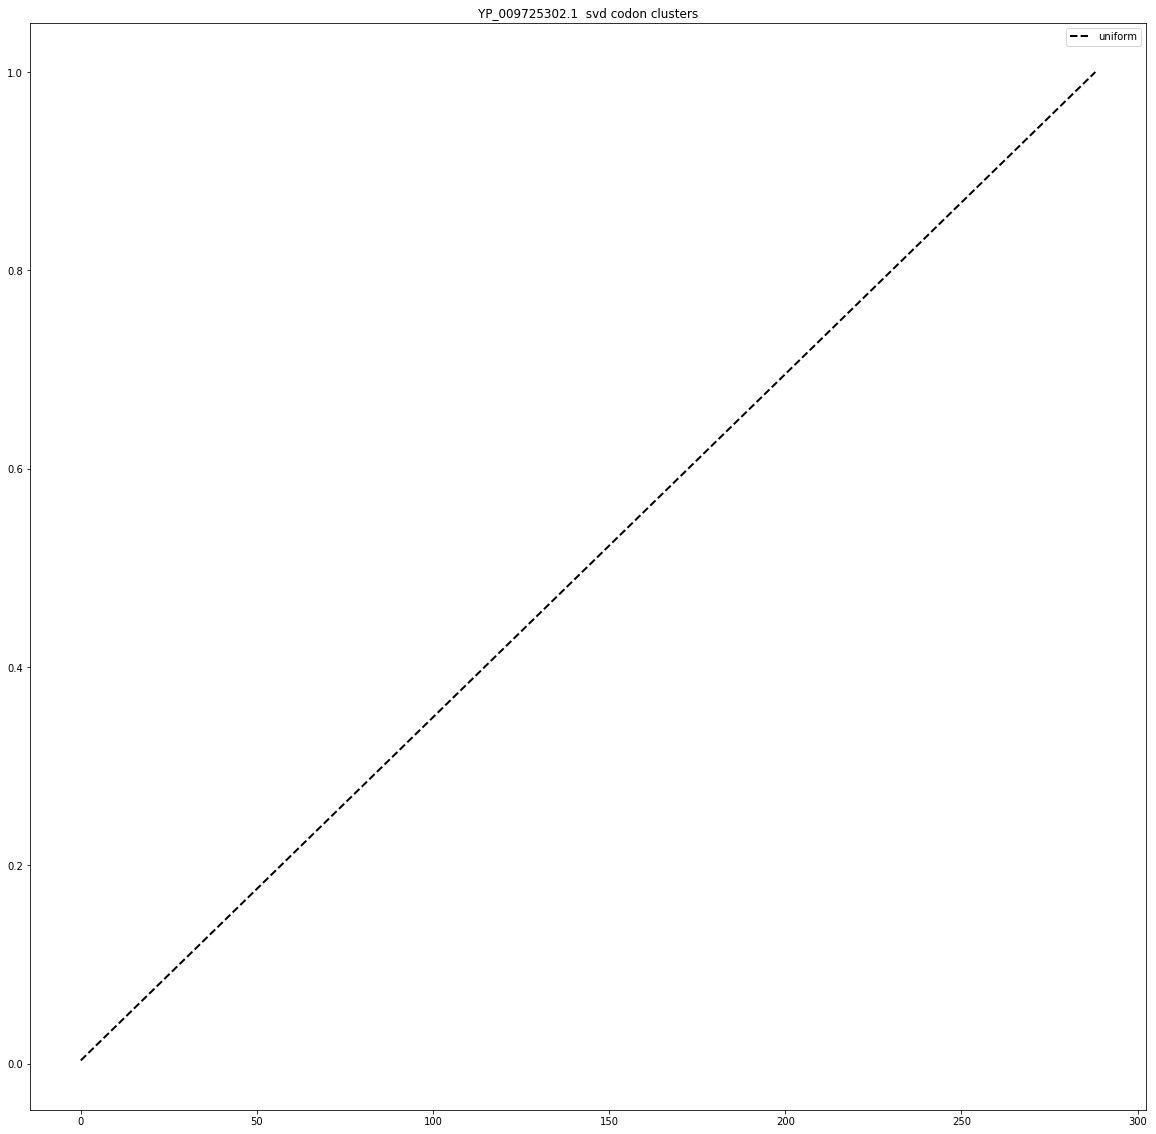

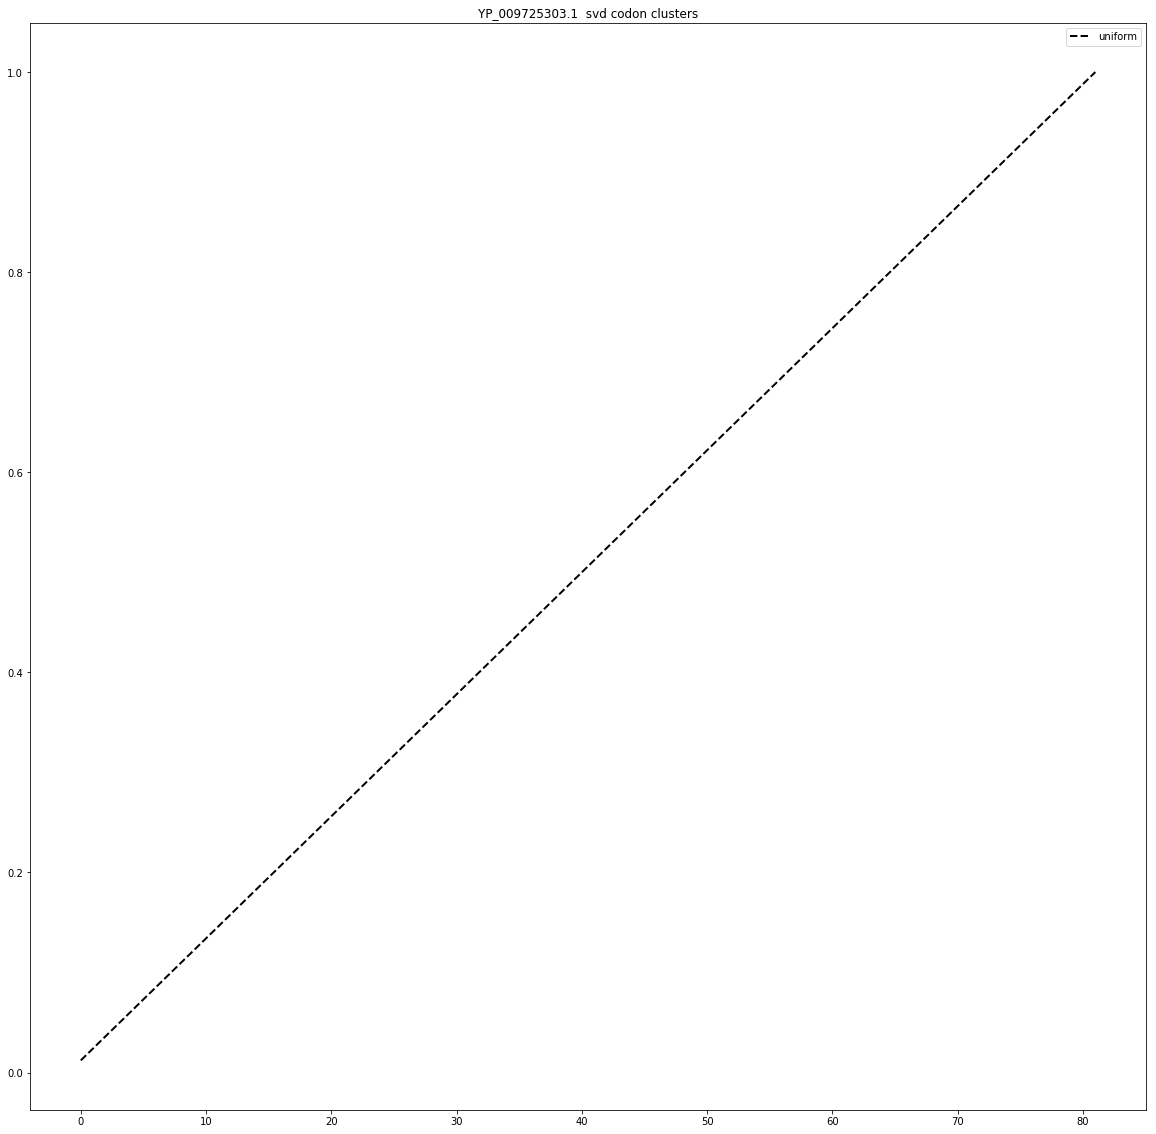

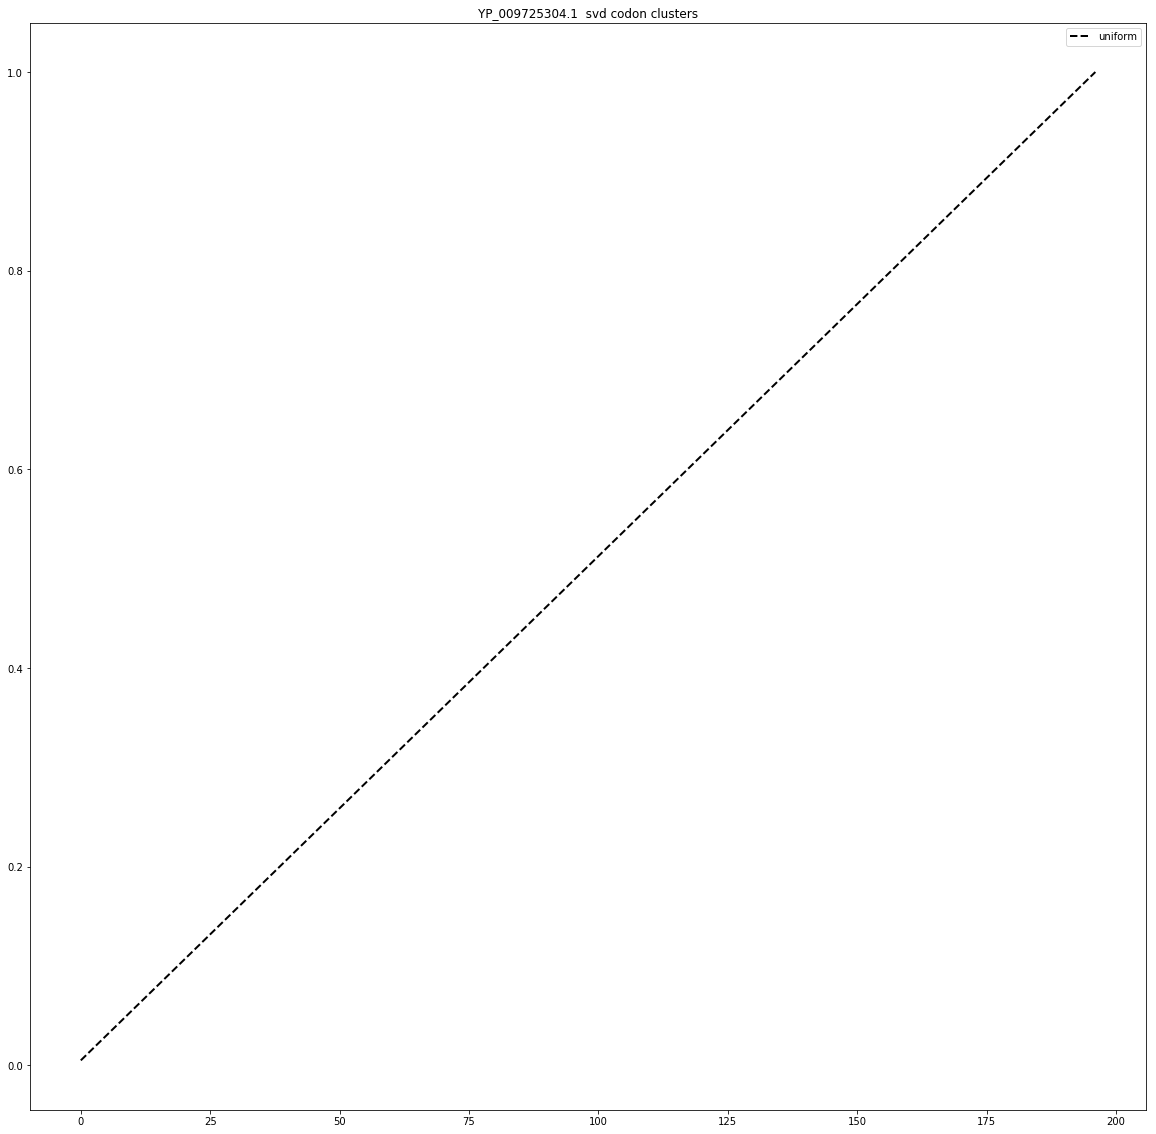

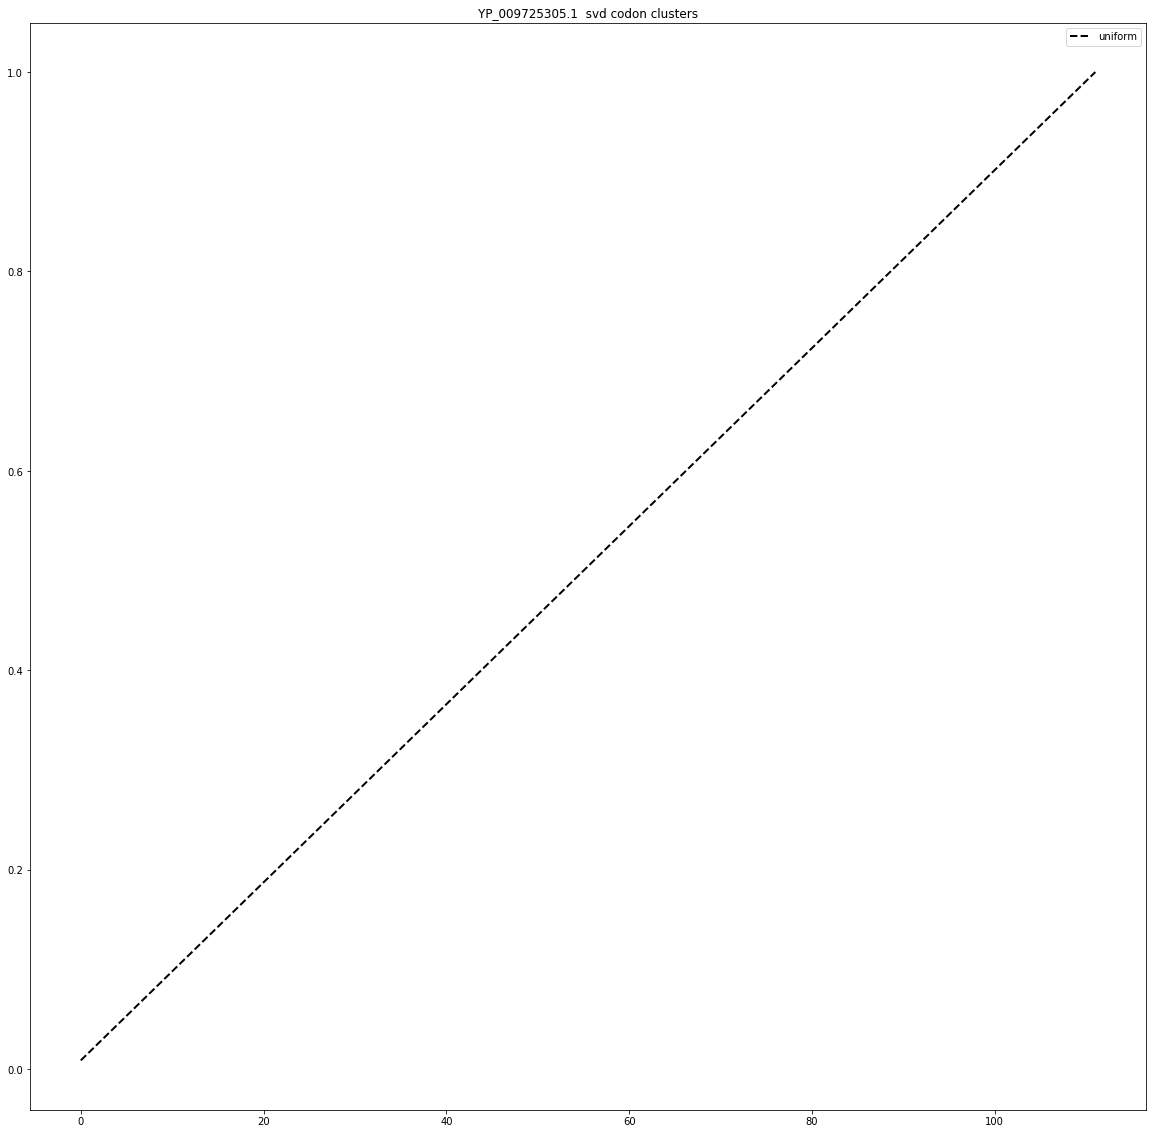

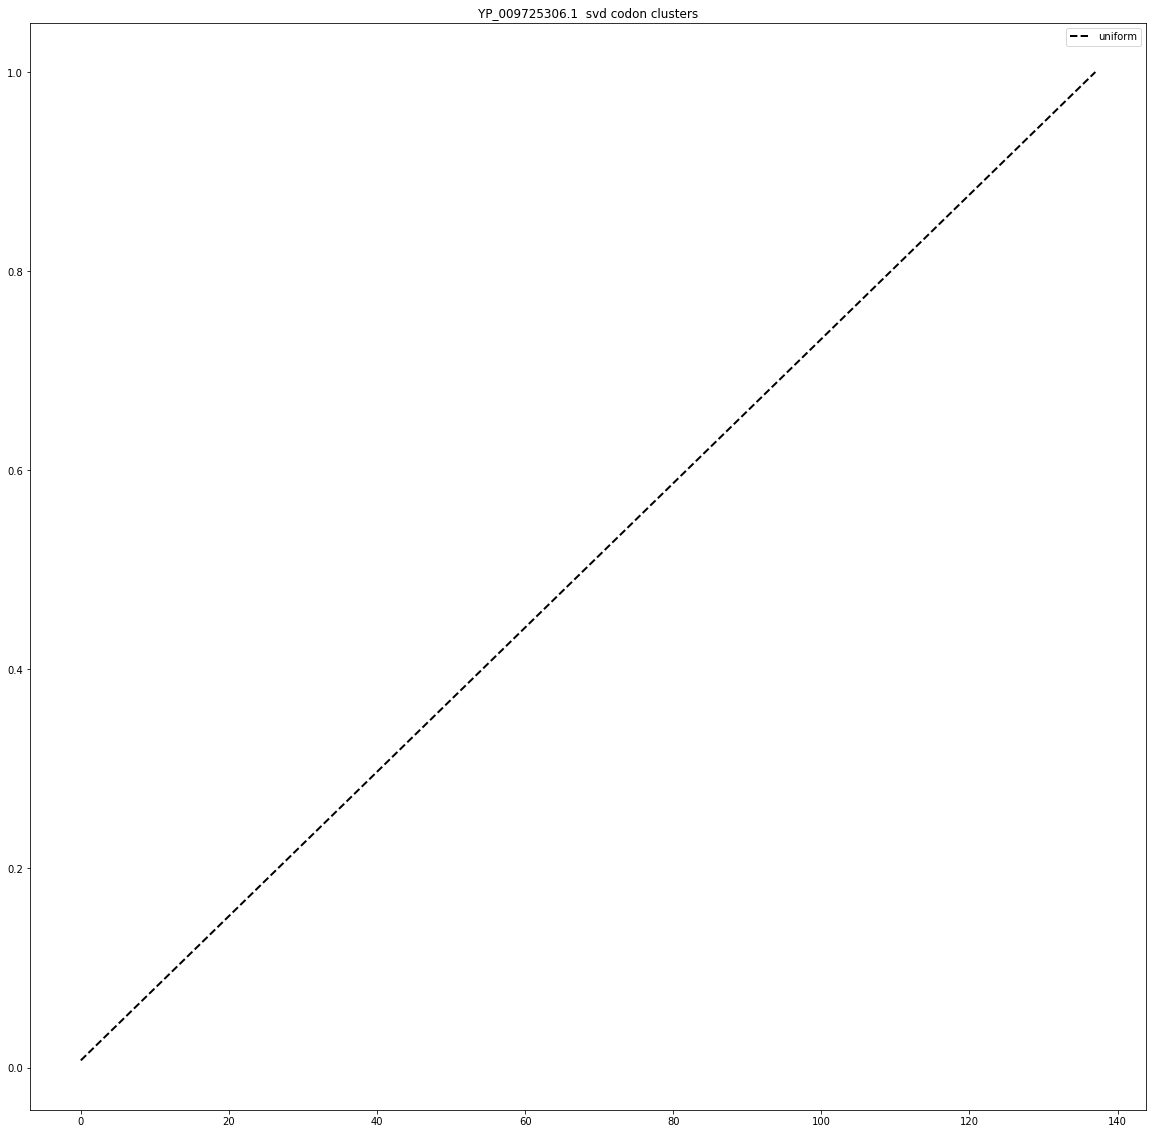

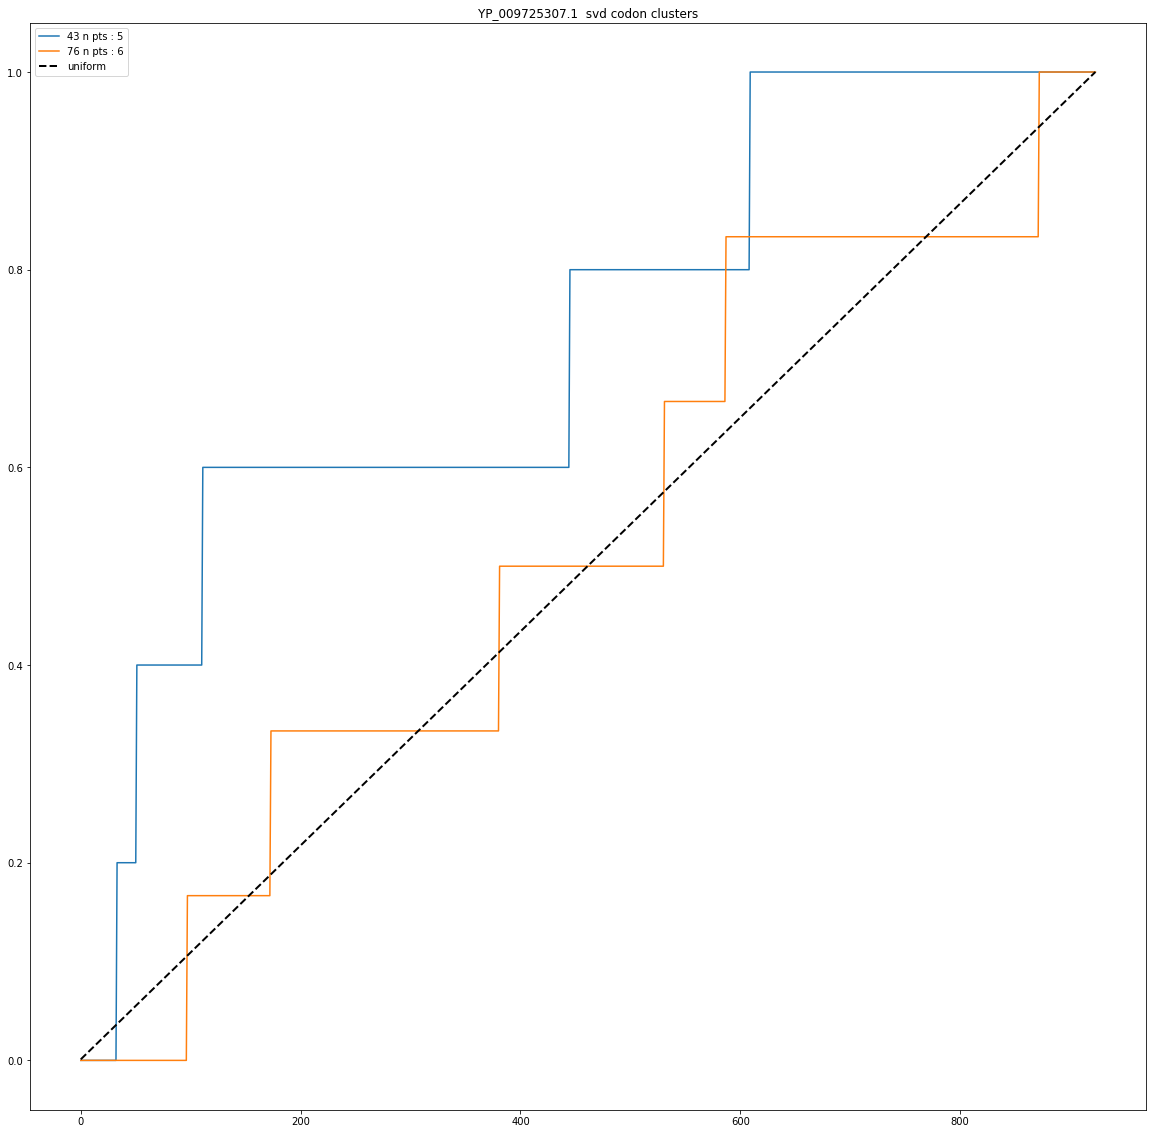

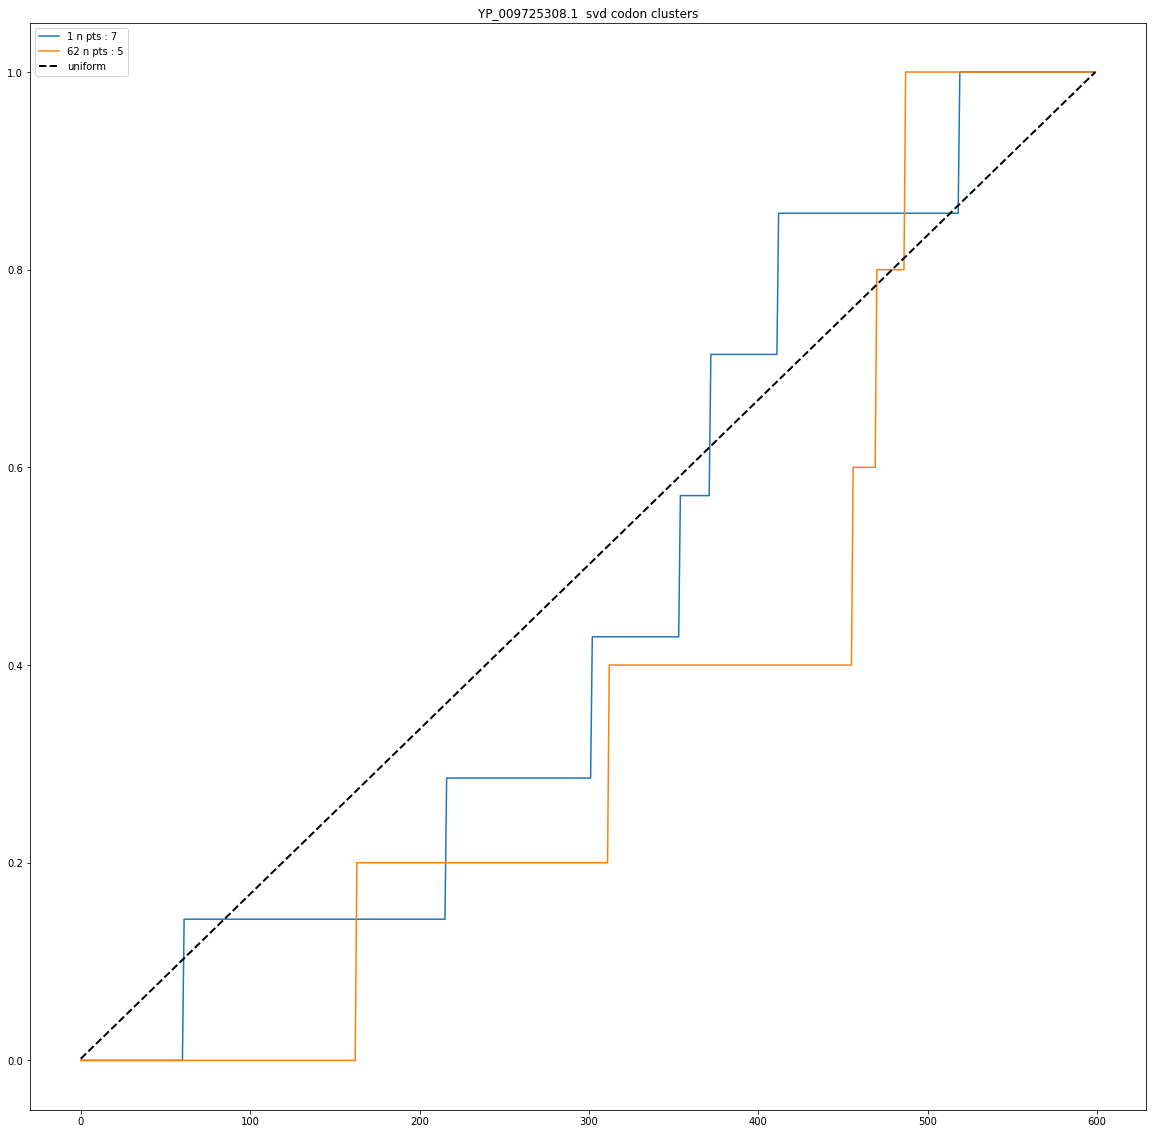

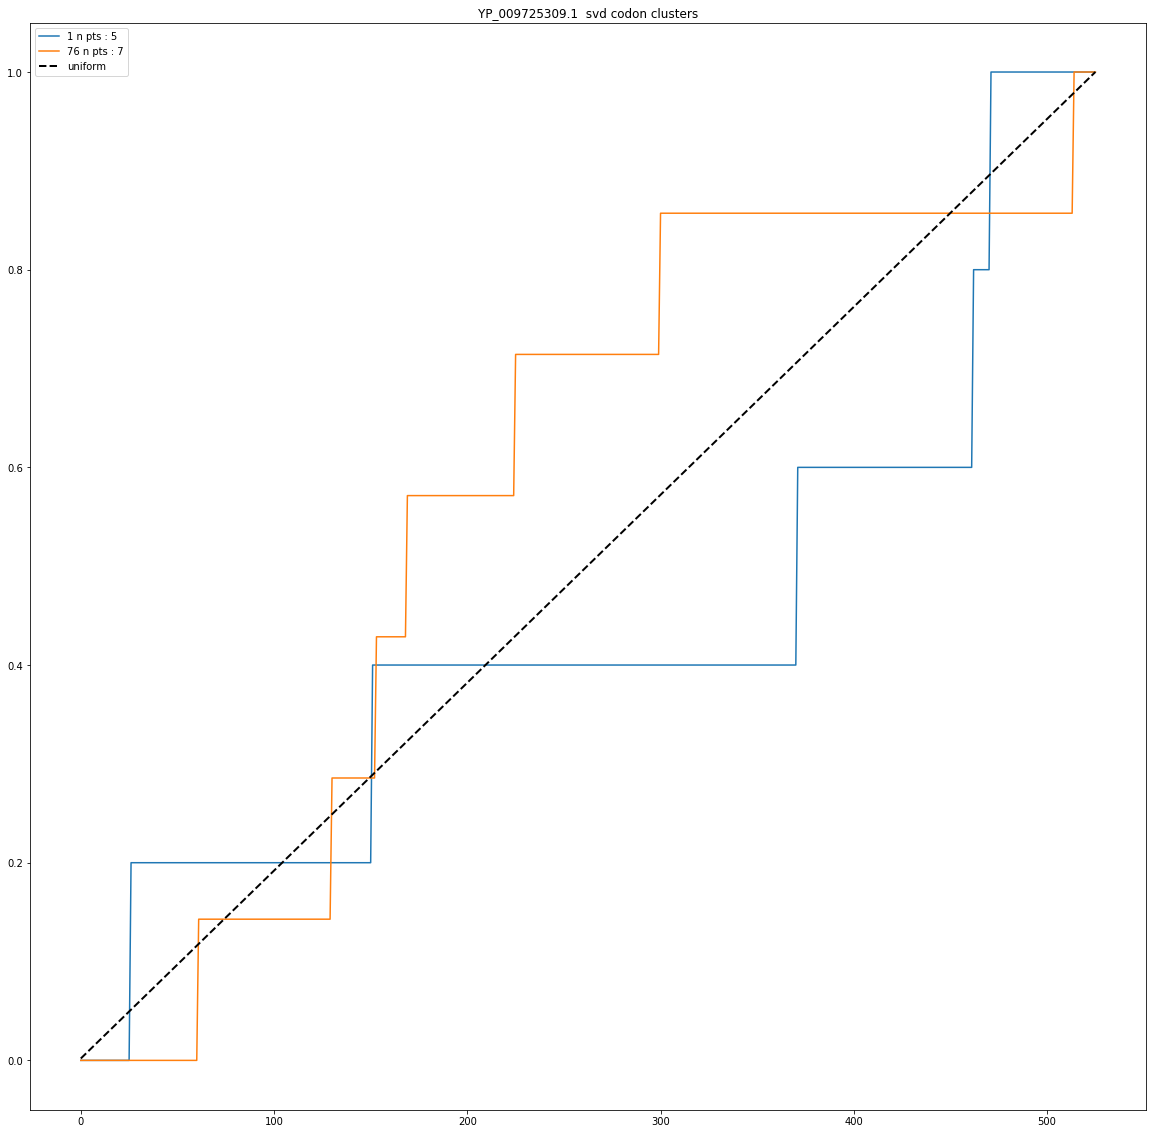

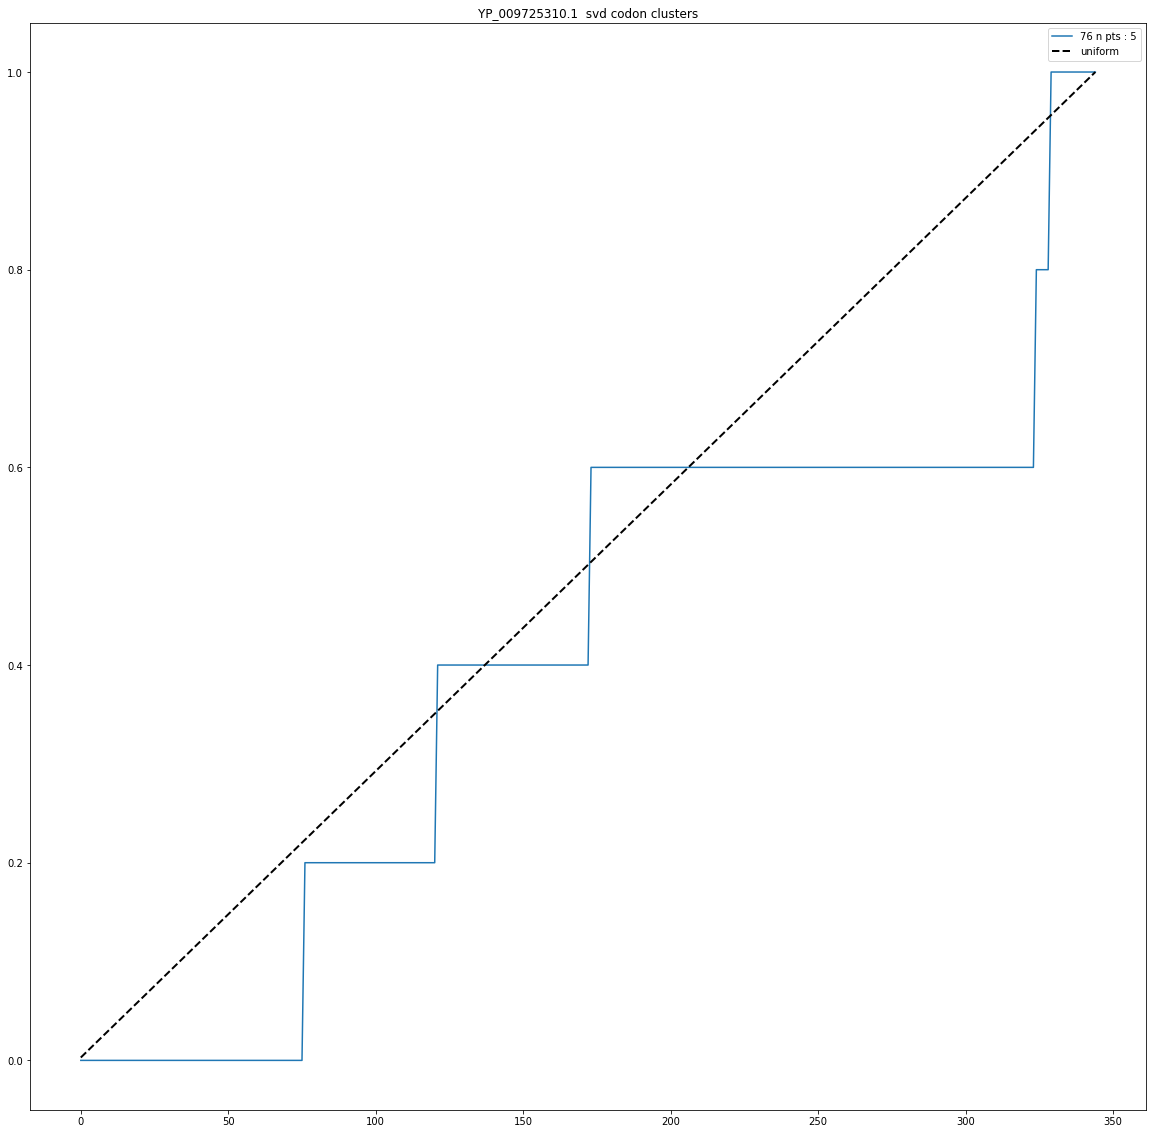

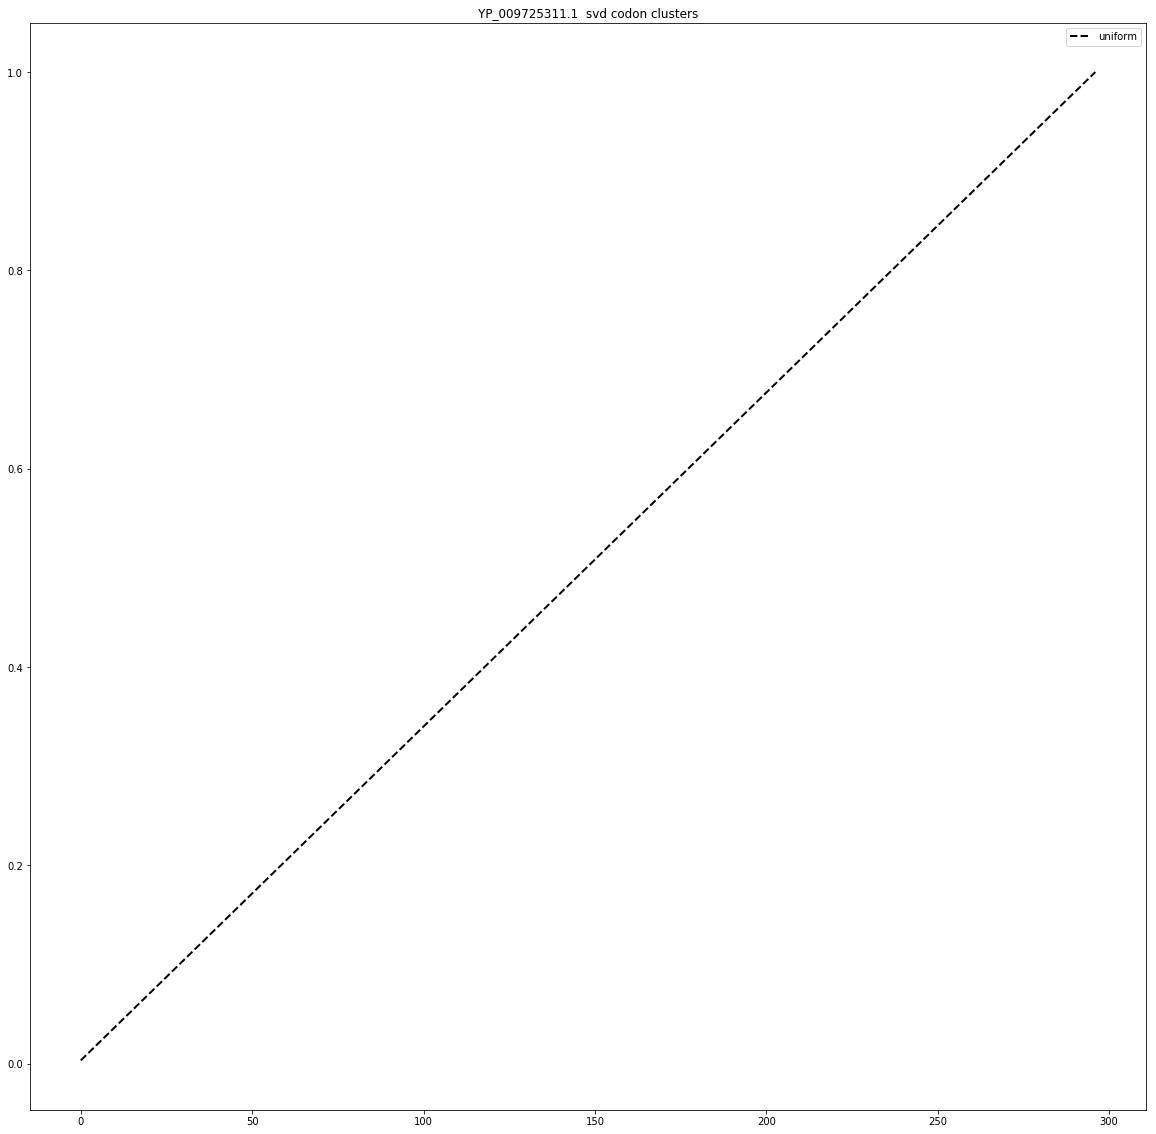

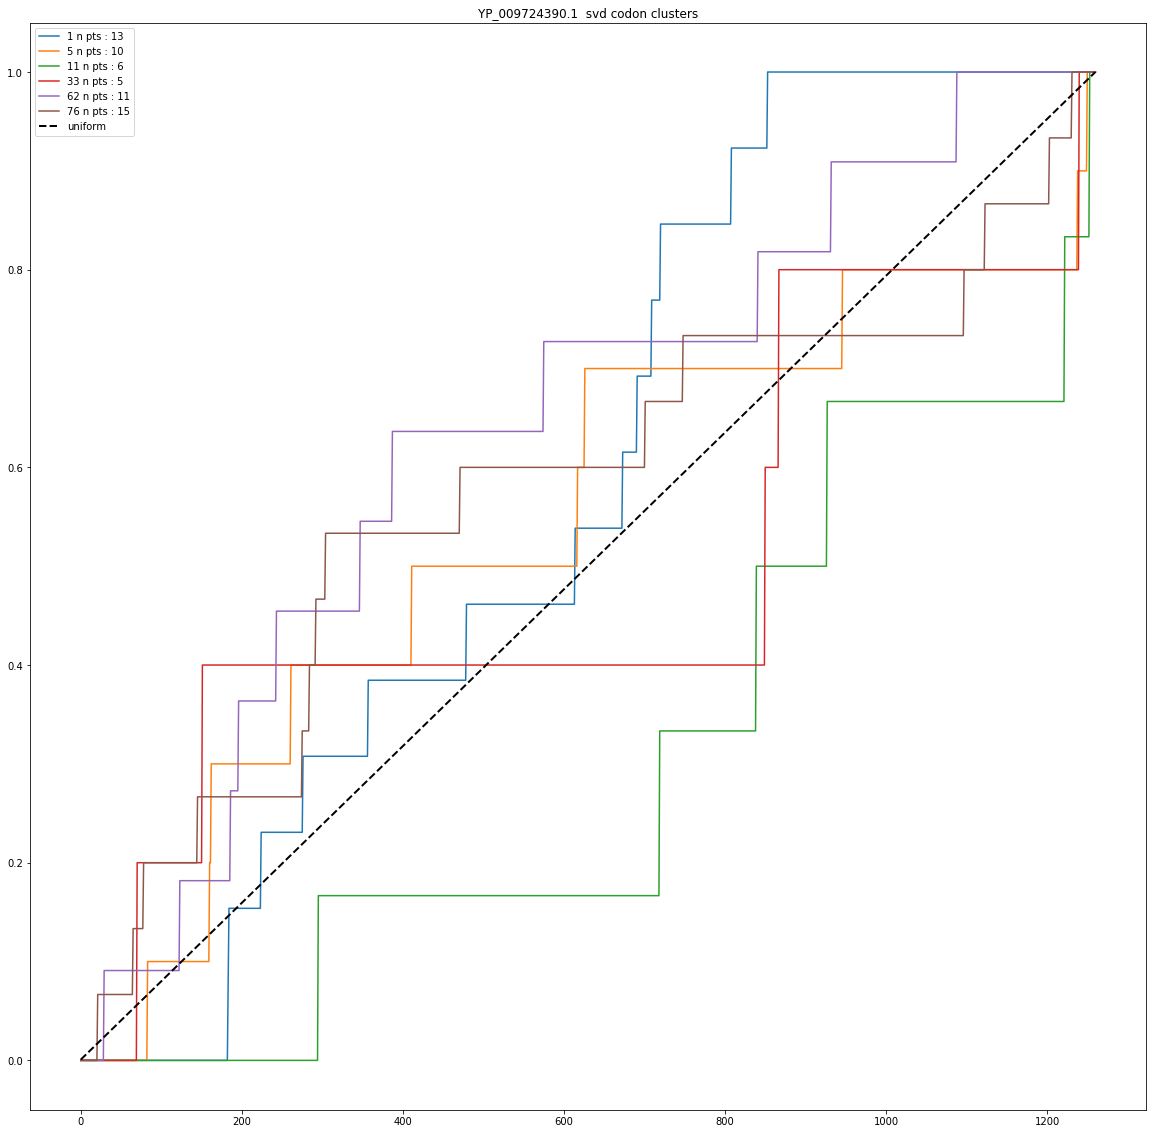

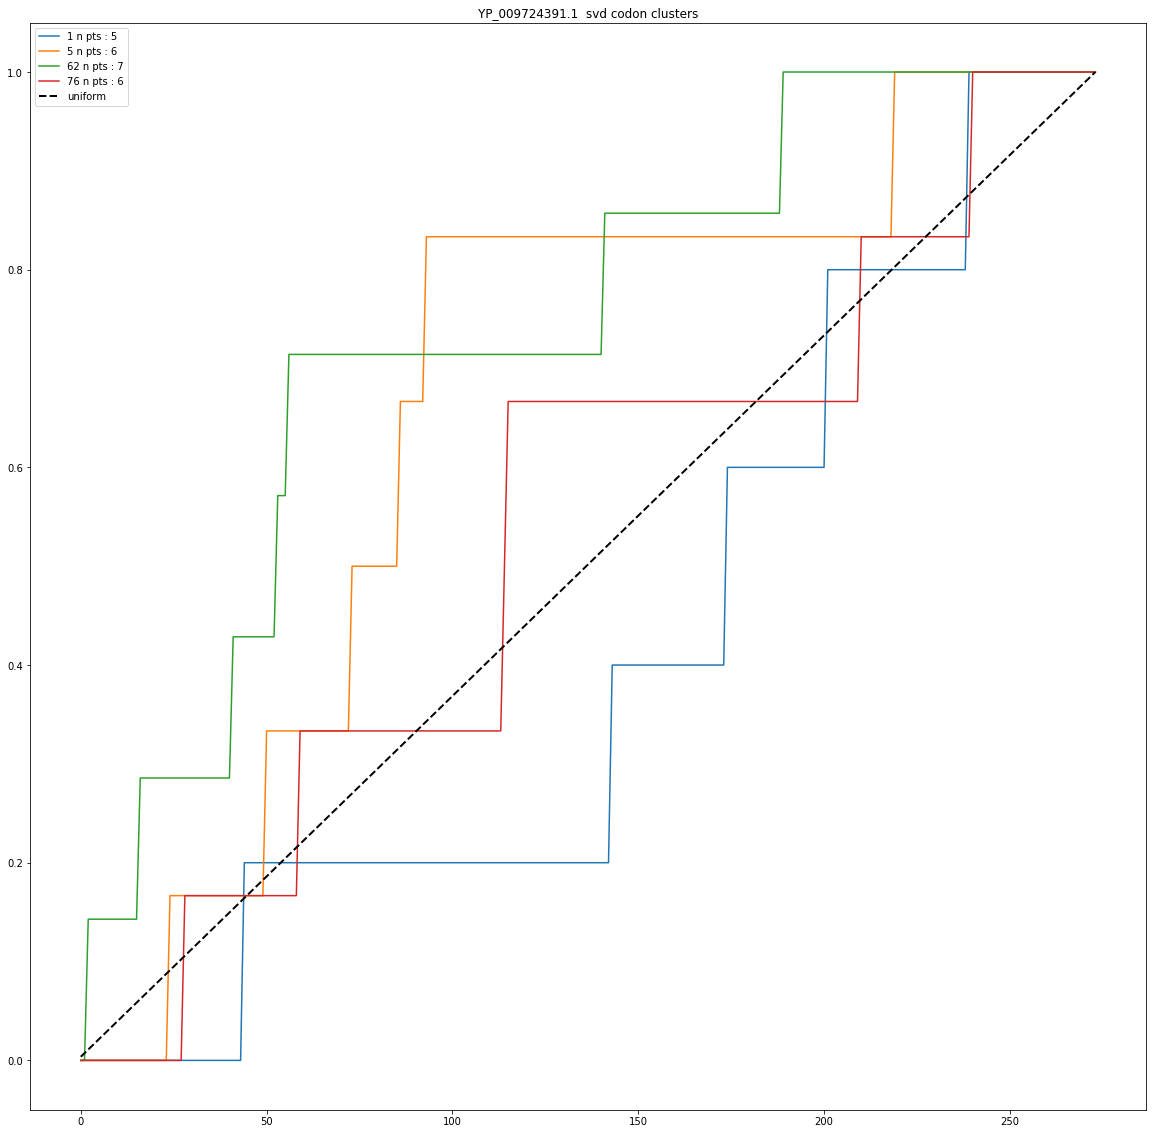

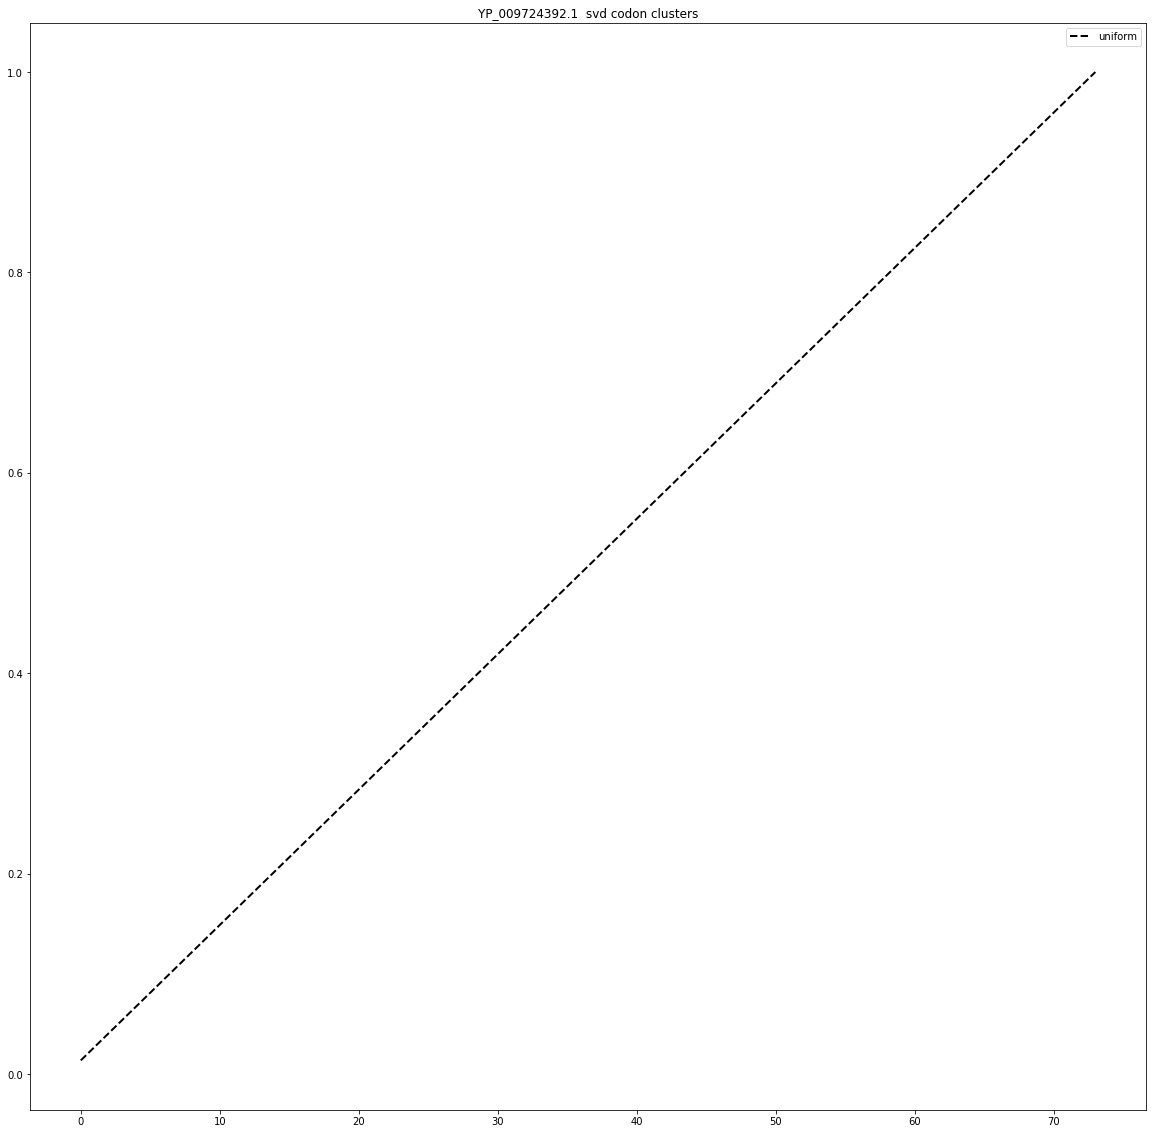

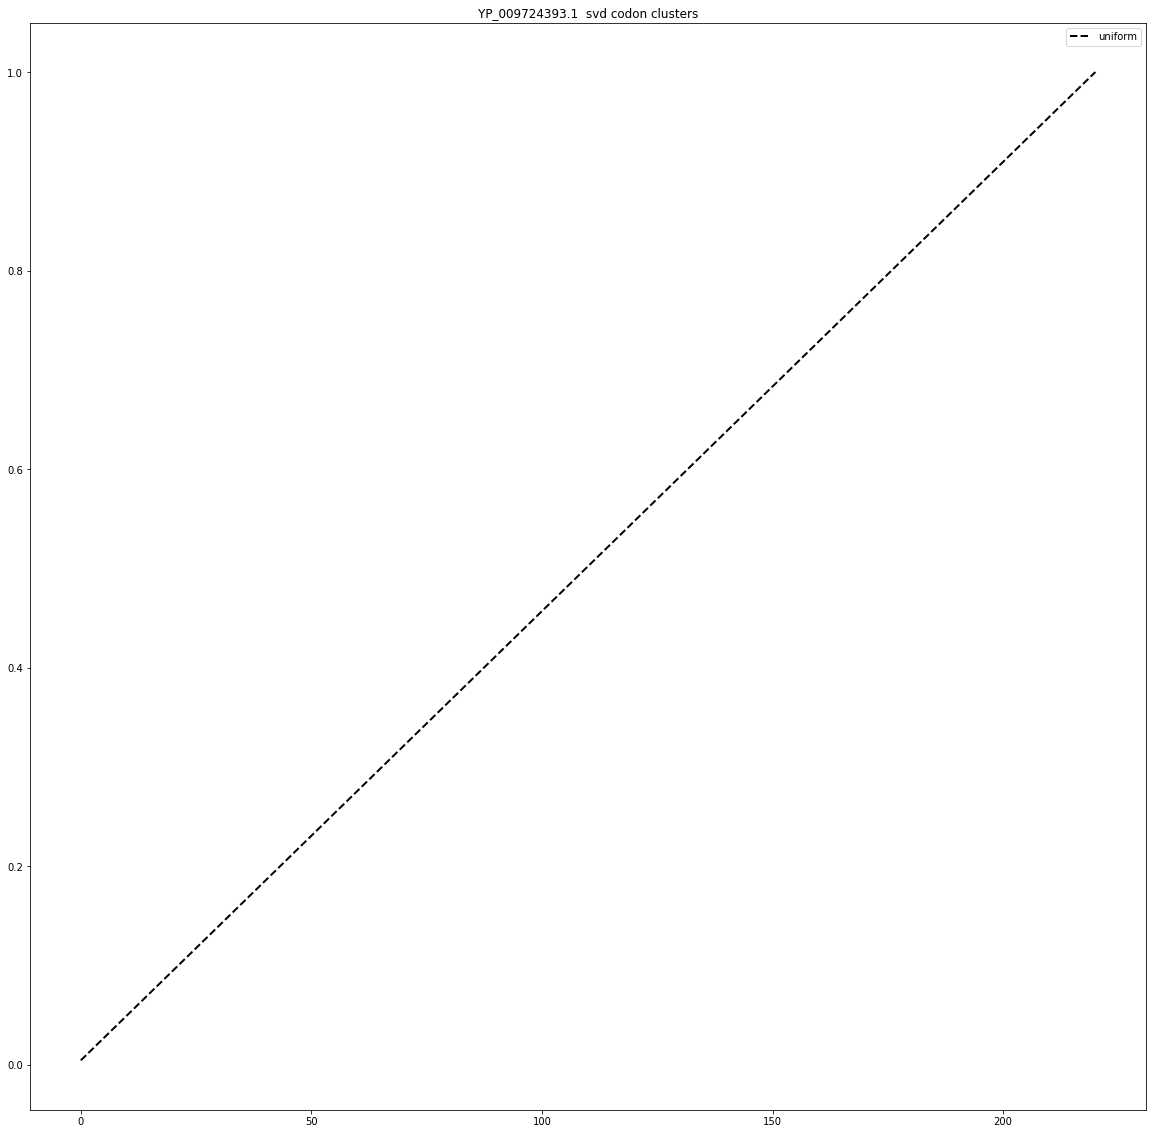

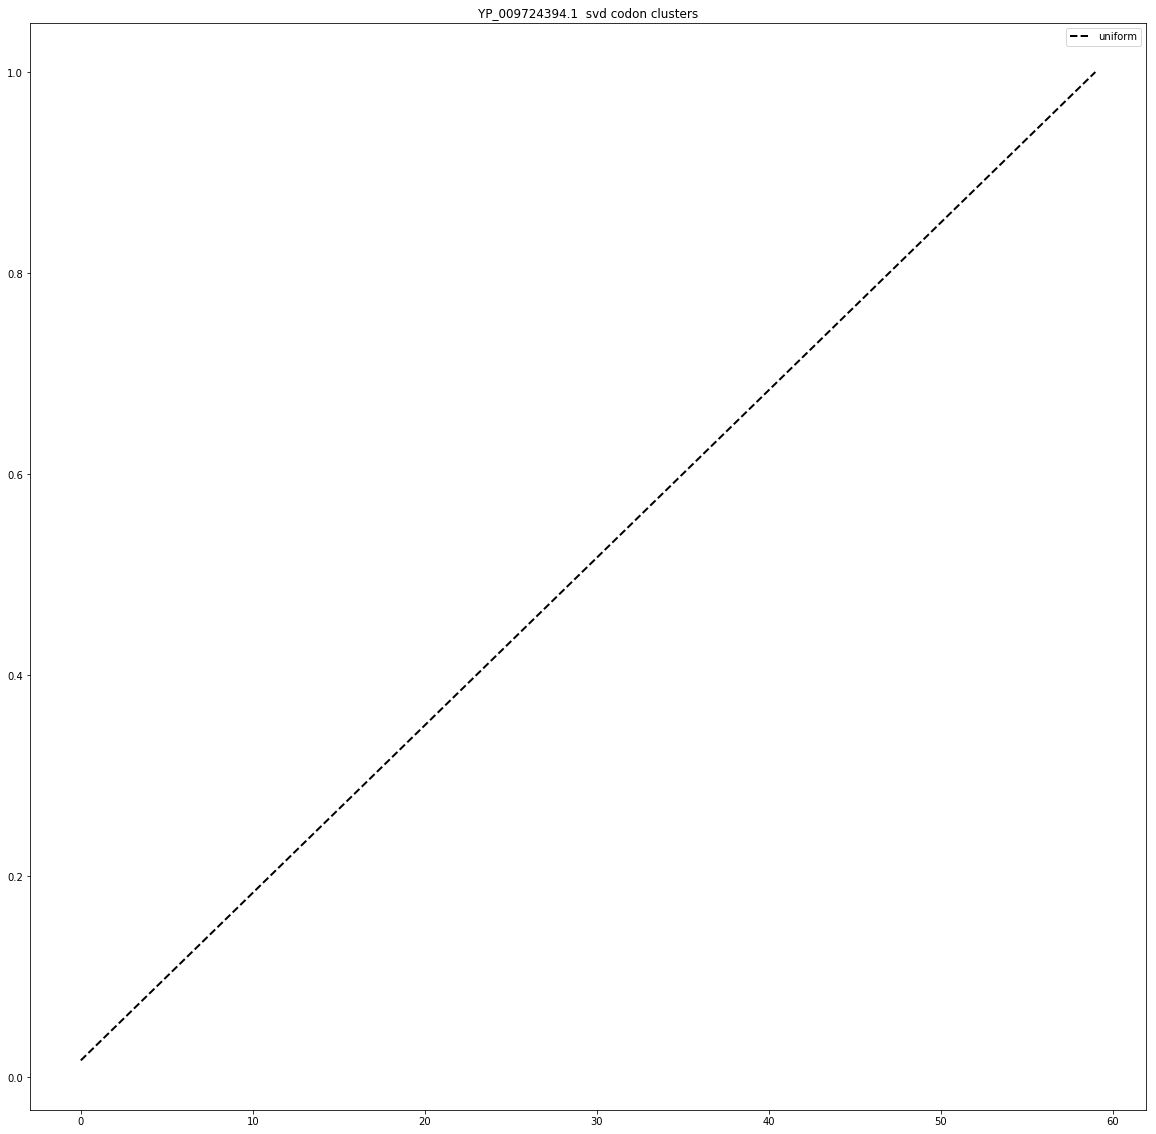

1
(array([ True,  True,  True,  True,  True,  True,  True]), array([3.09966928e-016, 2.71289903e-245, 3.27439581e-032, 1.39397072e-024,
       3.57847973e-043, 3.80653682e-117, 6.44230258e-025]), 0.007300831979014655, 0.0071428571428571435)
5
(array([ True,  True,  True,  True]), array([2.83437749e-043, 1.86875951e-111, 1.08403681e-045, 1.25834070e-061]), 0.012741455098566168, 0.0125)
62
(array([ True,  True,  True,  True,  True]), array([2.27898509e-039, 1.54591944e-172, 1.92213256e-069, 9.67749959e-122,
       6.82393741e-066]), 0.010206218313011495, 0.01)
76
(array([ True,  True,  True,  True,  True,  True,  True]), array([4.38040258e-52, 3.15211717e-63, 2.16178441e-31, 6.00340940e-38,
       4.61776470e-35, 4.60129911e-95, 2.32916236e-14]), 0.007300831979014655, 0.0071428571428571435)
4
(array([ True]), array([9.00672773e-214]), 0.050000000000000044, 0.05)
7
(array([ True]), array([1.27406349e-174]), 0.050000000000000044, 0.05)
11
(array([ True,  True]), array([4.03023066e-156, 1.2

In [195]:
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
#over the whole genome
titles = ' codon clusters, svd codon clusters'.split(',')


for k,dataset in enumerate(titles):
    bonferroni1 = []
    bonferroni2= {}
    for j,row in annotation[annotation[dataset].notna()].iterrows():
        plt.figure( figsize=(20,20))
        
        for cluster in row[dataset]:
            
            
            cluster_ones = np.zeros(len(row.prots))        
            cluster_ones[ row[dataset][cluster] ] = 1  
            if np.sum(cluster_ones) > 4 and np.sum(cluster_ones) < 1000 :    
                cdf_empirical= np.cumsum(cluster_ones) / np.sum(cluster_ones)
                res = stats.kstest(cdf_empirical, 'uniform')
                plt.plot( cdf_empirical  , label = str(cluster) + ' n pts : '+ str(int(np.sum(cluster_ones)) ) )
                bonferroni1.append(res[1])
                if cluster not in bonferroni2:
                    bonferroni2[cluster]=[]
                bonferroni2[cluster].append(res[1])
        cdf_uniform = np.cumsum(np.ones(len(row.prots)) ) / np.sum(len(row.prots))
        plt.plot(cdf_uniform, lw = 2 , ls = 'dashed' , c = 'black' , label= 'uniform')
        plt.legend()
        plt.title( row.sseqid + ' ' + titles[k] )
        plt.show()
        
    for c in bonferroni2:
        print(c)
        bf_correction = multipletests(bonferroni2[c], alpha=0.05 , method='bonferroni', is_sorted=False, returnsorted=False)
        print(bf_correction)
    
    bf_correction = multipletests(bonferroni, alpha=0.05 , method='bonferroni', is_sorted=False, returnsorted=False)
    print(bf_correction)
    